In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ürünler=pd.read_csv("harcamaürünleri1.csv",index_col=0)
tüfe=pd.read_csv("tüfe.csv",index_col=0)
tüfe.index=pd.to_datetime(tüfe.index)
tüfe.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/tüfe.csv")
tüfe.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/tufe.csv")
gruplar=pd.read_csv("gruplar_int.csv",index_col=0)
gruplar.index=pd.to_datetime(gruplar.index)
gruplar.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/gruplar_int.csv")
gruplar.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/gruplar_int.csv")
endeksler=pd.read_csv("endeksler.csv",index_col=0)
endeksler.index=pd.to_datetime(endeksler.index)
endeksler.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/endeksler_int.csv")
endeksler.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/endeksler.csv")
endeksler.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/endeksler.csv")
harcama_grupları=pd.read_csv("harcama_grupları.csv",index_col=0)
harcama_grupları.index=pd.to_datetime(harcama_grupları.index)
harcama_grupları=harcama_grupları.sort_index()
harcama_grupları.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/harcama_grupları.csv")
harcama_grupları.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/harcamagrupları.csv")
özelgöstergeler=pd.read_csv("özelgöstergeler.csv",index_col=0)
özelgöstergeler.index=pd.to_datetime(özelgöstergeler.index)
özelgöstergeler.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/özelgöstergeler.csv")
özelgöstergeler.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/ozelgostergeler.csv")
özelgöstergeler["TÜFE"]=tüfe["TÜFE"]
özel=pd.read_excel("özel.xlsx")
cols=özel.iloc[3,:]
özel=özel.iloc[4:,:]
özel.columns=["Kod", "Grup", "EN", "Ağırlık", '1.Alt Gösterge', '2.Orta Gösterge',
       '3.Üst Gösterge', np.nan, np.nan, np.nan, '4.En Üst Gösterge', np.nan, np.nan,
       '5.TÜFE A', np.nan, np.nan, '6.TÜFE B', np.nan, np.nan, '7.TÜFE C', np.nan, np.nan,
       '8.TÜFE D', np.nan, np.nan, '9.TÜFE E', np.nan, np.nan, '10.TÜFE F']

ağırlıklar=pd.read_csv("ağırlıklartüfe.csv",index_col=0)

def hareketli_aylik_ortalama(df):
    
        değer = df.name  # Kolon ismi
        df = pd.DataFrame(df)
        df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
        df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
        
        # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
        df["Aylık Ortalama"] = (
            df[df["Gün Sırası"] <= 24]
            .groupby(df["Tarih"].dt.to_period("M"))[değer]
            .expanding()
            .mean()
            .reset_index(level=0, drop=True)
        )
        
        # Orijinal indeksi geri yükle
        df.index = pd.to_datetime(df.index)
        return df
data=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe/deneme3.csv",index_col=0)
sepet=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-gfe/marketli.csv",index_col=0)

def aylik_degisim_serisi(ts: pd.Series) -> pd.Series:
        ts = ts.sort_index()
        aylik_degisim = []

        for tarih in ts.index:
            gun = tarih.day
            ay = tarih.month
            yil = tarih.year

            # Bu ay ve geçen ay için veri
            bu_ay = ts[(ts.index.year == yil) & (ts.index.month == ay)]
            if ay == 1:
                onceki_ay = ts[(ts.index.year == yil - 1) & (ts.index.month == 12)]
            else:
                onceki_ay = ts[(ts.index.year == yil) & (ts.index.month == ay - 1)]

            if gun <= 24:
                ort_bu = bu_ay.iloc[:gun].mean()
                ort_onceki = onceki_ay.iloc[:gun].mean()

                if pd.notna(ort_bu) and pd.notna(ort_onceki) and ort_onceki != 0:
                    oran = (ort_bu / ort_onceki) - 1
                    aylik_degisim.append(oran*100)
                else:
                    aylik_degisim.append(None)
            else:
                try:
                    tarih_24 = bu_ay.index[23]
                    oran_24 = aylik_degisim[ts.index.get_loc(tarih_24)]
                    aylik_degisim.append(oran_24)
                except:
                    aylik_degisim.append(None)

        return pd.Series(aylik_degisim[-gun:], index=ts.index[-gun:])

C:\Users\Bora\AppData\Local\Temp\ipykernel_5092\2260606896.py:57: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe/deneme3.csv",index_col=0)


In [2]:
sepet=sepet[(sepet["Şehir"].isin(["Türkiye","İSTANBUL"])) | (sepet["Market"]=="Hal")]

sepet=sepet.rename(columns={"Ürün":"Ürün Adı"})
sepet["Ürün Adı"] = sepet.apply(
    lambda row: f"{row['Ürün Adı']} {row['Market']}" 
    if pd.notna(row["Market"]) and row["Market"].lower() not in str(row["Ürün Adı"]).lower() 
    else row["Ürün Adı"],
    axis=1
)


In [3]:
sepet=sepet.iloc[:,:-2]

In [ ]:
# Sadece tarih sütunlarını seç
date_cols = pd.to_datetime([col for col in data.columns if col not in ['Ürün Adı', 'ID']])

# Tarih sütunlarını içeren kısmı al ve transpoze et
price_data = data.set_index(['Ürün Adı', 'ID'])
price_data.columns = date_cols
price_data = price_data.T  # Transpose: tarihler index'e alınır

# Haftalık ortalamaları al
weekly_avg = price_data.resample("W").mean()

# Tekrar orijinal forma getir
weekly_avg = weekly_avg.T.reset_index()
weekly_avg.index=data.index
weekly_avg

In [ ]:
lok=['Ayran (Servis edilen)', 'Burgerler',
       'Ekmekarası Yiyecekler (Döner)',
       'Hazır Yemekler (Pilav, Kuru Fasulye)', 'Kebaplar',
       'Pastane Ürünleri', 'Pideler', 'Pizzalar',
       'Soğuk İçecekler (Servis edilen)',
       'Sıcak İçecekler (Servis edilen)', 'Çiğ Köfte', 'Çorbalar']

weekly_avg.loc[lok,"Ürün Adı"]=weekly_avg.loc[lok,"Ürün Adı"] + " "+ weekly_avg.loc[lok,"ID"].astype(str)


In [ ]:
# Sadece tarih sütunlarını seç
date_cols = pd.to_datetime([col for col in sepet.columns if col not in ['Ürün Adı']])

# Tarih sütunlarını içeren kısmı al ve transpoze et
price_data = sepet.set_index(['Ürün Adı'])
price_data.columns = date_cols
price_data = price_data.T  # Transpose: tarihler index'e alınır

# Haftalık ortalamaları al
weekly_avg1 = price_data.resample("W").mean()

# Tekrar orijinal forma getir
weekly_avg1 = weekly_avg1.T.reset_index()
weekly_avg1.index=sepet.index
weekly_avg1=weekly_avg1.iloc[:,[0]+list(range(-7,0))]
weekly_avg1

In [ ]:
fiyatlar=pd.concat([weekly_avg.drop("ID",axis=1), weekly_avg1], axis=0)

In [ ]:
new_columns = [fiyatlar.columns[0]]  # İlk sütun ismi sabit kalacak

for col in fiyatlar.columns[1:]:
    try:
        tarih = pd.to_datetime(col)
        new_columns.append(tarih.strftime("%Y-%m-%d"))
    except:
        new_columns.append(col)  # Tarihe çevrilemiyorsa aynen bırak

# Yeni sütun isimlerini ata
fiyatlar.columns = new_columns

In [ ]:
fiyatlar.loc[fiyatlar["Ürün Adı"]=="EmlakJet Kira","Ürün Adı"]="EmlakJet Kira (m²)"

In [ ]:
from openpyxl import load_workbook
for ana in ürünler["Ana Grup"].unique():
    excel_dosya = f"{ana}.xlsx"
    fiyatlar.loc[ürünler[ürünler["Ana Grup"]==ana]["Ürün"].values].to_excel(excel_dosya)

    # openpyxl ile yükle ve sütun genişliklerini ayarla
    wb = load_workbook(excel_dosya)
    ws = wb.active

    for col in ws.columns:
        max_length = 0
        column = col[0].column_letter  # Sütun harfi (A, B, C...)
        for cell in col:
            try:
                if cell.value:
                    max_length = max(max_length, len(str(cell.value)))
            except:
                pass
        # +2 biraz boşluk bırakmak için
        ws.column_dimensions[column].width = max_length + 2

    # Dosyayı yeniden kaydet
    wb.save(excel_dosya)




In [ ]:
from datetime import datetime
now = datetime.now()
zaman = f"{now.year}-{now.month:02d}-{now.day:02d} {now.hour:02d}:{now.minute:02d}"

In [ ]:
with open("C:/Users/Bora/Documents/GitHub/web-tufe-flask/time.txt", "w", encoding="utf-8") as dosya:
    dosya.write(zaman)

In [ ]:
satrim=pd.DataFrame(index=endeksler.index[90:],columns=["CPI"])
for i in range(len(endeksler)-90):
    satrim_ürünler=endeksler.pct_change(90).dropna().iloc[i].sort_values().iloc[26:-26]
    satrim_ağırlık=ürünler[ürünler["Ürün"].isin(satrim_ürünler.index)].groupby("Ürün")["Ağırlık"].sum()/ürünler[ürünler["Ürün"].isin(satrim_ürünler.index)].groupby("Ürün")["Ağırlık"].sum().sum()
    satrim["CPI"].iloc[i]=((endeksler[satrim_ağırlık.index].pct_change(90).dropna().iloc[i]*satrim_ağırlık*100).sum())




In [ ]:
eğilim=pd.DataFrame()
eğilim["Web TÜFE"]=(((tüfe.pct_change(30).dropna()+1)**(365/30))-1)*100
eğilim["B"]=(((özelgöstergeler["TÜFE B"].pct_change(30).dropna()+1)**(365/30))-1)*100
eğilim["C"]=(((özelgöstergeler["TÜFE C"].pct_change(30).dropna()+1)**(365/30))-1)*100
eğilim["Medyan"]=(((harcama_grupları.pct_change(30).mean(axis=1)+1)**(365/30))-1)*100
eğilim["SATRIM"]=((((satrim["CPI"]/100)+1)**(365/30))-1)*100
eğilim=((((eğilim/100)+1)**(1/12))-1)*100
eğilim["Ortalama"]=eğilim.mean(axis=1).rolling(30).mean()
eğilim["Min"]=eğilim.iloc[:,:-1].rolling(30).mean().min(axis=1)
eğilim["Max"]=eğilim.iloc[:,:-2].rolling(30).mean().max(axis=1)
eğilim

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÜFE Aylık Ana Eğilimi, 30 Günlük Hareketli Ortalama (%)")
plt.plot(eğilim["Ortalama"])
plt.fill_between(eğilim.dropna().index,eğilim["Min"].dropna(),eğilim["Max"].dropna(),alpha=0.5,color="orange",label="Max-Min Aralığı")
plt.xticks(eğilim.dropna().index[::10],rotation=45)
plt.legend()

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÜFE 90 Günlük Değişim,Yıllıklandırılmış (%)")
plt.plot((((tüfe.pct_change(90).dropna()+1)**(365/90))-1)*100,label="Web TÜFE")
plt.plot((((özelgöstergeler["TÜFE B"].pct_change(90).dropna()+1)**(365/90))-1)*100,label="B")
plt.plot((((özelgöstergeler["TÜFE C"].pct_change(90).dropna()+1)**(365/90))-1)*100,label="C")
plt.plot((((harcama_grupları.pct_change().mean(axis=1).rolling(90).mean()+1)**365)-1)*100,label="Medyan")
plt.plot((((1+satrim["CPI"]/100)**4)-1)*100,label="SATRIM")
plt.legend()

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÜFE 90 Günlük Ana Eğilimi,Yıllıklandırılmış (%)")
plt.plot((özelgöstergeler["Temel mallar"].pct_change(90).dropna()+1)**4, label="Temel Mallar")
plt.plot((özelgöstergeler["Enerji"].pct_change(90).dropna()+1)**4, label="Enerji")
plt.plot((özelgöstergeler["Hizmet"].pct_change(90).dropna()+1)**4, label="Hizmet")
plt.plot((özelgöstergeler["Gıda ve alkolsüz içecekler"].pct_change(90).dropna()+1)**4, label="Gıda ve Alkolsüz İçecekler")
plt.legend()
plt.xticks(rotation=45)

In [ ]:
yayılım=pd.DataFrame()
for col in data.columns[-41:]:
    onceki_col=data.columns[data.columns.get_loc(col)-1]
    t=data[data[col].notna()][[onceki_col, col]]
    t["Fark"]=t.diff(axis=1).iloc[:,-1]
    yayılım[col]= (t[t["Fark"]>0].groupby(level=0).size()/ t.groupby(level=0).size() * 100).fillna(0).sort_values()
   

In [ ]:
w=ağırlıklar.loc[yayılım.index]["Ağırlık"]/ ağırlıklar.loc[yayılım.index]["Ağırlık"].sum()

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web TÜFE YayılımEndeksi")
plt.plot((yayılım.T*w).sum(axis=1)) 
plt.xticks(yayılım.columns[::5],rotation=45)

In [ ]:
dana=sepet[(sepet["Şehir"]=="Türkiye") | (sepet["Şehir"]=="İSTANBUL")].loc["Kuru Kayısı"]
dana=dana[(dana.iloc[:,-25:-2].notna().sum(axis=1)>1)]

dana["Değişim"]=((dana.iloc[:,-25:-2].pct_change(axis=1).iloc[:,-1]+1)-1)*100
dana=dana.iloc[:,list(range(-25,0))+[0]].drop("Şehir",axis=1).sort_values(by="Değişim").round(2)
dana.to_csv("test.csv")

In [2]:
def _update(data,tablo):

    import pandas as pd
    from googleapiclient.discovery import build
    from googleapiclient.errors import HttpError
    from google.oauth2.service_account import Credentials

    # --- Google Sheets API kimlik doğrulaması ---
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
    SERVICE_ACCOUNT_FILE = 'service_account.json'  # <- Buraya servis hesabı JSON dosya adını yaz

    credentials = Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    service = build('sheets', 'v4', credentials=credentials)

    # --- DataFrame hazırlama (tüfe'nin tanımlı olduğunu varsayıyoruz) ---
    df = pd.DataFrame()
    df["Tarih"] = data.index
    df = pd.concat([df, data.reset_index(drop=True)], axis=1)

    # --- Timestamp'leri string formatına çevirerek JSON hatasını önleme ---
    df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)

    # --- Google Sheets'e yazılacak veri gövdesi ---
    values = [df.columns.tolist()] + df.values.tolist()  # Başlık + veri
    body = {'values': values}

    # --- Hedef Google Sheets bilgileri ---
    spreadsheet_id = '14iiu_MQwtMxHTFt6ceyFhkk6v0OL-wuoQS1IGPzSpNE'   # <- Kendi Sheet ID
    range_ = f'{tablo}!A1'  # Yazılacak hücre aralığı

    # --- Veri güncelleme işlemi ---
    try:
        spreadsheet = service.spreadsheets().get(spreadsheetId=spreadsheet_id).execute()
        sheet_id = None

        # Sayfa adını arayıp ID'sini alıyoruz
        for sheet in spreadsheet['sheets']:
            if sheet['properties']['title'] == tablo:
                sheet_id = sheet['properties']['sheetId']
                break

        # Eğer sayfa bulunduysa, içeriğini temizleyelim
        if sheet_id:
            range_ = f"{tablo}!A1:AAB1000"  # Sayfanın tüm verilerini temizlemek için aralık belirliyoruz (A1:Z1000 örneği)
            
            # Veriyi temizlemek için clear fonksiyonu
            service.spreadsheets().values().clear(spreadsheetId=spreadsheet_id, range=range_).execute()
            print(f"{tablo} sayfasının içeriği temizlendi.")
        else:
            print(f"{tablo} sayfası bulunamadı.")




        result = service.spreadsheets().values().update(
            spreadsheetId=spreadsheet_id,
            range=range_,
            valueInputOption='RAW',
            body=body
        ).execute()

        print(f"{result.get('updatedCells')} hücre güncellendi.")

    except HttpError as err:
        print(f"Hata oluştu: {err}")


In [3]:
import warnings
warnings.filterwarnings("ignore")
_update(tüfe,"Web TÜFE")
_update(gruplar.drop("TÜFE",axis=1),"Ana Gruplar")
_update(özelgöstergeler.drop("TÜFE",axis=1),"Özel Kapsamlı Göstergeler")
_update(harcama_grupları,"Temel Başlıklar")
_update(endeksler,"Maddeler")

Web TÜFE sayfasının içeriği temizlendi.
352 hücre güncellendi.
Ana Gruplar sayfasının içeriği temizlendi.
2288 hücre güncellendi.
Özel Kapsamlı Göstergeler sayfasının içeriği temizlendi.
4900 hücre güncellendi.
Temel Başlıklar sayfasının içeriği temizlendi.
20944 hücre güncellendi.
Maddeler sayfasının içeriği temizlendi.
59488 hücre güncellendi.


In [4]:
def update(data,tablo):
    idx=""
    if tablo=="Maddeler":
        idx="Madde"   
    else:
        idx="Grup"
    

    import pandas as pd
    from googleapiclient.discovery import build
    from googleapiclient.errors import HttpError
    from google.oauth2.service_account import Credentials

    # --- Google Sheets API kimlik doğrulaması ---
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
    SERVICE_ACCOUNT_FILE = 'service_account.json'  # <- Buraya servis hesabı JSON dosya adını yaz

    credentials = Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)
    service = build('sheets', 'v4', credentials=credentials)

    # --- DataFrame hazırlama ---
    df = pd.DataFrame(columns=data.columns)
    for col in df.columns:
        # Hareketli aylık ortalama hesaplanıyor
        df[col] = (hareketli_aylik_ortalama(data[col]))["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
        # Son değer aylık değişimle güncelleniyor
        df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

    # 2025-02'dan sonrasını alıp, transpoze ediyoruz.
    df = df.loc["2025-02":].T

    # --- Tarihleri ve indexleri string'e dönüştürme ---
    df.index = df.index.astype(str)  # Indexleri string'e dönüştür
    df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dönüştür
    df.columns=df.columns.astype(str)
    df=df.reset_index(drop=False).rename(columns={"index":idx})
    # --- Google Sheets'e yazılacak veri gövdesi ---
    values = [df.columns.tolist()] + df.values.tolist()  # Başlık + veri
    body = {'values': values}

    # --- Hedef Google Sheets bilgileri ---
    spreadsheet_id = '14iiu_MQwtMxHTFt6ceyFhkk6v0OL-wuoQS1IGPzSpNE'  # <- Kendi Sheet ID
    range_ = f'{tablo} Aylık Değişimler!A1'  # Yazılacak hücre aralığı

    # --- Veri güncelleme işlemi ---
    try:
        result = service.spreadsheets().values().update(
            spreadsheetId=spreadsheet_id,
            range=range_,
            valueInputOption='RAW',
            body=body
        ).execute()

        print(f"{result.get('updatedCells')} hücre güncellendi.")

    except HttpError as err:
        print(f"Hata oluştu: {err}")


In [5]:
data=özelgöstergeler.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylık ortalama hesaplanıyor
    df[col] = (hareketli_aylik_ortalama(data[col]))["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son değer aylık değişimle güncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasını alıp, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dönüştürme ---
df.index = df.index.astype(str)  # Indexleri string'e dönüştür
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dönüştür
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Grup"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/özelgöstergeleraylık.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/ozelgostergeleraylik.csv")

In [6]:
data=harcama_grupları.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylık ortalama hesaplanıyor
    df[col] = (hareketli_aylik_ortalama(data[col]))["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son değer aylık değişimle güncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasını alıp, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dönüştürme ---
df.index = df.index.astype(str)  # Indexleri string'e dönüştür
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dönüştür
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Grup"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/harcama_gruplarıaylık.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/harcamagruplarıaylik.csv")

In [7]:
data=endeksler.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylık ortalama hesaplanıyor
    df[col] = (hareketli_aylik_ortalama(data[col]))["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son değer aylık değişimle güncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasını alıp, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dönüştürme ---
df.index = df.index.astype(str)  # Indexleri string'e dönüştür
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dönüştür
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Madde"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/maddeleraylık.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/maddeleraylık.csv")

In [8]:
data=gruplar.copy()
df = pd.DataFrame(columns=data.columns)
for col in df.columns:
    # Hareketli aylık ortalama hesaplanıyor
    df[col] = (hareketli_aylik_ortalama(data[col]))["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna() * 100
    # Son değer aylık değişimle güncelleniyor
    df[col].iloc[-1] = aylik_degisim_serisi(data[col]).iloc[-1]

# 2025-02'dan sonrasını alıp, transpoze ediyoruz.
df = df.loc["2025-02":].T

# --- Tarihleri ve indexleri string'e dönüştürme ---
df.index = df.index.astype(str)  # Indexleri string'e dönüştür
df = df.applymap(lambda x: x.strftime('%Y-%m-%d') if isinstance(x, pd.Timestamp) else x)  # Tarihleri string'e dönüştür
df.columns=df.columns.astype(str)
df=df.reset_index(drop=False).rename(columns={"index":"Grup"})
df.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/gruplaraylık.csv")
df.to_csv("C:/Users/Bora/Documents/GitHub/webtufedata/data/gruplaraylik.csv")

In [9]:
update(özelgöstergeler,"Özel Kapsamlı Göstergeler")
update(harcama_grupları,"Temel Başlıklar")
update(endeksler,"Maddeler")
update(gruplar,"Ana Gruplar")

174 hücre güncellendi.
714 hücre güncellendi.
2028 hücre güncellendi.
84 hücre güncellendi.


In [ ]:
endeksler.pct_change().iloc[-1].sort_values().tail(30)*100

In [ ]:
t=data[data.iloc[:, -20:].notna().sum(axis=1) >1].loc["Şehirlerarası Otobüs Ücreti "]
#t["C"]=t.iloc[:,-15:].pct_change(axis=1).iloc[:,[-1]]
t["C"]=((np.prod(t.iloc[:,-20:].pct_change(axis=1)+1,axis=1)))

t.sort_values(by="C").drop("2025-05-08",axis=1).iloc[-1,0]

In [ ]:
import re

# Şehir ve terminal adı listesi
sehir_ve_terminal = [
    "Esenler", "Alibeyköy", "Harem", "Adana", "İzmir", "Hatay", "Gaziantep",
    "Bursa", "Antalya", "Muğla", "Samsun", "Ankara", "Aşti", "Mersin", "Tokat",
    "Sivas", "Kars", "Van", "Midyat", "Kahramanmaraş", "Bodrum", "Cizre",
    "Mardin", "Ereğli", "Yozgat", "Trabzon", "Malatya", "Şanlıurfa", "Batman",
    "Kayseri", "İstanbul", "Diyarbakır", "Karabük", "Balıkesir", "Aksaray",
    "Otogarı", "Otogarı1.", "Terminali","Ataşehir","Dudullu","Samandıra","Aşti","Ankara","Dudullu Pamukkale"
]

def temiz_firma_adi(urun_adi):
    # Parantez içini sil
    urun_adi = re.sub(r"\(.*?\)", "", urun_adi).strip()
    
    # Saat gibi görünen sonundaki zamanı sil (örn: 07:30:00)
    urun_adi = re.sub(r'\d{2}:\d{2}:\d{2}$', '', urun_adi).strip()
    
    # İlk kısmı '-' varsa ona göre ayır, yoksa tam metni al
    parca = urun_adi.split('-')[0].strip()

    # Kelimelere ayır
    kelimeler = parca.split()

    # Sonda şehir/terminal varsa sil
    while kelimeler and kelimeler[-1] in sehir_ve_terminal:
        kelimeler.pop()

    return " ".join(kelimeler)

# Uygula ve yeni sütuna ata
t["Firma"] = t["Ürün Adı"].apply(temiz_firma_adi)


In [ ]:
t.sort_values(by="C").iloc[0]

In [ ]:
t=t[t["Firma"].isin(t["Firma"].value_counts().head(150).index
)]

In [ ]:
t[t["Firma"].str.contains("pamukkale",case=False)]

In [ ]:
from scipy.stats import gmean
firmalar=((((t.groupby("Firma")["C"].apply(gmean)))-1)*100).sort_values().tail(30)


In [ ]:
plt.figure(figsize=(10, 20))
bars = plt.barh(firmalar.index, firmalar.values, color='skyblue')

# Her barın sonuna değeri yaz
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.2 if width >= 0 else -1),  # Pozitif/negatif ayrımı
             bar.get_y() + bar.get_height() / 2,
             f'%{width:.2f}',
             va='center',
             ha='left' if width >= 0 else 'right',
             fontsize=12,fontweight="bold")

plt.xlabel("Fiyat Değişim Oranı (%)")
plt.title("Firmalara Göre Şehirlerarası Otobüs Ücreti Değişim Oranı")
plt.axvline(0, color='black', linewidth=0.8)

plt.show()

In [ ]:

giyim=data[data.iloc[:, -7:].notna().sum(axis=1) > 1].loc[ürünler[ürünler["Ana Grup"]=="Giyim ve ayakkabı"]["Ürün"].values]
part1=giyim["Ürün Adı"].str.split(" ").str[-1].str.strip().str.split().str[0]

giyim["Mağaza"]=part1

In [ ]:
giyim["Mağaza"].value_counts().sort_values(ascending=False).iloc[0:20]

In [ ]:
mağazalar=['Amazon Türkiye', 'n11', 'Trendyol', 'Hepsiburada', 'Pazarama',
       'idefix', 'Boyner', 'Pttavm', 'Defactofit',
       'ebebek', 'Ayakkabı Dünyası', 'ÇiçekSepeti', 'A101']

In [ ]:
mağazalar=['Amazon Türkiye', 'n11', 'Trendyol', 'Hepsiburada', 'Pazarama',
       'idefix', 'Boyner', 'Pttavm', 'ÇiçekSepeti', 'A101','Koçtaş',"Teknosa","Karaca","Vivense","MediaMarkt","MadameCoco","Gaming.Gen.TR"]

In [ ]:
giyim.loc[giyim["Mağaza"]=="Dünyası","Mağaza"]="Ayakkabı Dünyası"
giyim.loc[giyim["Mağaza"]=="Türkiye","Mağaza"]="Amazon Türkiye"
giyim.loc[giyim["Mağaza"]=="Plus","Mağaza"]="Pazarama"
giyim.loc[giyim["Mağaza"]=="Markt","Mağaza"]="MediaMarkt"


In [ ]:
import warnings
warnings.filterwarnings("ignore")
for mağaza in mağazalar:
    mağazadata=giyim[giyim["Mağaza"]==mağaza]
    pct=mağazadata.iloc[:,[-3,-2]].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100
    w=ağırlıklar.loc[giyim.index.unique()]["Ağırlık"]/ağırlıklar.loc[giyim.index.unique()]["Ağırlık"].sum()
    artıs=(w*mağazadata.iloc[:,[-3,-2]].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100).sum()
    artıs=artıs.round(2)
    print(mağaza,artıs)


In [ ]:
w=ağırlıklar.loc[mağazadata.index.unique()]["Ağırlık"]/ağırlıklar.loc[mağazadata.index.unique()]["Ağırlık"].sum()
(w*mağazadata.iloc[:,-3:-1].pct_change(axis=1).iloc[:,-1].groupby(level=0).mean().sort_values()*100).sum()

In [ ]:
endeksler.pct_change().iloc[-1].sort_values().head(30)*100

In [ ]:
aylık=pd.DataFrame(columns=["Gıda ve alkolsüz içecekler","Giyim ve Ayakkabı","Temel Mallar","Mallar","Hizmet","Kira","Lokanta ve oteller","Diğer Hizmetler","Ulaştırma Hizmetleri","TÜFE"])
aylık.loc["TÜİK"]=[1.35,2.38,2.87,2.41,3.15,4.32,2.54,3.48,3.06,2.65]
aylık.loc["Web-TÜFE"]=[1.79,1.73,1.96,2.75,2.53,5.24,2.67,4.11,2.61,2.68]
aylık=aylık.T
aylık["Fark"]=abs(aylık["TÜİK"]-aylık["Web-TÜFE"])
aylık=aylık.sort_values("Fark",ascending=False).drop("Fark",axis=1)
aylık

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
x = np.arange(len(aylık.index))  # the label locations
width = 0.35  # the width of the bars

def add_labels_horizontal(rects):
    for rect in rects:
        width_val = rect.get_width()
        ax.annotate(f'{width_val:.2f}',
                    xy=(width_val, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center',
                    fontsize=18, fontweight='bold')  # bold ve büyük yazı

# Sadece ilk 42 karakteri göstermek için indeks isimlerini kısaltıyorum
shortened_index = [label[:42] for label in aylık.index]

# Plotting the horizontal bar chart with shortened index labels
fig, ax = plt.subplots(figsize=(15, 18))

# Horizontal bar chart
rects1 = ax.barh(x - width/2, aylık['TÜİK'], height=width, label='TÜİK')
rects2 = ax.barh(x + width/2, aylık['Web-TÜFE'], height=width, label='Web-TÜFE')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Grup', fontsize=20)
ax.set_xlabel('Artış Oranı', fontsize=20)
ax.set_title('Mevsimsellikten Arındırılmış Özel Kapsamlı Göstergeler', fontsize=18, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(shortened_index, fontsize=14)
ax.legend(fontsize=20)

# Axis tick label font sizes
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Adding labels to bars in horizontal orientation
add_labels_horizontal(rects1)
add_labels_horizontal(rects2)

plt.tight_layout()
plt.show()


In [ ]:
özelgöstergeler["Enerji"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["3.Üst Gösterge"]=="Enerji"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["3.Üst Gösterge"]=="Enerji"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["3.Üst Gösterge"]=="Enerji"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Taze meyve ve sebze"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Taze meyve ve sebze"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Taze meyve ve sebze"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Taze meyve ve sebze"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["İşlenmemiş gıda"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="İşlenmemiş gıda"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="İşlenmemiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="İşlenmemiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Diğer işlenmemiş gıda"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer işlenmemiş gıda"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer işlenmemiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer işlenmemiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["İşlenmiş Gıda"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="İşlenmiş gıda"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="İşlenmiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="İşlenmiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Ekmek ve tahıllar"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Ekmek ve tahıllar"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Ekmek ve tahıllar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Ekmek ve tahıllar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Diğer işlenmiş gıda"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer işlenmiş gıda"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer işlenmiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer işlenmiş gıda"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Enerji ve gıda dışı mallar"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["3.Üst Gösterge"]=="Enerji ve gıda dışı mallar"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["3.Üst Gösterge"]=="Enerji ve gıda dışı mallar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["3.Üst Gösterge"]=="Enerji ve gıda dışı mallar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Temel mallar"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Temel mallar"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Temel mallar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Temel mallar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Giyim ve ayakkabı"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Giyim ve ayakkabı(4)"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Giyim ve ayakkabı(4)"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Giyim ve ayakkabı(4)"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Dayanıklı Mallar (altın hariç)"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Dayanıklı mallar (Altın hariç)"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Dayanıklı mallar (Altın hariç)"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Dayanıklı mallar (Altın hariç)"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Diğer Temel Mallar"]=(harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer temel mallar"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer temel mallar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["1.Alt Gösterge"]=="Diğer temel mallar"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1)
özelgöstergeler["Hizmet"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["4.En Üst Gösterge"]=="Hizmet"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["4.En Üst Gösterge"]=="Hizmet"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["4.En Üst Gösterge"]=="Hizmet"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["Lokanta ve oteller"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Lokanta ve oteller"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Lokanta ve oteller"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Lokanta ve oteller"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["Ulaştırma hizmetleri"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Ulaştırma Hizmetleri"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Ulaştırma Hizmetleri"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Ulaştırma Hizmetleri"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["Haberleşme hizmetleri"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Haberleşme Hizmetleri"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Haberleşme Hizmetleri"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Haberleşme Hizmetleri"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["Diğer hizmetler"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Diğer Hizmetler"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Diğer Hizmetler"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["2.Orta Gösterge"]=="Diğer Hizmetler"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["Mevsimlik Ürünler Hariç TÜFE"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["5.TÜFE A"]=="+"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["5.TÜFE A"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["5.TÜFE A"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["TÜFE B"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["6.TÜFE B"]=="+"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["6.TÜFE B"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["6.TÜFE B"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["TÜFE C"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["7.TÜFE C"]=="+"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["7.TÜFE C"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["7.TÜFE C"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["TÜFE D"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["8.TÜFE D"]=="+"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["8.TÜFE D"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["8.TÜFE D"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))
özelgöstergeler["TÜFE F"]=((harcama_grupları[ürünler[ürünler["Grup"].isin(özel[özel["10.TÜFE F"]=="+"]["Grup"].unique())]["Grup"].unique()]*ürünler[ürünler["Grup"].isin(özel[özel["10.TÜFE F"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(özel[özel["10.TÜFE F"]=="+"]["Grup"].unique())].groupby("Grup")["Ağırlık"].sum().sum()).sum(axis=1))


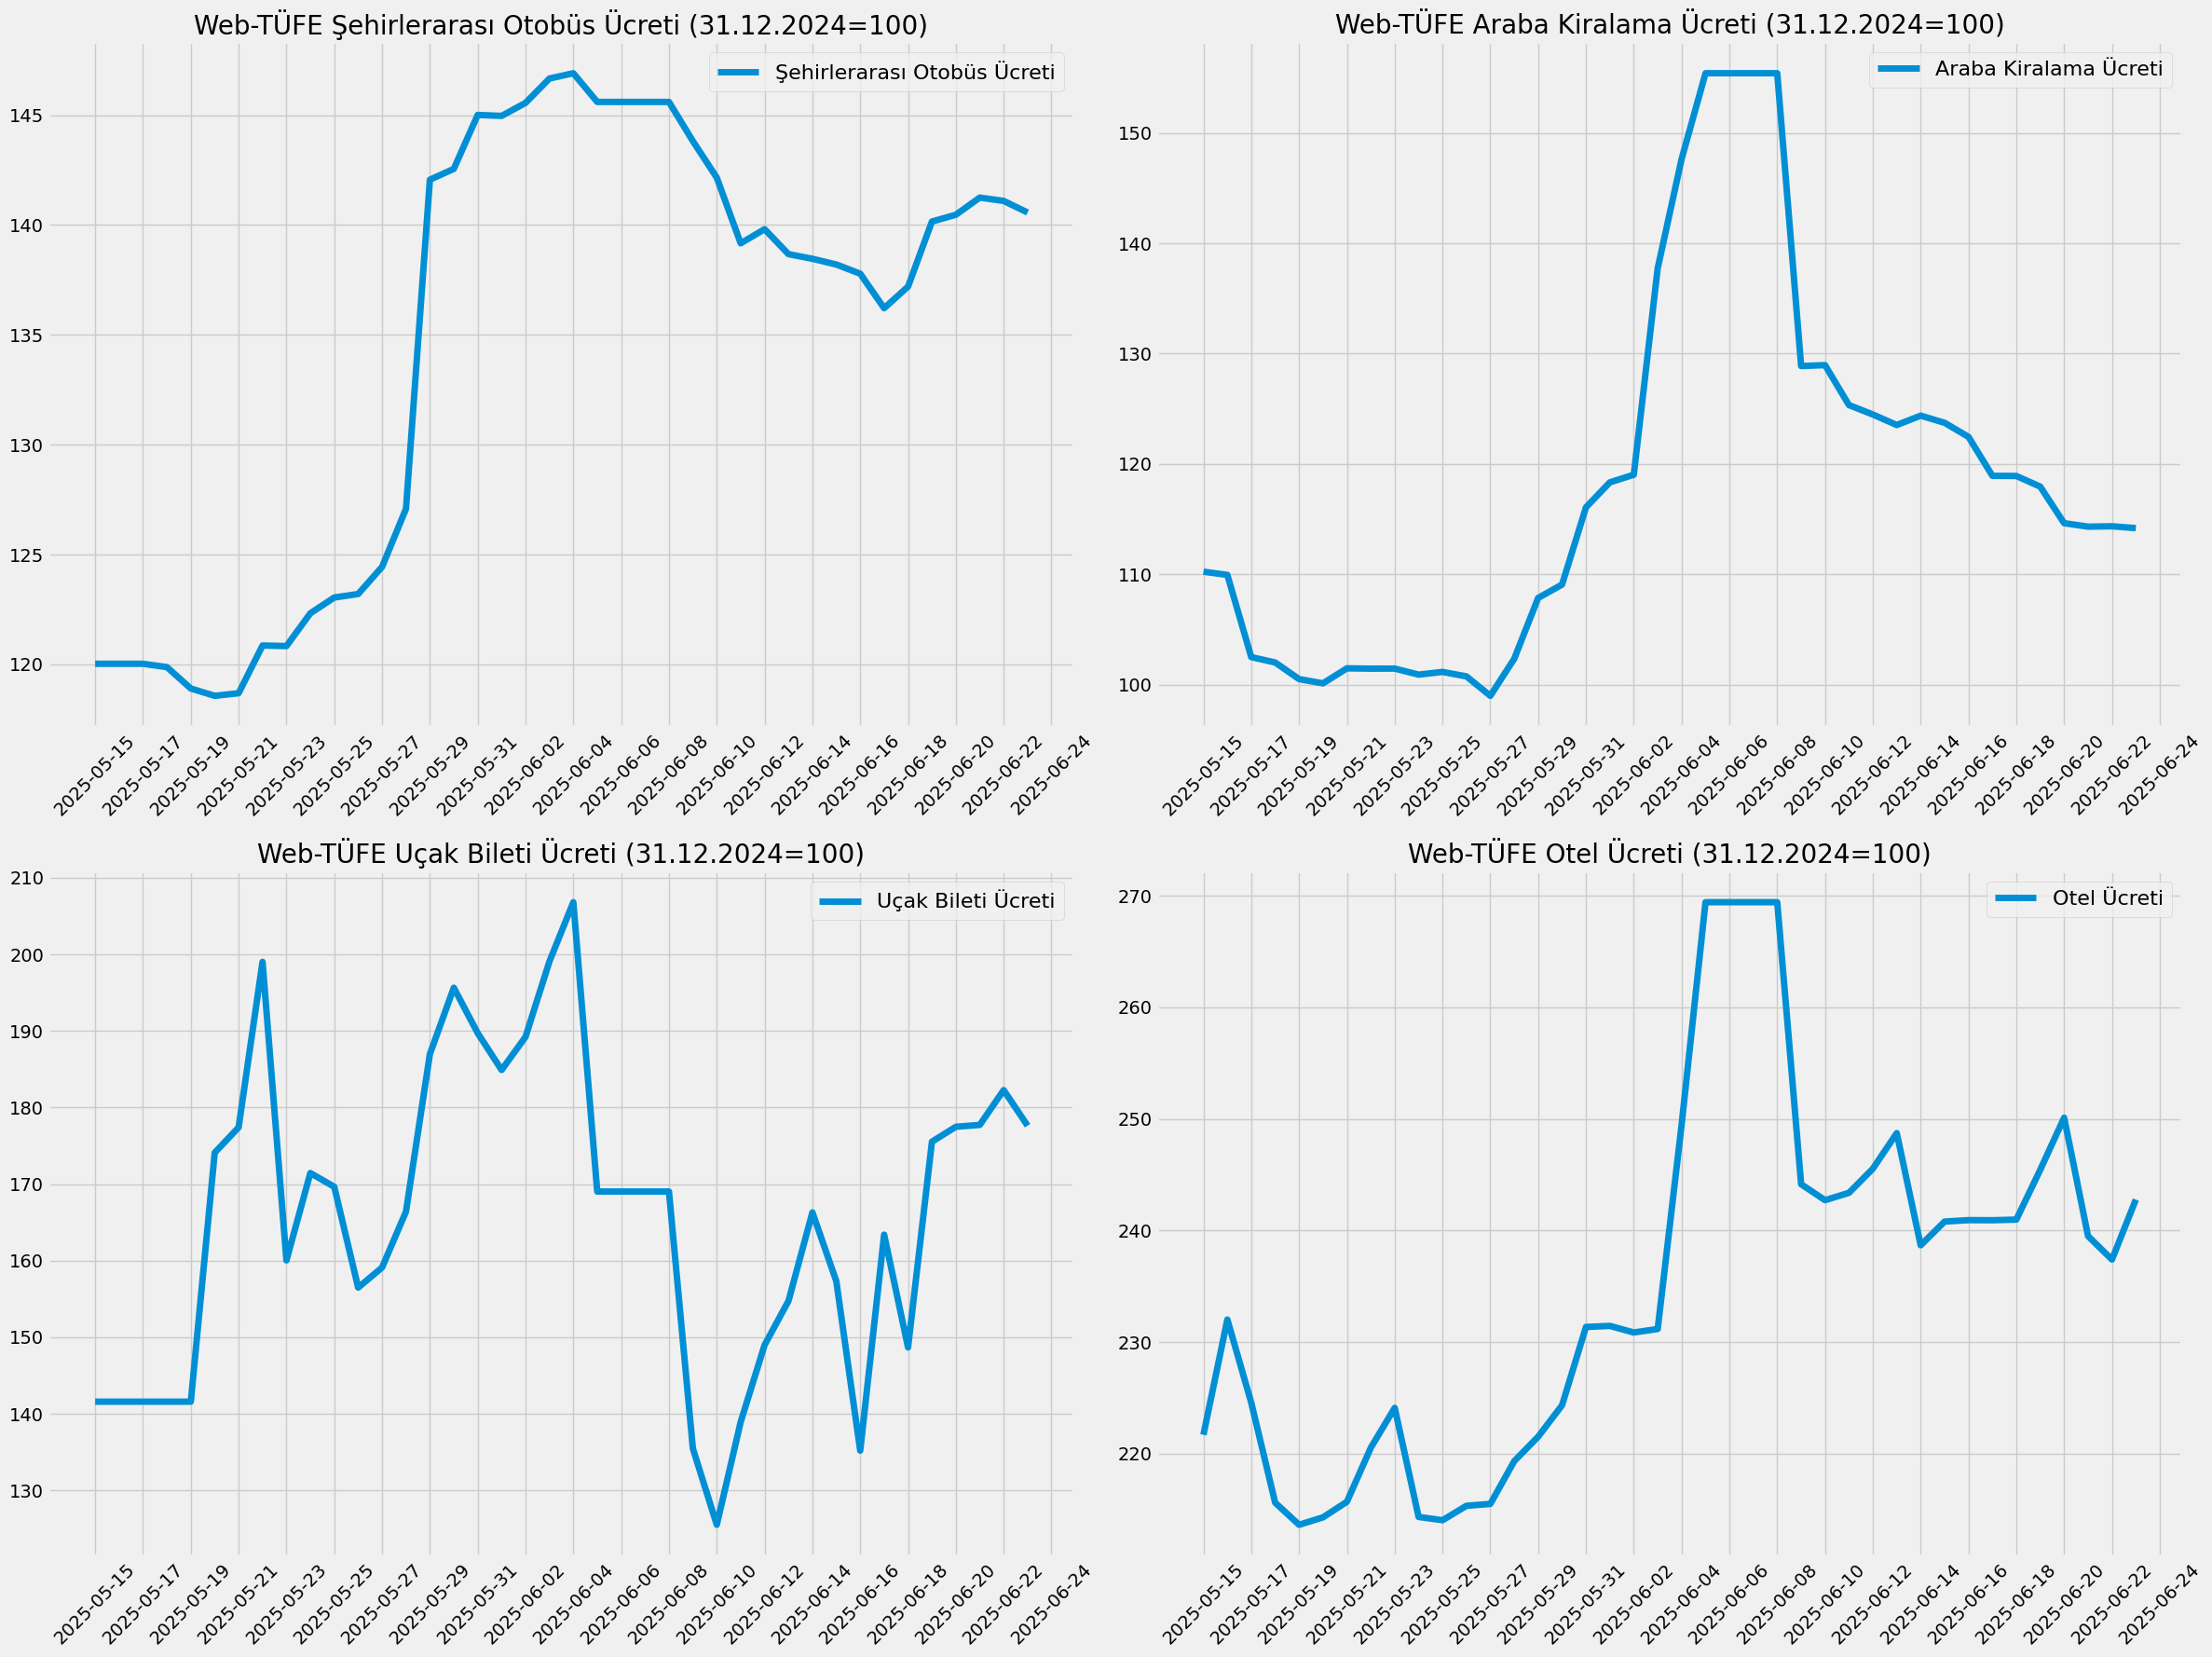

In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

plt.style.use("fivethirtyeight")

# Çizilecek endeks isimleri
endeks_listesi = [
    "Şehirlerarası Otobüs Ücreti ",
    "Araba Kiralama Ücreti",
    "Uçak Bileti Ücreti",
    "Otel Ücreti"  # 4. grafik için bir örnek daha ekledim
]

# Figure ve GridSpec tanımı
fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(2, 2)

# 2x2 gridde 4 subplot
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

axs = [ax1, ax2, ax3, ax4]
date_format = mdates.DateFormatter('%Y-%m-%d')

for i, endeks_adi in enumerate(endeks_listesi):
    ax = axs[i]
    ax.set_title(f"Web-TÜFE {endeks_adi.strip()} (31.12.2024=100)", fontsize=20)

    # Endeksi çiz
    data = endeksler[endeks_adi].loc["2025-05-15":]
    ax.plot(data.index, data.values, label=endeks_adi.strip(), linewidth=5)

    # Legend ve eksen ayarları
    ax.legend(fontsize=16)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(date_format)
    ax.tick_params(axis='x', labelrotation=45, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()


In [11]:
endeksler.iloc[-1].sort_values().tail(20)

Kavun                                                        141.757663
Üzüm                                                         141.757663
Battaniye                                                    142.848816
Araçların  Tamirine ve Bakımına Ödenen Ücretler (İşçilik)    143.861162
Çorbalar                                                     144.049817
Halı Temizleme                                               144.163357
Su Faturası                                                  144.485582
Uzman Doktor Muayene Ücreti                                  145.620000
Yer ve Duvar Döşemesi                                        146.409832
Şemsiye                                                      146.539223
Halı                                                         148.007086
Portakal                                                     150.206408
Elma                                                         150.865888
Pideler                                                      158

(array([ 98., 100., 102., 104., 106., 108., 110., 112., 114., 116.]),
 [Text(0, 98.0, '98'),
  Text(0, 100.0, '100'),
  Text(0, 102.0, '102'),
  Text(0, 104.0, '104'),
  Text(0, 106.0, '106'),
  Text(0, 108.0, '108'),
  Text(0, 110.0, '110'),
  Text(0, 112.0, '112'),
  Text(0, 114.0, '114'),
  Text(0, 116.0, '116')])

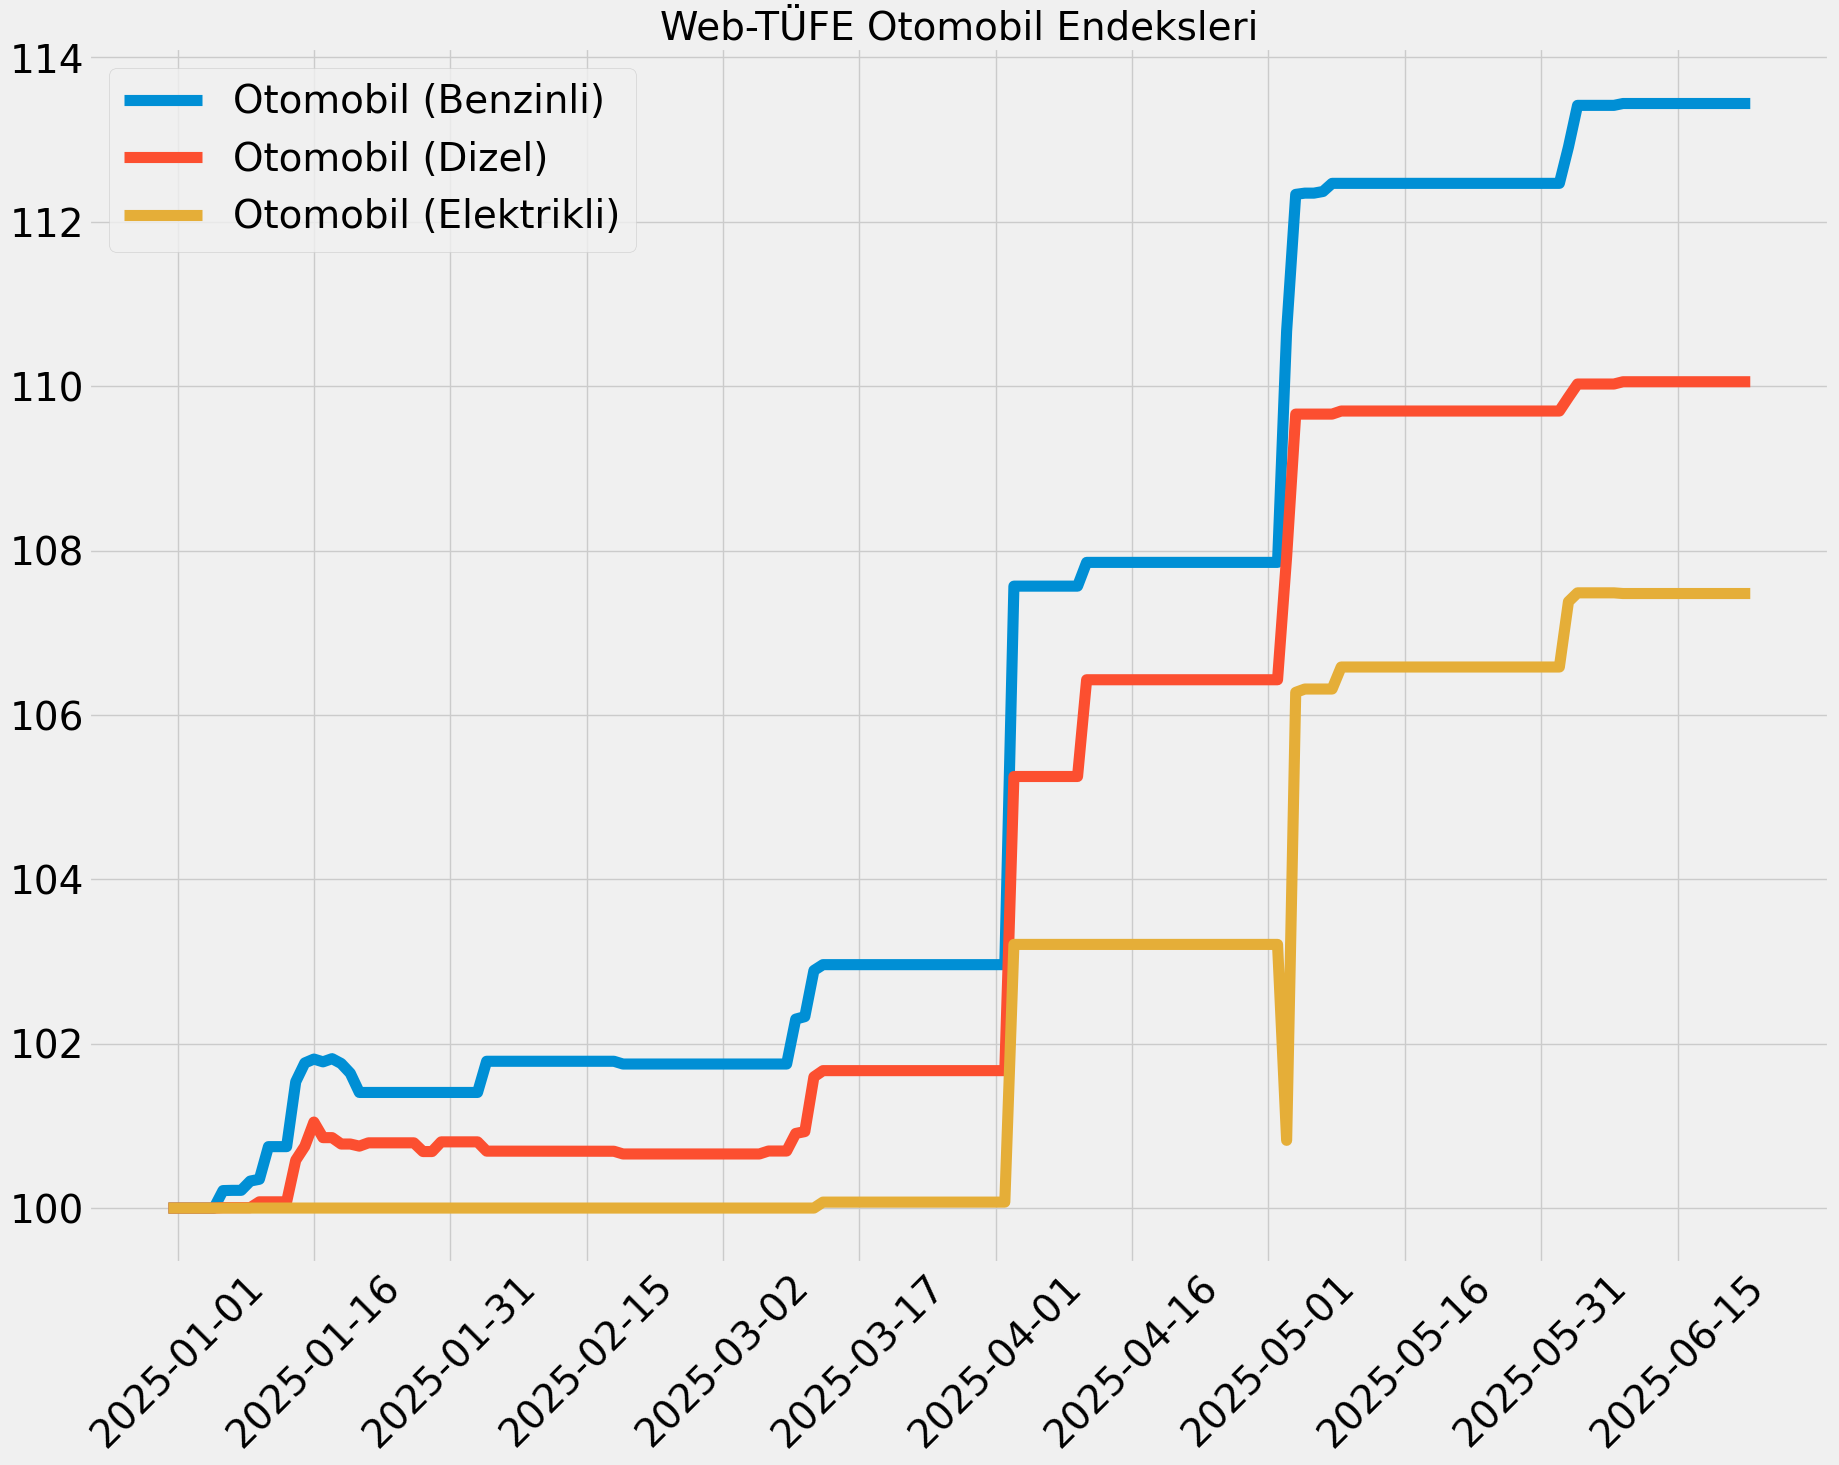

In [14]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÜFE Otomobil Endeksleri",fontsize=28)
plt.plot(endeksler["Otomobil (Benzinli)"],label="Otomobil (Benzinli)",linewidth=8)
plt.plot(endeksler["Otomobil (Dizel)"],label="Otomobil (Dizel)",linewidth=8)
plt.plot(endeksler["Otomobil (Elektrikli)"],label="Otomobil (Elektrikli)",linewidth=8)

plt.legend(fontsize=28)
plt.xticks(özelgöstergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
aylık=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-flask/harcama_gruplarıaylık.csv",index_col=0)
import matplotlib.pyplot as plt
import numpy as np

# Aylık veri örneği (Series gibi olduğunu varsayıyorum)
# Örnek: aylık["2025-05-31"] bir Series olsun
veri = aylık["2025-05-31"].dropna()  # NaN'leri çıkar

# Aylar ve grafik özellikleri
aylar = ["2025-03-31", "2025-04-30", "2025-05-31"]
renkler = ["#EF476F", "#118AB2", "#06D6A0"]
label_adlari = ["Mart 2025", "Nisan 2025", "Mayıs 2025"]

plt.figure(figsize=(10, 6))

for ay, renk, etiket in zip(aylar, renkler, label_adlari):
    veri = aylık[ay].dropna()
    mean = np.mean(veri)
    std = np.std(veri)

    x = np.linspace(mean - 4*std, mean + 4*std, 200)
    y = norm.pdf(x, mean, std)

    plt.plot(x, y, label=etiket, linewidth=2, color=renk)

plt.xlabel("Değer")
plt.ylabel("Olasılık Yoğunluğu")
plt.title("Aylık Veriler için Normal Dağılım Eğrileri")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


(array([ 90., 100., 110., 120., 130., 140., 150.]),
 [Text(0, 90.0, '90'),
  Text(0, 100.0, '100'),
  Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130'),
  Text(0, 140.0, '140'),
  Text(0, 150.0, '150')])

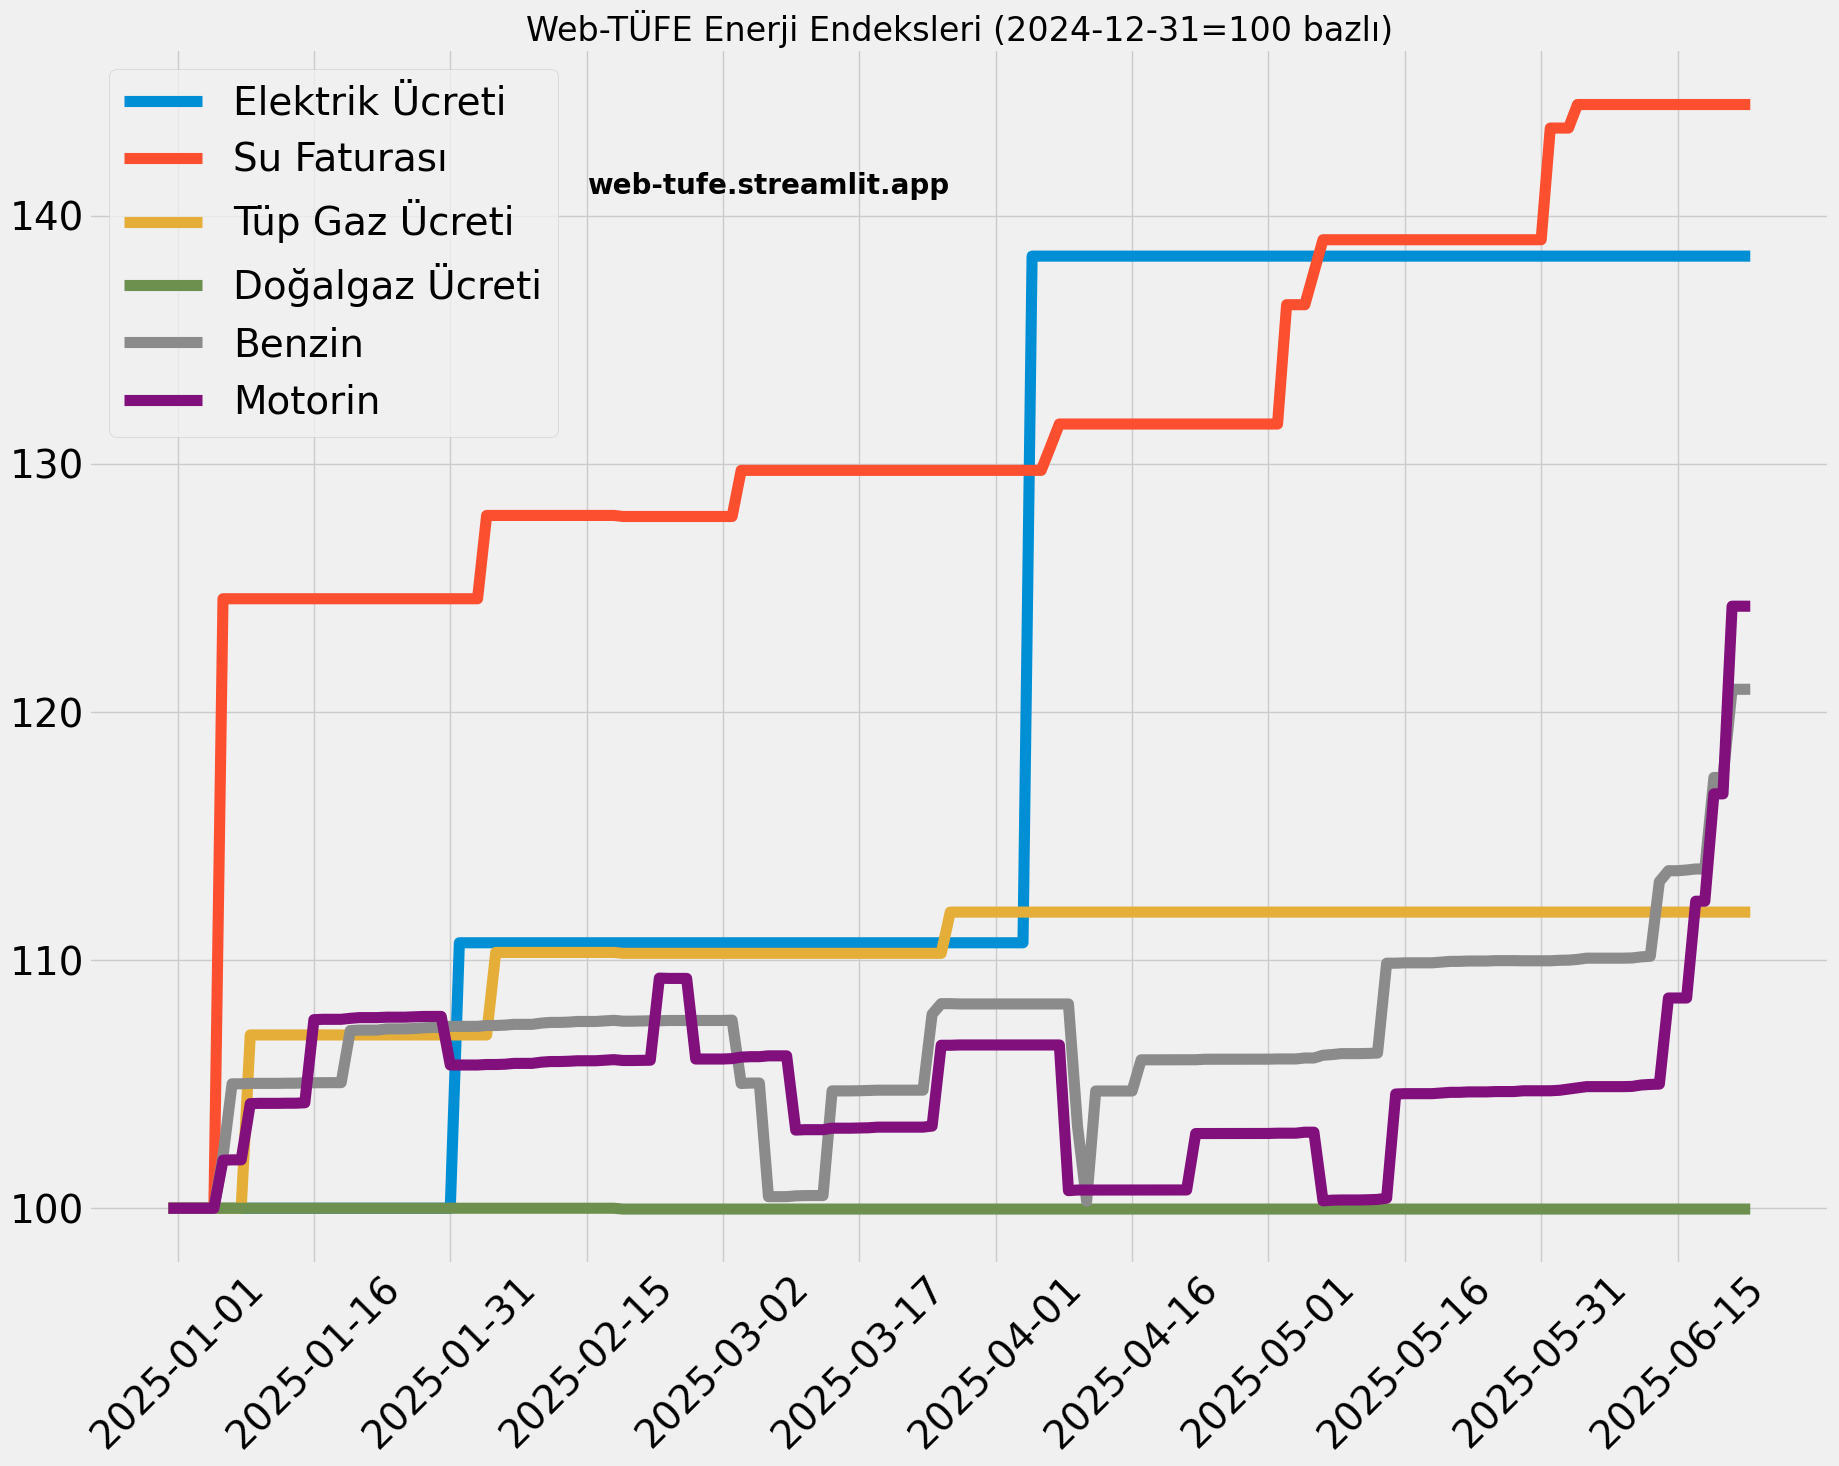

In [15]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÜFE Enerji Endeksleri (2024-12-31=100 bazlı)",fontsize=24)
plt.text(x=pd.to_datetime("2025-02-15"),y=140.9,s="web-tufe.streamlit.app",fontdict={"size":20,"weight":"bold"})
plt.plot(endeksler["Elektrik Ücreti"],label="Elektrik Ücreti",linewidth=8)
plt.plot(endeksler["Su Faturası"],label="Su Faturası",linewidth=8)
plt.plot(endeksler["Tüp Gaz Ücreti"],label="Tüp Gaz Ücreti",linewidth=8)
plt.plot(endeksler["Doğalgaz Ücreti"],label="Doğalgaz Ücreti",linewidth=8)
plt.plot(endeksler["Benzin"],label="Benzin",linewidth=8)
plt.plot(endeksler["Motorin"],label="Motorin",linewidth=8)
plt.legend(fontsize=28)
plt.xticks(özelgöstergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

(array([ 98., 100., 102., 104., 106., 108., 110., 112., 114., 116.]),
 [Text(0, 98.0, '98'),
  Text(0, 100.0, '100'),
  Text(0, 102.0, '102'),
  Text(0, 104.0, '104'),
  Text(0, 106.0, '106'),
  Text(0, 108.0, '108'),
  Text(0, 110.0, '110'),
  Text(0, 112.0, '112'),
  Text(0, 114.0, '114'),
  Text(0, 116.0, '116')])

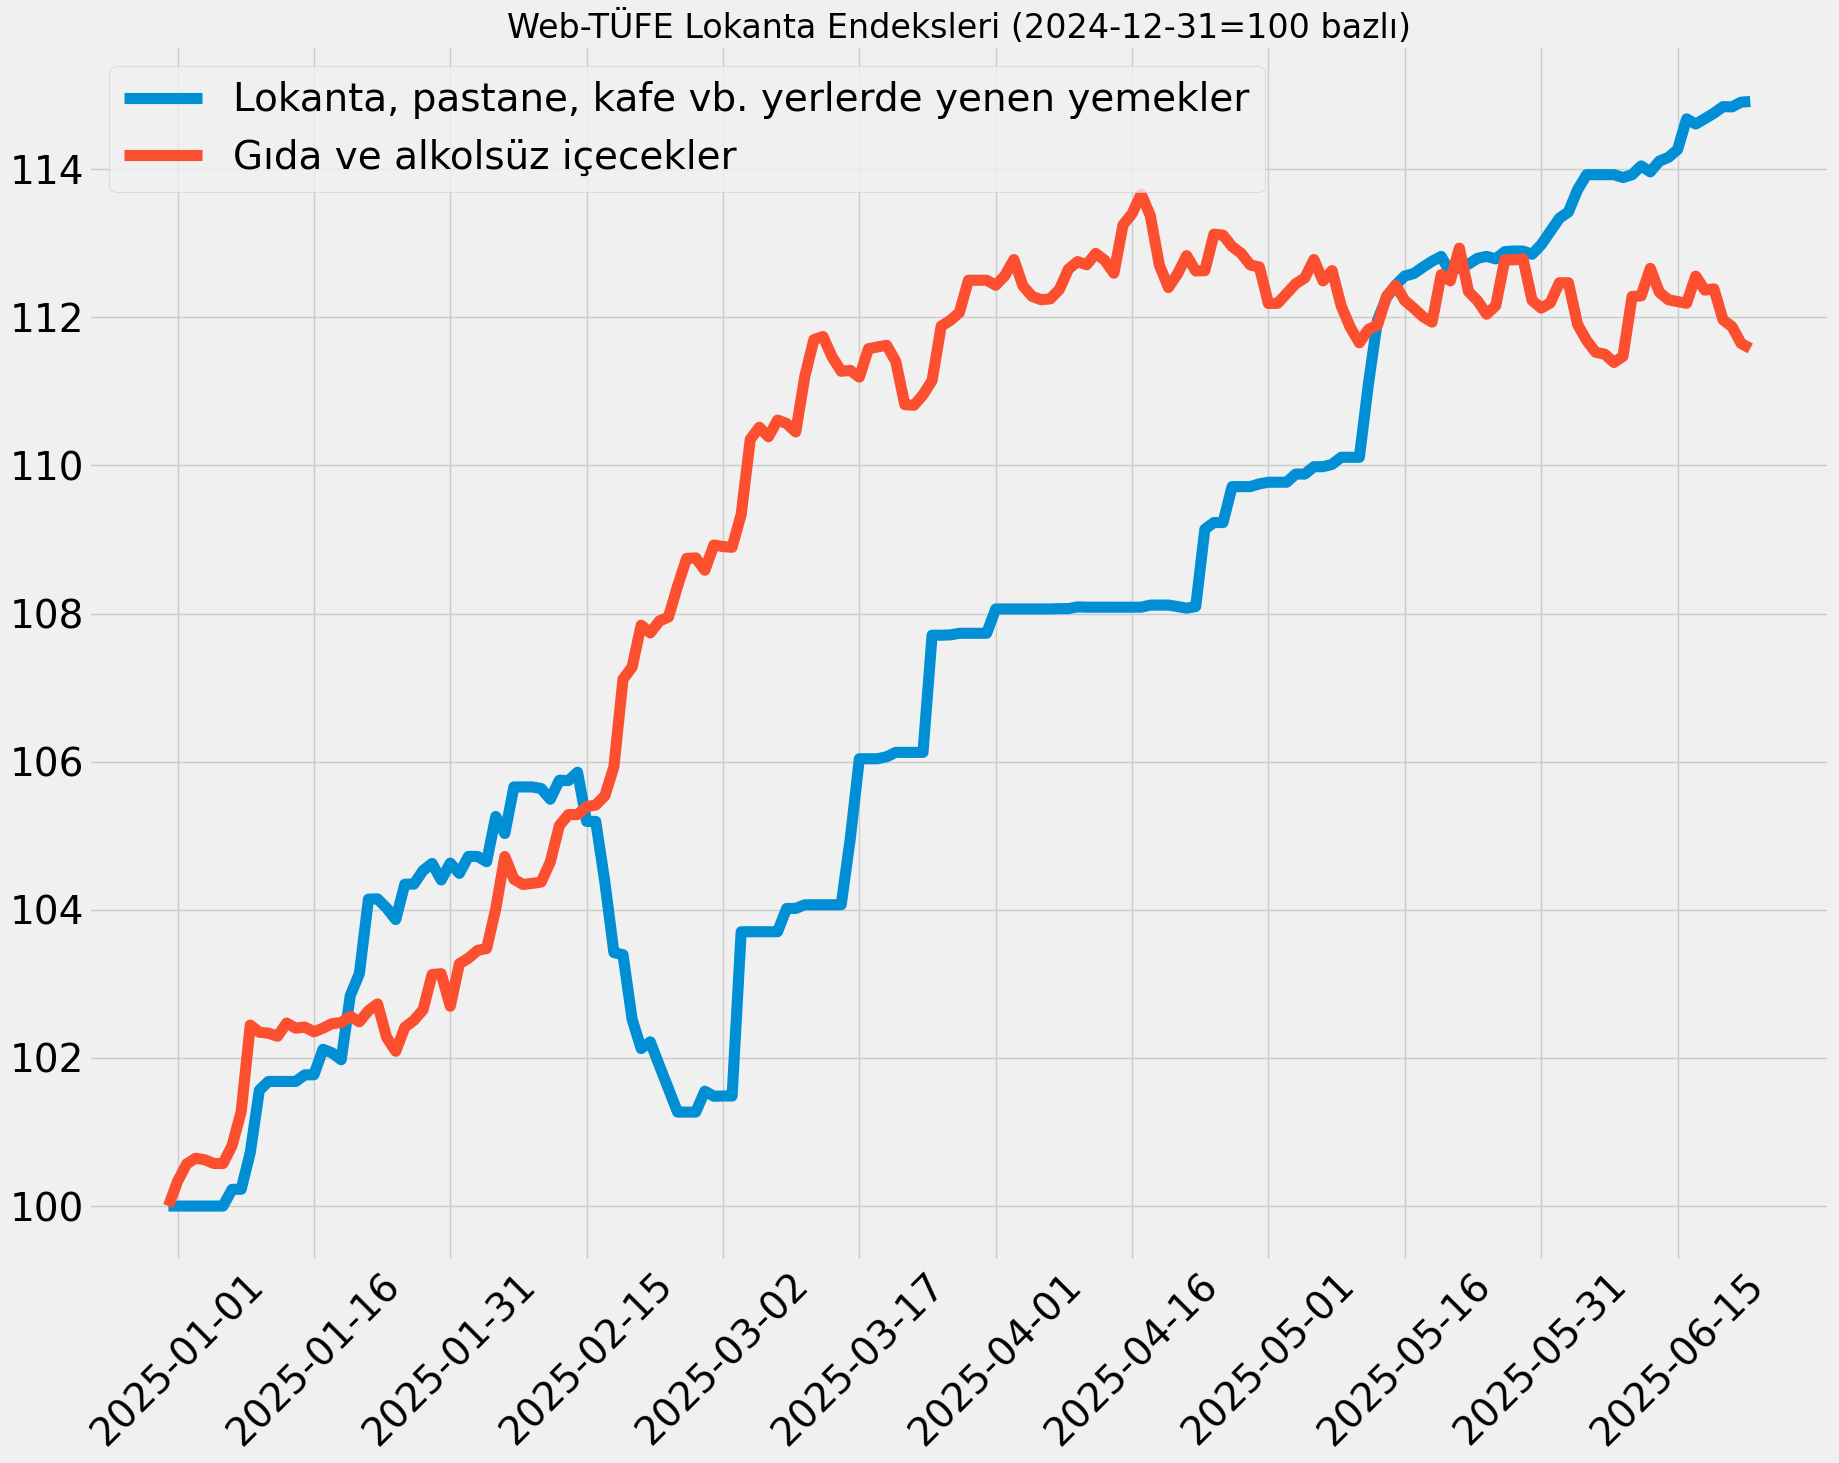

In [16]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÜFE Lokanta Endeksleri (2024-12-31=100 bazlı)",fontsize=24)
plt.plot(harcama_grupları["Lokanta, pastane, kafe vb. yerlerde yenen yemekler"],label="Lokanta, pastane, kafe vb. yerlerde yenen yemekler",linewidth=8)
plt.plot(gruplar["Gıda ve alkolsüz içecekler"],label="Gıda ve alkolsüz içecekler",linewidth=8)


plt.legend(fontsize=28)
plt.xticks(özelgöstergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

(array([ 90., 100., 110., 120., 130., 140., 150., 160., 170.]),
 [Text(0, 90.0, '90'),
  Text(0, 100.0, '100'),
  Text(0, 110.0, '110'),
  Text(0, 120.0, '120'),
  Text(0, 130.0, '130'),
  Text(0, 140.0, '140'),
  Text(0, 150.0, '150'),
  Text(0, 160.0, '160'),
  Text(0, 170.0, '170')])

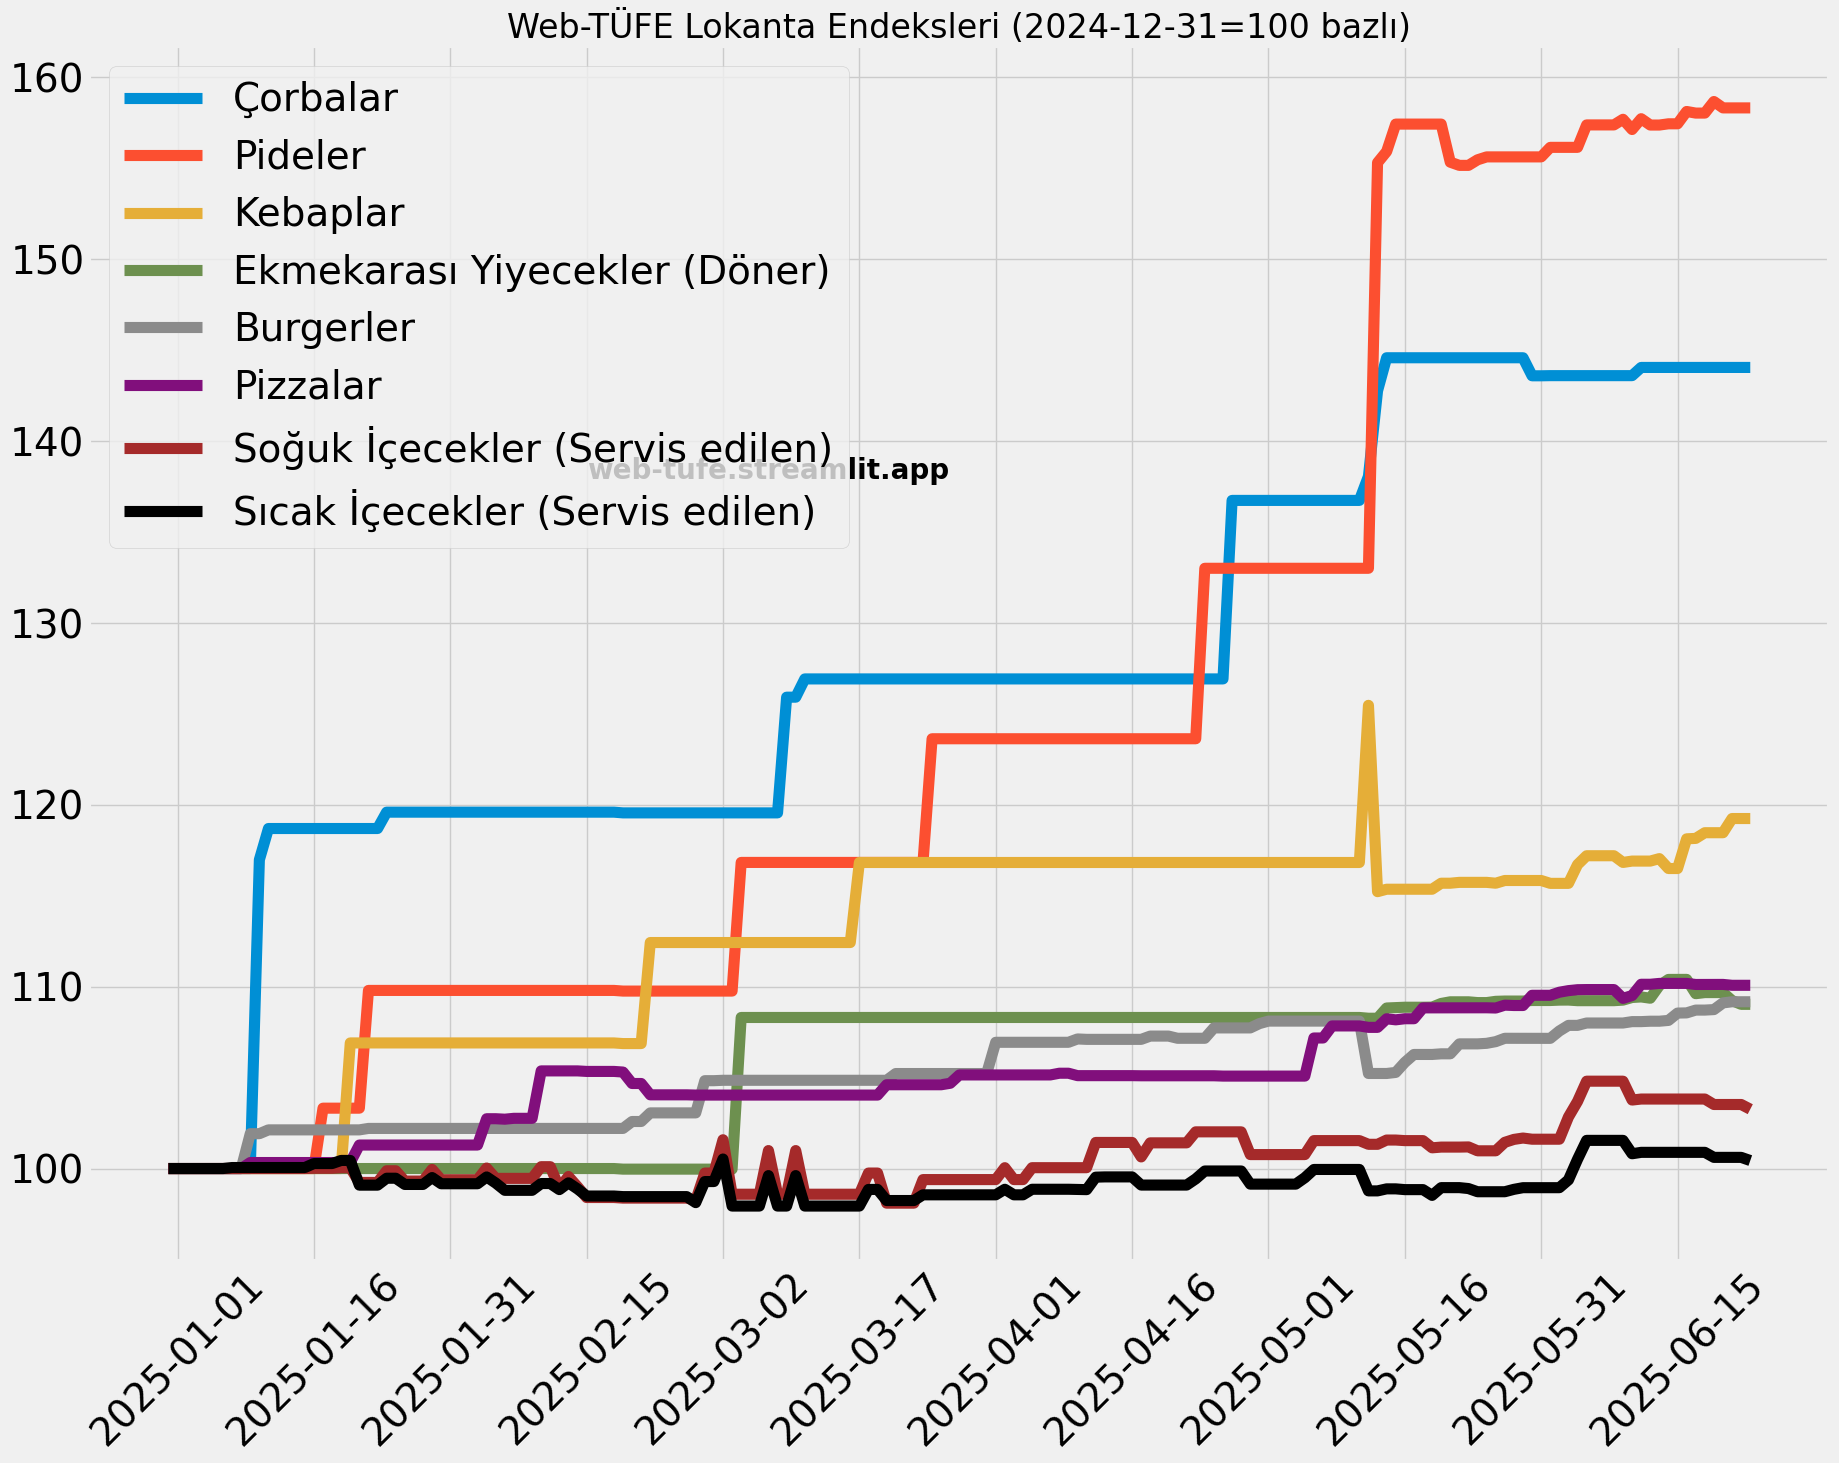

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÜFE Lokanta Endeksleri (2024-12-31=100 bazlı)",fontsize=24)
plt.text(x=pd.to_datetime("2025-02-15"),y=137.9,s="web-tufe.streamlit.app",fontdict={"size":20,"weight":"bold"})
plt.plot(endeksler["Çorbalar"],label="Çorbalar",linewidth=8)
plt.plot(endeksler["Pideler"],label="Pideler",linewidth=8)
plt.plot(endeksler["Kebaplar"],label="Kebaplar",linewidth=8)
plt.plot(endeksler["Ekmekarası Yiyecekler (Döner)"],label="Ekmekarası Yiyecekler (Döner)",linewidth=8)
plt.plot(endeksler["Burgerler"],label="Burgerler",linewidth=8)

plt.plot(endeksler["Pizzalar"],label="Pizzalar",linewidth=8)


plt.plot(endeksler["Soğuk İçecekler (Servis edilen)"],label="Soğuk İçecekler (Servis edilen)",linewidth=8,color="brown")
plt.plot(endeksler["Sıcak İçecekler (Servis edilen)"],label="Sıcak İçecekler (Servis edilen)",linewidth=8,color="black")

plt.legend(fontsize=28)
plt.xticks(özelgöstergeler.index[::15],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

(array([ 60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

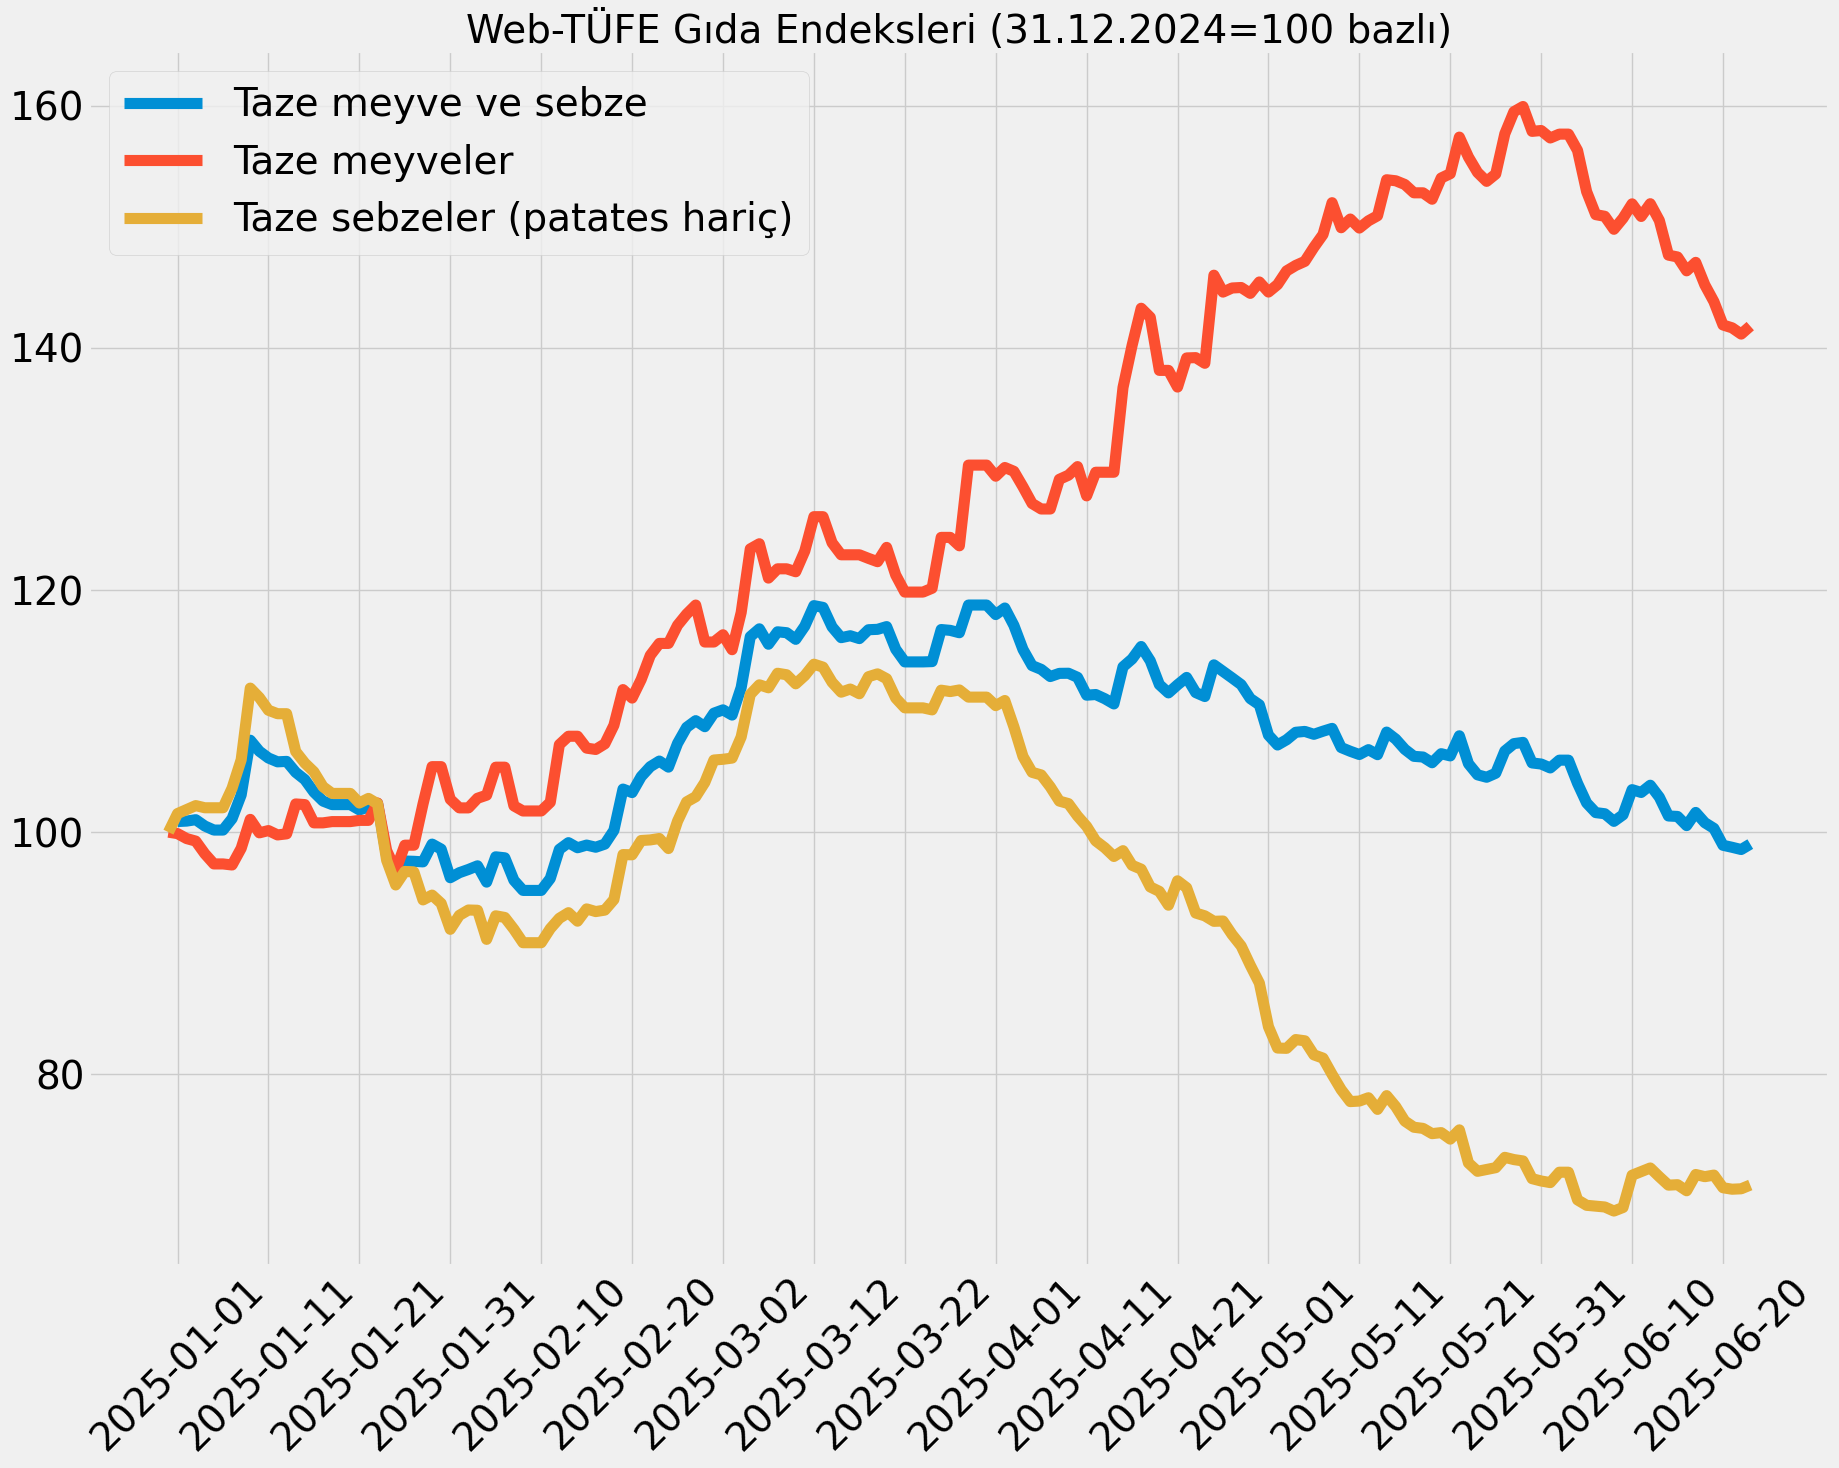

In [18]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.title("Web-TÜFE Gıda Endeksleri (31.12.2024=100 bazlı)",fontsize=28)
plt.plot(özelgöstergeler["Taze meyve ve sebze"],label="Taze meyve ve sebze",linewidth=8)
plt.plot(harcama_grupları["Taze meyveler"],label="Taze meyveler",linewidth=8)
plt.plot(harcama_grupları["Taze sebzeler (patates hariç)"],label="Taze sebzeler (patates hariç)",linewidth=8)

plt.legend(fontsize=28)
plt.xticks(özelgöstergeler.index[::10],rotation=45,fontsize=28)
plt.yticks(fontsize=28)

In [ ]:
"""import requests
import pandas as pd
import time
import json

# Şehirlerin koordinatlarını JSON dosyasından al
with open("cities_of_turkey.json", "r", encoding="utf-8") as f:
    cities_data = json.load(f)

cities = {city["name"]: (city["latitude"], city["longitude"]) for city in cities_data}

def get_historical_weather(lat, lon, start_date, end_date, retries=3, delay=30):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": "temperature_2m_min",
        "timezone": "Europe/Istanbul"
    }

    for attempt in range(retries):
        try:
            response = requests.get(url, params=params, timeout=30)
            response.raise_for_status()
            data = response.json()
            return pd.DataFrame({
                "date": data["daily"]["time"],
                "mean_temp": data["daily"]["temperature_2m_min"]
            })
        except requests.exceptions.RequestException as e:
            print(f"[{lat}, {lon}] Hata: {e}, tekrar deneniyor... ({attempt+1}/{retries})")
            time.sleep(delay)
    print(f"[{lat}, {lon}] Tüm denemeler başarısız oldu.")
    return None

def get_turkey_average_temperature(cities, start_date, end_date):
    all_temps = []
    for name, (lat, lon) in cities.items():
        df = get_historical_weather(lat, lon, start_date, end_date)
        if df is not None:
            df = df.rename(columns={"mean_temp": name})
            all_temps.append(df.set_index("date"))
        else:
            print(f"{name} için veri alınamadı.")

    all_data = pd.concat(all_temps, axis=1)
    all_data.index = pd.to_datetime(all_data.index)
    all_data["Turkey_Avg_Temp"] = all_data.mean(axis=1)
    return all_data.reset_index()

# Tarih aralığını belirle
start_date = "2025-01-01"
end_date = "2025-04-15"

# Ortalama sıcaklığı al
df_avg = get_turkey_average_temperature(cities, start_date, end_date)

# Sonuçları kontrol et
print(df_avg.head())
"""

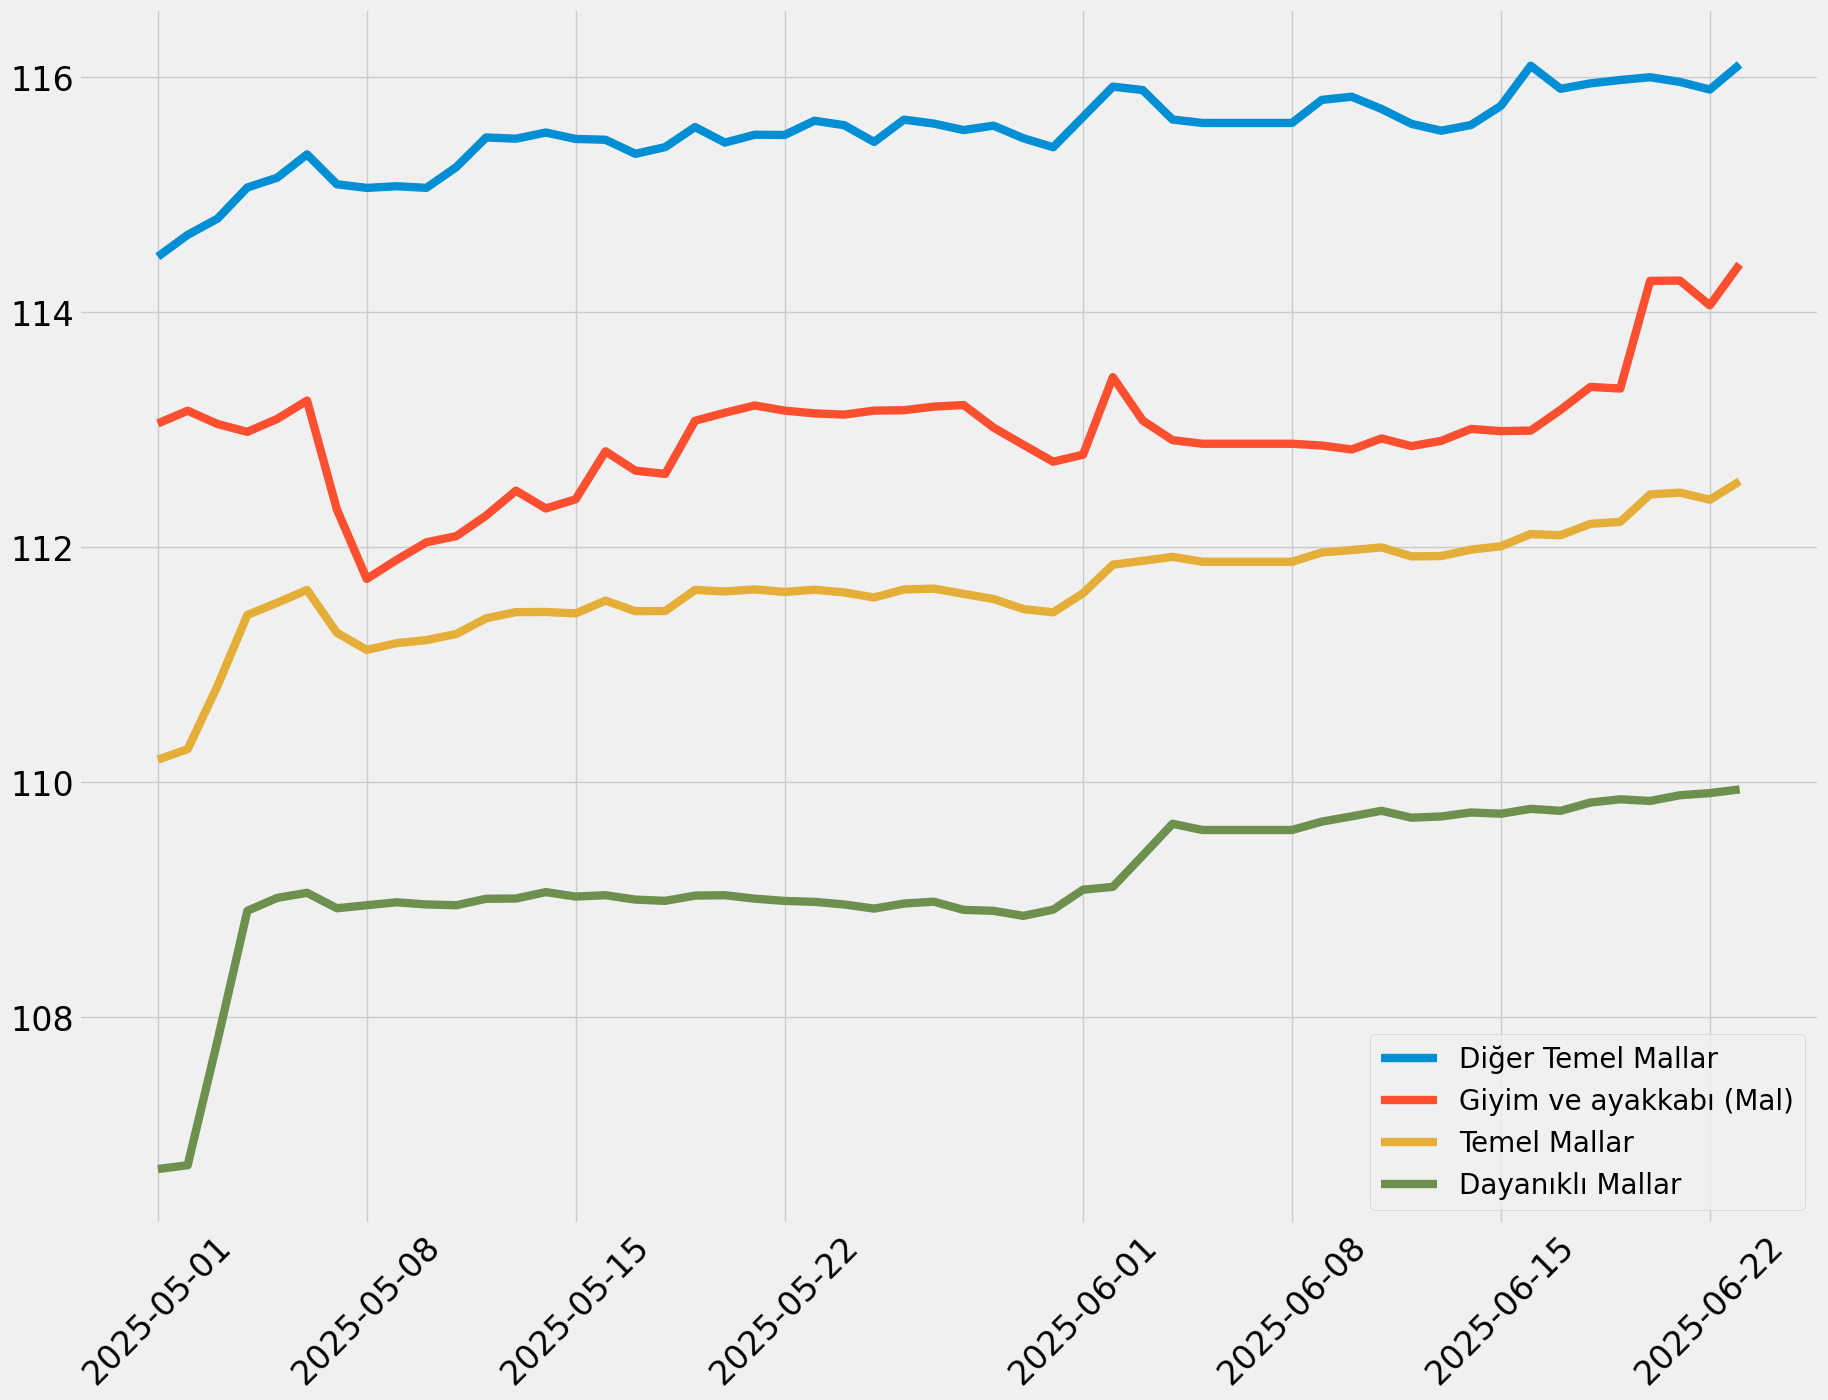

In [19]:

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,15))
plt.plot(özelgöstergeler["Diğer Temel Mallar"].loc["2025-05":],label="Diğer Temel Mallar",linewidth=6)
plt.plot(özelgöstergeler["Giyim ve ayakkabı"].loc["2025-05":],label="Giyim ve ayakkabı (Mal)",linewidth=6)

plt.plot(özelgöstergeler["Temel mallar"].loc["2025-05":],label="Temel Mallar",linewidth=6)
plt.plot(özelgöstergeler["Dayanıklı Mallar (altın hariç)"].loc["2025-05":],label="Dayanıklı Mallar",linewidth=6)

plt.xticks(fontsize=24,rotation=45)
plt.yticks(fontsize=24)

plt.legend(fontsize=20)

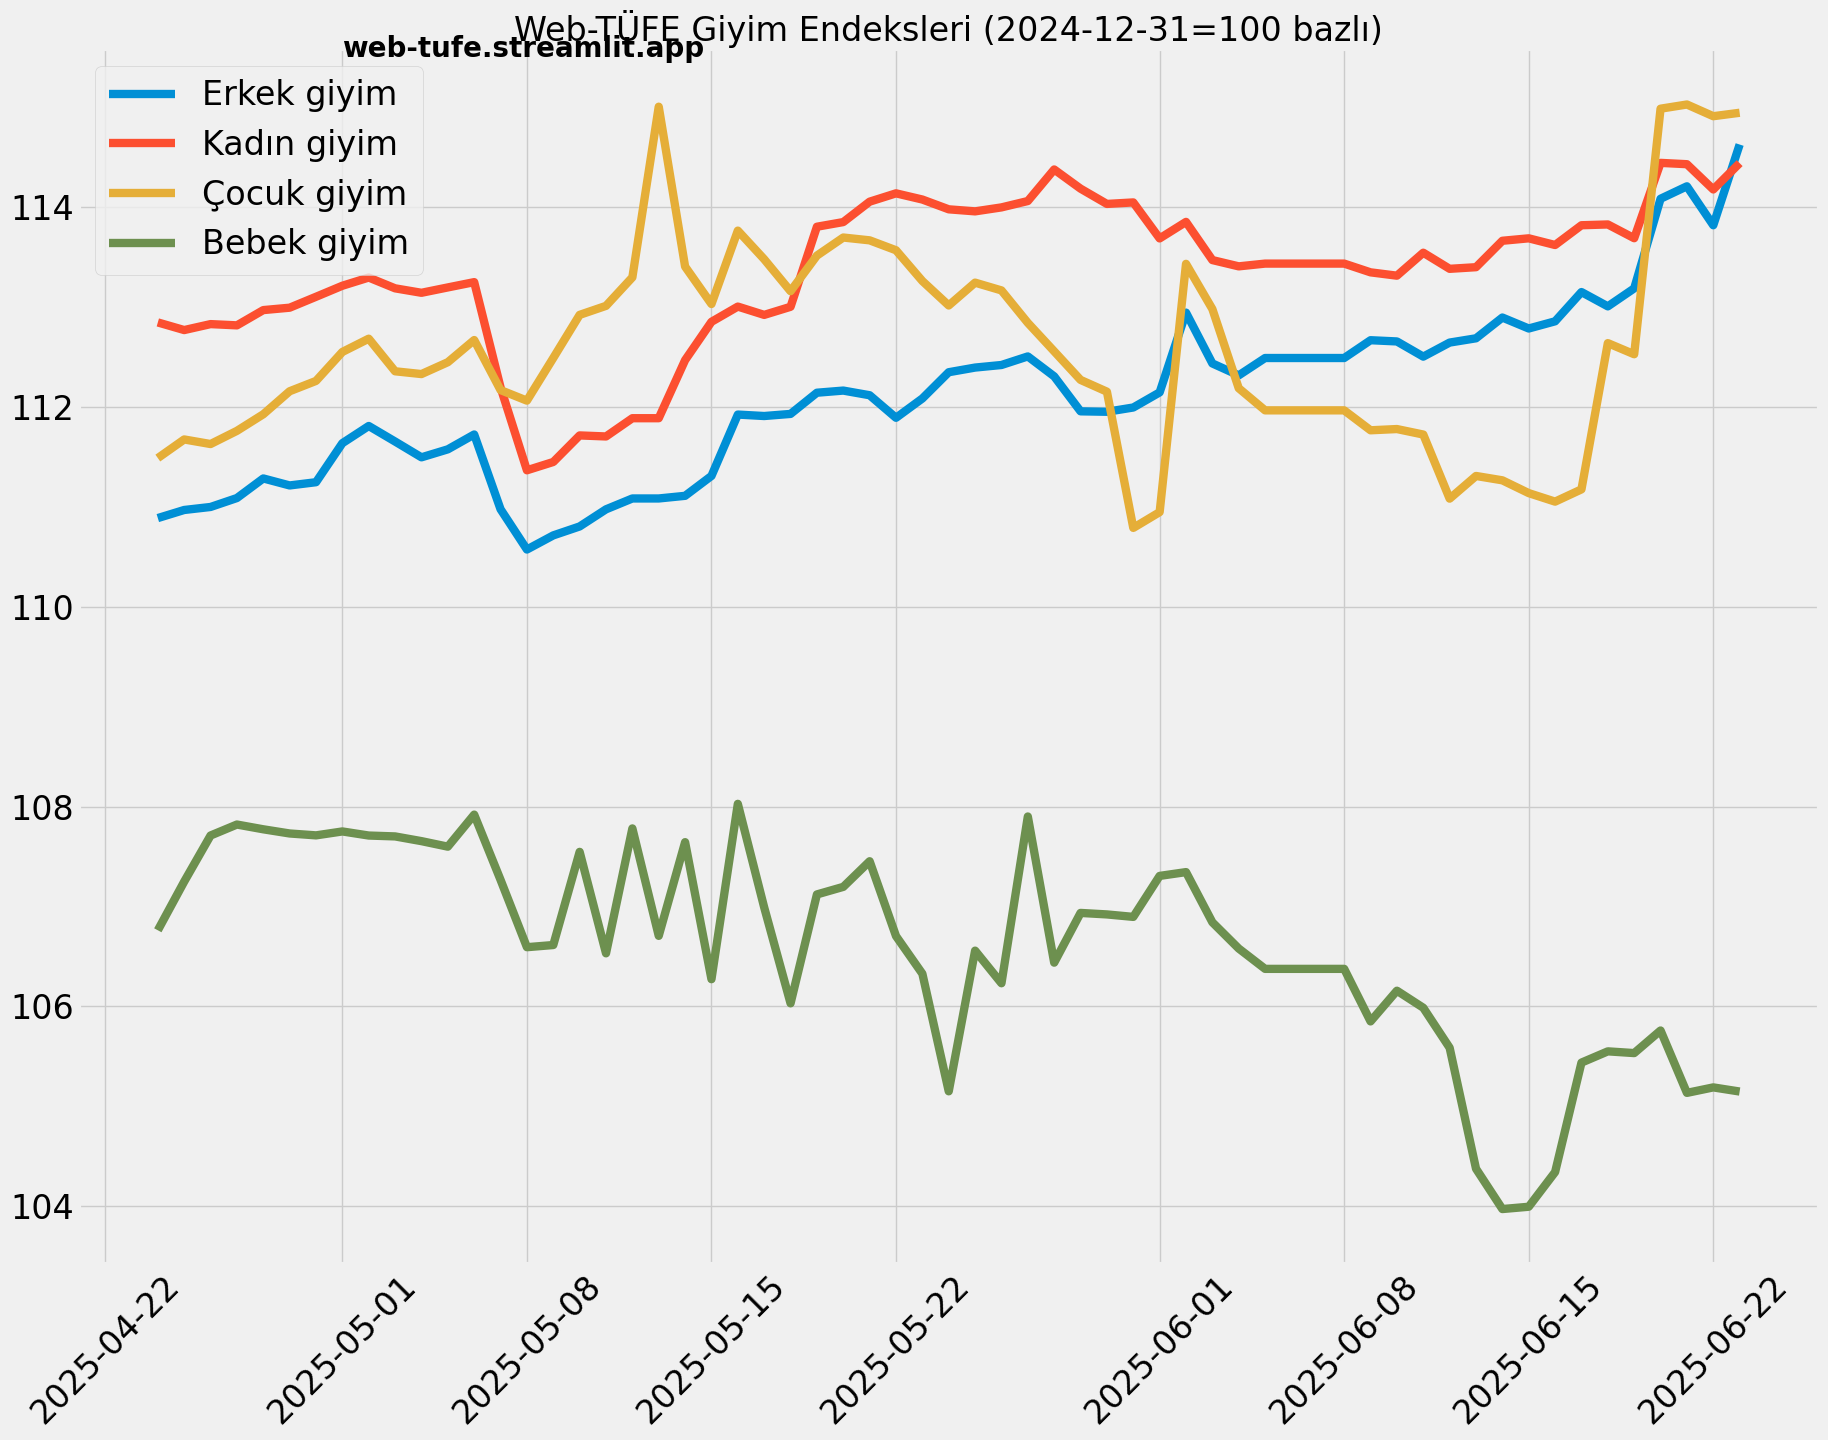

In [20]:

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plt.figure(figsize=(20,15))
plt.title("Web-TÜFE Giyim Endeksleri (2024-12-31=100 bazlı)",fontsize=24)
plt.text(x=pd.to_datetime("2025-05-01"),y=115.5,s="web-tufe.streamlit.app",fontdict={"size":20,"weight":"bold"})
plt.plot(harcama_grupları["Erkek giyim"].loc["2025-04-24":],label="Erkek giyim",linewidth=6)
plt.plot(harcama_grupları["Kadın giyim"].loc["2025-04-24":],label="Kadın giyim",linewidth=6)
plt.plot(harcama_grupları["Çocuk giyim"].loc["2025-04-24":],label="Çocuk giyim",linewidth=6)

plt.plot(harcama_grupları["Bebek giyim"].loc["2025-04-24":],label="Bebek giyim",linewidth=6)


"""plt.axvline(x=özelgöstergeler.index[78],linestyle="--",color="black")
plt.text(özelgöstergeler.index[83], 111, "19 Mart Kur artışı", 
         horizontalalignment='center', verticalalignment='top', 
         fontsize=20, color="black", fontweight="bold")"""
plt.xticks(fontsize=24,rotation=45)
plt.yticks(fontsize=24)

plt.legend(fontsize=24)

In [21]:
ağırlıklar1=pd.read_csv("ağırlıklartüfe.csv",index_col=0)
ana_ağırlık=ağırlıklar1.groupby("Ana Grup")["Ağırlık"].sum()
ana_ağırlık=pd.DataFrame(ana_ağırlık)
ana_ağırlık["Ağırlık"]=ana_ağırlık["Ağırlık"]/ana_ağırlık["Ağırlık"].sum()
ana_ağırlık

,Ağırlık
Ana Grup,
Alkollü içecekler ve tütün,0.039770
Ev eşyası,0.081589
Eğitim,0.022641
Eğlence ve kültür,0.020511
Giyim ve ayakkabı,0.079920
Gıda ve alkolsüz içecekler,0.281840
Haberleşme,0.038924
Konut,0.160474
Lokanta ve oteller,0.087696


In [22]:
katkılar=pd.DataFrame(columns=ana_ağırlık.index.values)
for grup in gruplar.drop("TÜFE",axis=1).columns:
    ağırlıklı=hareketli_aylik_ortalama((gruplar[grup]*ana_ağırlık["Ağırlık"].loc[grup]))["Aylık Ortalama"].fillna(method="ffill").resample("M").last().iloc[1:].diff().dropna()
    ağırlıklı.loc["2025-06"]=gruplar[grup].loc["2025-06"].mean()*ana_ağırlık["Ağırlık"].loc[grup]-gruplar[grup].loc["2025-05":"2025-05-22"].mean()*ana_ağırlık["Ağırlık"].loc[grup]
    katkı=100*ağırlıklı/hareketli_aylik_ortalama(tüfe["TÜFE"])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().shift(1).dropna()[1:]
    katkılar[grup]=katkı
    

In [23]:
katkı_payları=katkılar.copy()
katkı_payları["TOPLAM"] = katkı_payları.sum(axis=1)

katkı_payları.diff().round(2).iloc[-1].sort_values()

Ev eşyası                    -0.09
TOPLAM                       -0.08
Lokanta ve oteller           -0.07
Konut                        -0.06
Eğlence ve kültür            -0.03
Alkollü içecekler ve tütün    0.00
Eğitim                        0.00
Haberleşme                   -0.00
Sağlık                       -0.00
Çeşitli mal ve hizmetler      0.01
Giyim ve ayakkabı             0.04
Gıda ve alkolsüz içecekler    0.06
Ulaştırma                     0.07
Name: 2025-06-30 00:00:00, dtype: float64

In [ ]:
import pandas as pd

# Gruplar TÜFE hariç
alt_gruplar = gruplar.drop(columns=["TÜFE"])

# Ağırlıklar
weights = ana_ağırlık["Ağırlık"]

# 30 gün önceki TÜFE
tufe_30_once = gruplar["TÜFE"].shift(30)

# 30 günlük değişim (her grup için)
degisim_30_gun = (alt_gruplar - alt_gruplar.shift(30)) / tufe_30_once.values.reshape(-1,1) * 100

# Katkılar (değişim × ağırlık)
katkı_payları = degisim_30_gun * weights.values

# Sonuç olarak katkılar DataFrame'ini al, NaN satırlarını at
katkı_payları = katkı_payları.dropna()
katkı_payları["TOPLAM"] = katkı_payları.sum(axis=1)
katkı_payları


In [ ]:
import pandas as pd

# Gruplar TÜFE hariç
alt_gruplar = gruplar.drop(columns=["TÜFE"])

# Ağırlıklar
weights = ana_ağırlık["Ağırlık"]

# 30 gün önceki TÜFE
tufe_30_once = gruplar["TÜFE"].shift(30)

# 30 günlük değişim (her grup için)
degisim_30_gun = (alt_gruplar - alt_gruplar.shift(30)) / tufe_30_once.values.reshape(-1,1) * 100

# Katkılar (değişim × ağırlık)
katkı_payları = degisim_30_gun * weights.values

# Sonuç olarak katkılar DataFrame'ini al, NaN satırlarını at
katkı_payları = katkı_payları.dropna()
katkı_payları["TOPLAM"] = katkı_payları.sum(axis=1)



katkı_payları=katkı_payları.dropna()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter




# Kategoriler listesi (TÜFE hariç)
kategoriler = [col for col in gruplar.columns if col != "TÜFE"]

# Renkler
renkler = plt.cm.tab10(np.linspace(0, 1, len(kategoriler)))


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
plt.style.use("fivethirtyeight")
# Figür boyutunu belirle
plt.figure(figsize=(25, 15))
if len(gruplar.index[1:]) > 500:
    katkı_payları_aylık = katkı_payları.resample('M').mean()
    tarihler = katkı_payları_aylık.index
    katkı_değerleri = katkı_payları_aylık
else:
    tarihler = katkı_payları.index
    katkı_değerleri = katkı_payları

# Kategori renkleri
renk_haritalama = {
    "Gıda ve alkolsüz içecekler": "#FF6B6B",
    "Alkollü içecekler ve tütün": "#4A90E2",
    "Giyim ve ayakkabı": "#50E3C2",
    "Konut": "#F5A623",
    "Ev eşyası": "#FFCE56",
    "Sağlık": "#BA68C8",
    "Ulaştırma": "#66BB6A",
    "Haberleşme": "magenta",  # "black" yerine renkli yaptım, negatif değerler için görünürlüğü artırmak için
    "Eğlence ve kültür": "blue",
    "Eğitim": "#AB47BC",
    "Lokanta ve oteller": "#8D6E63",
    "Çeşitli mal ve hizmetler": "#78909C"
}

# Çubukların genişliği
width = 20 if len(tarihler) > 1000 else 0.8

# Kategori listesini pozitif ve negatif olarak ayır
# Her tarih noktası için, her kategorinin değerini kontrol et
# (Bu şekilde, bir kategori bazı tarihlerde pozitif, bazılarında negatif olabilir)
bottom_pos = np.zeros(len(tarihler))
bottom_neg = np.zeros(len(tarihler))

# Önce tüm kategorileri çiz
for i, kategori in enumerate(kategoriler):
    if kategori in renk_haritalama:
        renk = renk_haritalama[kategori]
    else:
        renk = plt.cm.tab10(i % 10)
    
    # Pozitif ve negatif değerler için maskeleme yap
    pozitif_değerler = katkı_payları[kategori].values.copy()
    negatif_değerler = katkı_payları[kategori].values.copy()
    
    # Pozitif ve negatif değerleri ayır
    pozitif_değerler[pozitif_değerler < 0] = 0
    negatif_değerler[negatif_değerler > 0] = 0
    
    # Pozitif değerleri çiz
    plt.bar(tarihler, pozitif_değerler, bottom=bottom_pos, 
            width=width, color=renk, label=kategori, 
            edgecolor='white', linewidth=0.2)
    
    # Negatif değerleri çiz
    plt.bar(tarihler, negatif_değerler, bottom=bottom_neg, 
            width=width, color=renk, 
            edgecolor='white', linewidth=0.2)
    
    # Sonraki kategori için bottom değerlerini güncelle
    bottom_pos += pozitif_değerler
    bottom_neg += negatif_değerler

# Toplam TÜFE değerini çizgi grafiği olarak çizdir
plt.plot(tarihler, katkı_payları["TOPLAM"], color="black", 
         linewidth=4, label="TOPLAM")

# Sıfır çizgisi ekle
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)



# Eksen etiketleri ve başlık
plt.ylabel("Enflasyon Katkısı (%)", fontsize=20)
plt.title("Web-TÜFE 30 Günlük Değişimi (%)", fontsize=25)



# Y ekseni formatı
def yüzde_formatı(x, pos):
    return f"{x:.2f}%"

plt.gca().yaxis.set_major_formatter(FuncFormatter(yüzde_formatı))

# Efsane/Lejant
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           ncol=min(6, len(kategoriler) + 1), frameon=False, fontsize=22)

min_y=katkı_payları.min().min()
plt.ylim(katkı_payları.min().min()-0.1,katkı_payları.max().max()+0.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Arka plan ve kenar ayarları
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Grafiği göster
plt.tight_layout()
plt.show()

In [ ]:
ürünler=ürünler.reset_index(drop=False)

In [ ]:
enerji=["Elektrik","Doğalgaz ve ilgili abonelik ücretleri","Tüpgaz (ev tüpü)","Katı yakıtlar (odun, kömür)",
                 "Kişisel ulaştırma araçlarının yakıt ve yağları (benzin, motorin, motor yağı)","Su (şebeke suyu)"
       ]
enerji=ürünler[ürünler["Grup"].isin(enerji)].drop_duplicates()
enerji["Ağırlık"]=enerji["Ağırlık"]/enerji["Ağırlık"].sum()
enerji=enerji.drop_duplicates()

işlenmemiş_gıda=["Dana Eti","Kuzu Eti","Tavuk Eti","Sakatat","Balık","Konserve Balık","Yumurta",'Portakal', 'Üzüm', 'Armut', 'Ayva', 'Çilek', 'Elma', 'Karpuz',
    'Kavun', 'Kivi', 'Limon', 'Mandalina', 'Muz', 'Nar', 'Şeftali','Çarliston Biber', 'Dolmalık Biber', 'Sivri Biber', 'Dereotu',
    'Domates', 'Taze Fasulye', 'Havuç', 'Ispanak', 'Kabak',
    'Karnabahar', 'Kuru Soğan', 'Beyaz Lahana', 'Kırmızı Lahana',
    'Mantar', 'Kıvırcık', 'Maydanoz', 'Nane', 'Patlıcan', 'Pırasa',
    'Roka', 'Salatalık', 'Sarımsak', 'Kırmızı Turp','Patates']
işlenmemiş_gıda=ürünler[ürünler["Ürün"].isin(işlenmemiş_gıda)].drop_duplicates()
işlenmemiş_gıda["Ağırlık"]=işlenmemiş_gıda["Ağırlık"]/işlenmemiş_gıda["Ağırlık"].sum()
işlenmemiş_gıda=işlenmemiş_gıda.drop_duplicates()

işlenmiş_gıda=['Antep Fıstığı', 'Ay Çekirdeği', 'Ayran', 'Ayçiçek Yağı',
    'Badem İçi', 'Baharat', 'Baklava', 'Bal',
    'Bebek Sütü (Toz Karışım)', 'Beyaz Peynir', 'Bisküvi',
    'Bitki ve Meyve Çayı (Poşet)', 'Bulgur', 'Buğday Unu', 'Ceviz İçi',
    'Cipsler', 'Dondurma', 'Ekmek', 'Ekmek Hamuru (Yufka)',
    'Fındık Ezmesi', 'Fındık İçi', 'Gazoz Meyveli', 'Gofret',
    'Hazır Et Yemekleri', 'Hazır Kahve',
    'Hazır Pakette Toz Tatlılar (Puding)', 'Hazır Sütlü Tatlılar',
    'Hazır Çorbalar', 'Kabak Çekirdeği', 'Kabartma Maddeleri', 'Kahve',
    'Kakao', 'Kakaolu Toz İçecekler', 'Kağıtlı Şeker', 'Kaşar Peyniri',
    'Kek', 'Kesme Şeker', 'Ketçap', 'Kola', 'Konserveler', 'Kraker',
    'Krem Peynir', 'Kuru Fasulye', 'Kuru Kayısı', 'Kuru Üzüm',
    'Leblebi', 'Lokum', 'Maden Suyu ve Sodası', 'Makarna', 'Margarin',
    'Mayonez', 'Mercimek', 'Meyve Suyu', 'Nohut', 'Pasta',
    'Pekmez', 'Pirinç', 'Reçel', 'Sakız', 'Salam', 'Salça', 'Sirke',
    'Sosis', 'Soğuk Çay', 'Su', 'Sucuk', 'Süt', 'Tahin',
    'Tahin Helvası', 'Tahıl Gevreği', 'Tereyağı (Kahvaltılık)',
    'Toz Şeker', 'Tulum Peyniri', 'Turşu', 'Tuz', 'Yer Fıstığı',
    'Yoğurt', 'Zeytin', 'Zeytinyağı', 'Çay', 'Çikolata Krem',
    'Çikolata Tablet', 'Şehriye']
işlenmiş_gıda=ürünler[ürünler["Ürün"].isin(işlenmiş_gıda)].drop_duplicates()
işlenmiş_gıda["Ağırlık"]=işlenmiş_gıda["Ağırlık"]/işlenmiş_gıda["Ağırlık"].sum()
işlenmiş_gıda=işlenmiş_gıda.drop_duplicates()
temelmallar=['Çeşitli küçük aksesuarlar (pil, ampul vb.)',
       'Fırın, ocak ve fırınlı ocak', 'Erkek ayakkabısı',
       'Kadın ayakkabısı', 'Çocuk ve bebek ayakkabısı',
       'Ayakkabı bakım ve tamiri',
       'Kişisel hijyen ve bakım için kullanılan ürünler, kozmetikler',
       'Konutun bakım ve onarımı için malzemeler', 'Ev tekstili',
       'Başka yerde sınıflandırılmamış diğer kişisel aksesuarlar',
       'Bebek giyim', 'Bilgisayar ve ekipmanları', 'Bisikletler',
       'Ev ile ilgili diğer temizlik malzemeleri (bulaşık süngeri, çöp torbası vb.)',
       'Çamaşır ve bulaşık makineleri',
       'Ev ile ilgili temizlik malzemeleri (deterjan, yumuşatıcı vb.)',
       'Cam, porselen, seramik vb. mutfak eşyaları', 'Erkek giyim',
       'Kadın giyim', 'Klima ve ısıtıcılar', 'Buzdolabı, derin dondurucu',
       'Kitaplar', 'Çocuk giyim', 'Elektrikli küçük ev aletleri',
       'Kişisel bakımda kullanılan elektrikli aletler',
       'Diğer büyük ev aletleri (elektrikli süpürge vb.)',
       'Evcil hayvanlar ile ilgili ürünler',
       'Diğer giyim eşyaları ve aksesuarları\xa0(kravat, kemer, eşarp vb.)',
       'Yatak odası mobilyaları', 'Halı', 'Kırtasiye malzemeleri',
       'Evle ilgili küçük bakım-tamir mal ve hizmetleri',
       'Çatal-bıçak takımı', 'Giyim eşyalarının temizlenmesi ve tadilatı',
       'Motosikletler',
       'Müzik enstrümanları',
       'Seyahat malzemeleri ve diğer kişisel aksesuarlar',
       'Benzinli ve elektrikli otomobiller (sıfır km)',
       'Dizel otomobiller (sıfır km)',
       'Yemek odası ve oturma odası mobilyaları',
       'Oyunlar, oyuncaklar ve hobiler',
       'Elektriksiz mutfak eşyaları ve ev gereçleri (tencere, tava, çaydanlık vb.)',
       'Spor, kamp ve açık hava eğlence malzemeleri',
       'Mutfak mobilyaları', 'Televizyonlar','Mobil telefon, ekipman ve aksesuarları']
temelmallar=ürünler[ürünler["Grup"].isin(temelmallar)].drop_duplicates()
temelmallar["Ağırlık"]=temelmallar["Ağırlık"]/temelmallar["Ağırlık"].sum()
temelmallar=temelmallar.drop_duplicates()

hizmet=['Kişisel ulaştırma araçlarının bakım ve onarımı',
       'Başka yerde sınıflandırılmayan diğer mali hizmetler (para havale ücreti vb.)',
       'Erkekler için kuaförlük hizmetleri',
       'Ev içi hizmetler (gündelikçi ücreti)',
       'Ev eşyalarının yıkanması ve temizlenmesi hizmetleri',
       'Kadınlar için kuaförlük hizmetleri',
       'Evcil hayvanlarla ilgili veterinerlik ve diğer hizmetler',
       'Orta öğretim', 'Üniversite eğitimi',
       'Okul öncesi eğitim ve ilköğretim',
       'Telefon (mobil ve sabit hat) ve internet ücretleri', 'Gerçek kira',
       'Lokanta, pastane, kafe vb. yerlerde içilen içecekler',
       'Lokanta, pastane, kafe vb. yerlerde yenen yemekler',
       'Otel, pansyion vb. yerlerde konaklama hizmetleri',
       'Kişisel ulaştırma araçları ile ilgili diğer hizmetler (köprü ve otoban geçiş ücretleri dahil)',
       'Demiryolu ile şehir içi yolcu taşımacılığı',
       'Otobüs ile şehir içi yolcu taşımacılığı',
       'Diğer satın alınan ulaştırma hizmetleri (nakliye, kargo vb.)']
hizmet=ürünler[ürünler["Grup"].isin(hizmet)]



enerjim=ürünler[ürünler["Grup"].isin(enerji["Grup"].values)]
enerjim.index=["Enerji"]*len(enerjim)


gıdam=pd.concat([ürünler[ürünler["Grup"].isin(işlenmemiş_gıda["Grup"].unique())],ürünler[ürünler["Grup"].isin(işlenmiş_gıda["Grup"].unique())]],axis=0)
gıdam.index=["Gıda ve alkolsüz içecekler"]*len(gıdam)
gıdam=gıdam.drop_duplicates()

temelmallarım=ürünler[ürünler["Grup"].isin(temelmallar["Grup"].values)]
temelmallarım.index=["Temel mallar"]*len(temelmallarım)

altınım=ürünler[ürünler["Grup"].isin(["Mücevheratlar, saat ve kol saatleri"])]
altınım.index=["Altın"]*len(altınım)


hizmetim=ürünler[ürünler["Grup"].isin(hizmet["Grup"].unique())]
hizmetim.index=["Hizmet"]*len(hizmetim)
özelim=pd.concat([hizmetim,altınım,temelmallarım,gıdam,enerjim],axis=0)
özelağırlık=özelim.groupby(level=0)["Ağırlık"].sum()/özelim.groupby(level=0)["Ağırlık"].sum().sum()

özelgöstergeler=özelgöstergeler.rename(columns={"Alkollü içecekler, tütün ve altın":"Altın"})
katkı_payları = pd.DataFrame(index=["2025-02","2025-03","2025-04","2025-05","2025-06"])

    # İlk güne göre değişimlerle katkı paylarını hesaplama
# Formül: ((güncel/ilk)-1)*100*ağırlık
katkılar=pd.DataFrame(columns=özelağırlık.index)
for col in özelağırlık.index:
    katkılar[col]=hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().diff().dropna()
    katkılar[col].loc["2025-06"]=(özelgöstergeler[col].loc["2025-06"].mean()-özelgöstergeler[col].loc["2025-05":"2025-05-22"].mean())
for i in range(len(katkılar)):
    for kategori in özelağırlık.index:
        if kategori != "TÜFE":  # TÜFE sütununu atlayalım
            ağırlık = özelağırlık.loc[özelağırlık.index == kategori].values[0]
            katkı_payları.loc[katkı_payları.index[i], kategori] = katkılar[kategori].iloc[i] * ağırlık




In [ ]:
tüfe_ort=hareketli_aylik_ortalama(tüfe["TÜFE"])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().iloc[1:].shift(1).dropna()
tüfe_ort.index=katkı_payları.index
katkı_payları=100*katkı_payları.div(tüfe_ort,axis=0)
katkı_payları["TOPLAM"]=katkı_payları.sum(axis=1)
katkı_payları

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter




# Kategoriler listesi (TÜFE hariç)
kategoriler = [col for col in katkı_payları.columns if col != "TOPLAM"]

# Renkler
renkler = plt.cm.tab10(np.linspace(0, 1, len(kategoriler)))


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
plt.style.use("fivethirtyeight")
# Figür boyutunu belirle
plt.figure(figsize=(20, 10))
if len(gruplar.index[1:]) > 500:
    katkı_payları_aylık = katkı_payları.resample('M').mean()
    tarihler = katkı_payları_aylık.index
    katkı_değerleri = katkı_payları_aylık
else:
    tarihler = katkı_payları.index
    katkı_değerleri = katkı_payları

# Kategori renkleri
renk_haritalama = {
    "Hizmet": "red",
    "Altın": "blue",
    "Temel mallar": "orange",
    "Gıda ve alkolsüz içecekler": "pink",
    "Enerji": "magenta",
   
}

# Çubukların genişliği
width = 20 if len(tarihler) > 1 else 0.8

# Kategori listesini pozitif ve negatif olarak ayır
# Her tarih noktası için, her kategorinin değerini kontrol et
# (Bu şekilde, bir kategori bazı tarihlerde pozitif, bazılarında negatif olabilir)
bottom_pos = np.zeros(len(tarihler))
bottom_neg = np.zeros(len(tarihler))

# Önce tüm kategorileri çiz
for i, kategori in enumerate(kategoriler):
    if kategori in renk_haritalama:
        renk = renk_haritalama[kategori]
    else:
        renk = plt.cm.tab10(i % 10)
    
    # Pozitif ve negatif değerler için maskeleme yap
    pozitif_değerler = katkı_payları[kategori].values.copy()
    negatif_değerler = katkı_payları[kategori].values.copy()
    
    # Pozitif ve negatif değerleri ayır
    pozitif_değerler[pozitif_değerler < 0] = 0
    negatif_değerler[negatif_değerler > 0] = 0
    
    # Pozitif değerleri çiz
    plt.bar(tarihler, pozitif_değerler, bottom=bottom_pos, 
            width=width, color=renk, label=kategori, 
            edgecolor='white', linewidth=0.05)
    
    # Negatif değerleri çiz
    plt.bar(tarihler, negatif_değerler, bottom=bottom_neg, 
            width=width, color=renk, 
            edgecolor='white', linewidth=0.05)
    
    # Sonraki kategori için bottom değerlerini güncelle
    bottom_pos += pozitif_değerler
    bottom_neg += negatif_değerler

# Toplam TÜFE değerini çizgi grafiği olarak çizdir
plt.plot(tarihler, katkı_payları["TOPLAM"], color="black", 
         linewidth=4, label="TOPLAM")

# Sıfır çizgisi ekle
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)



# Eksen etiketleri ve başlık
plt.ylabel("Enflasyon Katkısı (%)", fontsize=20)
plt.title("Web-TÜFE, Aylık Değişim", fontsize=25)



# Y ekseni formatı
def yüzde_formatı(x, pos):
    return f"{x:.2f}%"

plt.gca().yaxis.set_major_formatter(FuncFormatter(yüzde_formatı))

# Efsane/Lejant
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           ncol=min(6, len(kategoriler) + 1), frameon=False, fontsize=22)

min_y=katkı_payları.min().min()
plt.ylim(katkı_payları.min().min()-0.1,katkı_payları.max().max()+0.1)
plt.xticks(tarihler,fontsize=20)
plt.yticks(fontsize=20)
# Arka plan ve kenar ayarları
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Grafiği göster
plt.tight_layout()
plt.show()

In [ ]:
katkı_payları = pd.DataFrame(index=özelgöstergeler.index)

# Her gün için katkı paylarını hesaplayalım
for t in range(30,len(özelgöstergeler.index)):
    # İlk güne göre değişimlerle katkı paylarını hesaplama
    # Formül: ((güncel/ilk)-1)*100*ağırlık
    katkılar = ((özelgöstergeler[özelağırlık.index].iloc[t] / özelgöstergeler[özelağırlık.index].iloc[t-30]) - 1) * 100
    
    # Her kategori için ağırlıklarla çarpıp katkı payını hesaplayalım
    for kategori in özelağırlık.index:
        if kategori != "TÜFE":  # TÜFE sütununu atlayalım
            ağırlık = özelağırlık.loc[özelağırlık.index == kategori].values[0]
            katkı_payları.loc[özelgöstergeler[özelağırlık.index].index[t], kategori] = katkılar[kategori] * ağırlık

# Toplam TÜFE katkısını ekleyelim
katkı_payları["TOPLAM"] = katkı_payları.sum(axis=1)

katkı_payları=katkı_payları.dropna().loc["2025-01-08":]

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Figür boyutunu belirle
plt.figure(figsize=(24, 15))
if len(gruplar.index[7:]) > 500:
    katkı_payları_aylık = katkı_payları.resample('M').mean()
    tarihler = katkı_payları_aylık.index
    katkı_değerleri = katkı_payları_aylık
else:
    tarihler = katkı_payları.index
    katkı_değerleri = katkı_payları
kategoriler = [col for col in özelağırlık.index if col != "TÜFE"]
# Kategori renkleri
renk_haritalama = {
    "Gıda ve alkolsüz içecekler": "#FF6B6B",
    "Altın": "#4A90E2",
    "Enerji": "#50E3C2",
    "Hizmet": "magenta",
    "Temel mallar": "#FFCE56",

}

# Çubukların genişliği
width = 20 if len(tarihler) > 1000 else 0.9

# Kategori listesini pozitif ve negatif olarak ayır
# Her tarih noktası için, her kategorinin değerini kontrol et
# (Bu şekilde, bir kategori bazı tarihlerde pozitif, bazılarında negatif olabilir)
bottom_pos = np.zeros(len(tarihler))
bottom_neg = np.zeros(len(tarihler))

# Önce tüm kategorileri çiz
for i, kategori in enumerate(kategoriler):
    if kategori in renk_haritalama:
        renk = renk_haritalama[kategori]
    else:
        renk = plt.cm.tab10(i % 10)
    
    # Pozitif ve negatif değerler için maskeleme yap
    pozitif_değerler = katkı_payları[kategori].values.copy()
    negatif_değerler = katkı_payları[kategori].values.copy()
    
    # Pozitif ve negatif değerleri ayır
    pozitif_değerler[pozitif_değerler < 0] = 0
    negatif_değerler[negatif_değerler > 0] = 0
    
    # Pozitif değerleri çiz
    plt.bar(tarihler, pozitif_değerler, bottom=bottom_pos, 
            width=width, color=renk, label=kategori, 
            edgecolor='white', linewidth=1.8)
    
    # Negatif değerleri çiz
    plt.bar(tarihler, negatif_değerler, bottom=bottom_neg, 
            width=width, color=renk, 
            edgecolor='white', linewidth=1.8)
    
    # Sonraki kategori için bottom değerlerini güncelle
    bottom_pos += pozitif_değerler
    bottom_neg += negatif_değerler

# Toplam TÜFE değerini çizgi grafiği olarak çizdir
plt.plot(tarihler, katkı_payları["TOPLAM"], color="black", 
         linewidth=5, label="TOPLAM")

# Sıfır çizgisi ekle



# Eksen etiketleri ve başlık
plt.ylabel("Enflasyon Katkısı (%)")
plt.title("Web-TÜFE 30 Günlük Değişimi (%)", fontsize=30)


plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
# Y ekseni formatı
def yüzde_formatı(x, pos):
    return f"{x:.2f}%"

plt.gca().yaxis.set_major_formatter(FuncFormatter(yüzde_formatı))

# Efsane/Lejant
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), 
           ncol=min(6, len(kategoriler) + 1), frameon=False, fontsize=25)

min_y=katkı_payları.min().min()
plt.ylim(katkı_payları.min().min()-0.5,katkı_payları.max().max()+0.5)

# Arka plan ve kenar ayarları
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Grafiği göster
plt.tight_layout()
plt.show()

In [ ]:
gıda=endeksler[ürünler[ürünler["Ana Grup"]=="Gıda ve alkolsüz içecekler"]["Ürün"].values].loc["2025-05"].mean()/endeksler[ürünler[ürünler["Ana Grup"]=="Gıda ve alkolsüz içecekler"]["Ürün"].values].loc["2025-04":"2025-04-24"].mean()
gıda=(gıda-1)*100
encok=gıda.sort_values(ascending=True)
encok=pd.concat([encok.head(15),encok.tail(15)],axis=0)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,12))

bars=plt.barh(y=encok.index,width=encok.values)


for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.title("Mayıs ayında fiyatı en çok değişen 15'er gıda ürünü")
plt.show()


In [2]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))

ağırlık=pd.read_excel("D:/Enflasyon-SATRIM/tuketici fiyat endeksi ana grup ve temel baslik agirliklari2025.xls")


ağırlık=ağırlık.iloc[:,[0,1,3]]
ağırlık=ağırlık.dropna()
ağırlık=ağırlık.iloc[1:]
ağırlık.columns=["Kod","Madde","Ağırlık"]
data=data[ağırlık["Kod"].values]
data.columns=ağırlık["Madde"].values
"""data=data[harcama_grupları.columns].loc["2016":]
data.loc[pd.to_datetime("2025-03-31")]=(harcama_grupları.loc["2025-03"].mean()/harcama_grupları.loc["2025-02-01":"2025-02-24"].mean())*data.loc[pd.to_datetime("2025-02-28")]"""
data=data.sort_index()
from scipy import interpolate

for col in data.isna().sum().sort_values().index[-2:].values:

    valid_data = data[col].dropna()

    # x (geçerli tarihlerin indeksleri) ve y (geçerli değerler) verilerini alıyoruz
    x = np.array((valid_data.index - valid_data.index.min()).days)  # Gün cinsinden
    y = valid_data.values

    # Lineer interpolasyon fonksiyonu oluşturuyoruz
    interp_func = interpolate.interp1d(x, y, fill_value='extrapolate')

    # Tüm tarihleri kullanarak NaN değerlerini dolduruyoruz
    all_x = np.array((data[col].index - valid_data.index.min()).days)  # Tüm tarihlerin gün cinsinden indeksleri
    data[col] = interp_func(all_x)

C:\Users\Bora\AppData\Local\Temp\ipykernel_13996\1106134485.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))


In [3]:
cols=pd.read_excel("EVDS (2).xlsx").columns[1:].values
cols=[s.replace(" ", ".") for s in cols]
cols.append("TP.FG.J0")

In [4]:
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
import warnings
from datetime import date
import time
warnings.filterwarnings("ignore")
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()
def evds_vericek(series_code,freq):
    params = {
    'series': series_code,
    'startDate': "01-01-2005",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': freq,
    'aggregationTypes': 'avg',
    'type': 'json'
    }

    url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

    response = requests.get(url=url, headers={'key': key})

    # print(response.request.headers)

    formatted_response = json.loads(response.content)

    seri = formatted_response['items']
    seri = pd.DataFrame(seri)


    seri = seri.drop(columns=['UNIXTIME'])
   

    return seri
    

series_list=cols
data=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    time.sleep(0.5)
    data=pd.concat([data,veri],axis=1)


tarih=data.iloc[:,0]



data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
del data["Tarih"]
#data=data.dropna()
for col in data.columns:
    data[col]=data[col].astype(float)

In [ ]:
series_list=["TP.FG.J0"]
data=pd.DataFrame()
for series in series_list:
    veri=evds_vericek(series,5)
    time.sleep(0.5)
    data=pd.concat([data,veri],axis=1)


tarih=data.iloc[:,0]



data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
del data["Tarih"]
#data=data.dropna()
for col in data.columns:
    data[col]=data[col].astype(float)

In [ ]:
gfe=pd.read_csv("C:/Users/Bora/Documents/GitHub/streamlit-gfe/gfe.csv",index_col=0)
gfe.index=pd.to_datetime(gfe.index)

In [ ]:

data=data.loc["2024-12-31":]
data[data.columns[0]]=data[data.columns[0]].astype(float)
data=(data/data.iloc[0])*100
lokanta=gruplar[["TÜFE"]]
lokanta["TÜİK"]=data[data.columns[0]]
lokanta=lokanta.fillna(method="ffill")
lokanta=lokanta.fillna(100)
lokanta

In [ ]:
plt.figure(figsize=(20,15))
plt.title("TÜİK vs Web-TÜFE",fontsize=25)
plt.plot(lokanta["TÜFE"],label="Web-TÜFE",linewidth=6)
plt.plot(lokanta["TÜİK"],label="TÜİK TÜFE",linewidth=6)

plt.xticks(fontsize=24,rotation=45)
plt.yticks(fontsize=24)
plt.legend(fontsize=20)


In [5]:
gıda=pd.DataFrame(columns=["Taze meyve ve sebze","Diğer işlenmemiş gıda","İşlenmemiş gıda","İşlenmiş Gıda","Gıda ve alkolsüz içecekler"])
for col in gıda.columns:
    gıda[col]=hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100
gıda.index=pd.to_datetime(gıda.index).strftime("%Y-%m")
gıda.loc["2024-11"]=[9.08,4.54,6.8,1.92,3.94]
gıda.loc["2024-12"]=[7.3,2.92,5.08,2.12,3.37]
gıda.loc["2025-01"]=[6.14,3.24,4.71,2.44,3.41]
gıda=gıda.sort_index()
gıda = gıda.T  # Transpose: kategoriler x eksenine gelecek


In [6]:
özelgöstergeler=özelgöstergeler.rename(columns={"Altın":"Alkollü içecekler, tütün ve altın"})

In [7]:
data.columns=["Mevsimlik Ürünler Hariç TÜFE",'TÜFE B', 'TÜFE C', 'TÜFE D','TÜFE E', 'TÜFE F','Mallar', 'Enerji', 'Gıda ve alkolsüz içecekler',
       'İşlenmemiş gıda','Taze meyve ve sebze','Diğer işlenmemiş gıda','İşlenmiş Gıda','Ekmek ve tahıllar','Diğer işlenmiş gıda','Enerji ve gıda dışı mallar', 'Temel mallar', 'Giyim ve ayakkabı',
       'Dayanıklı Mallar (altın hariç)', 'Diğer Temel Mallar',
       'Alkollü içecekler, tütün ve altın', 'Hizmet', 'Kira',
       'Lokanta ve oteller', 'Ulaştırma hizmetleri', 'Haberleşme hizmetleri',
       'Diğer hizmetler','TÜFE']
data=data[özelgöstergeler.columns]

In [8]:
tüiközel=data.copy()
(tüiközel.pct_change().loc["2025-02":]*100).to_csv("tüiközelgöstergeler.csv")

In [9]:
data.index=pd.to_datetime(data.index)
data.loc["2025-02-28"]=(data.loc["2025-01-31"]*(özelgöstergeler.loc["2025-02-01":"2025-02-24"].mean()/özelgöstergeler.loc["2025-01-01":"2025-01-24"].mean())).values
data.loc["2025-03-31"]=(data.loc["2025-02-28"]*(özelgöstergeler.loc["2025-03-01":"2025-03-24"].mean()/özelgöstergeler.loc["2025-02-01":"2025-02-24"].mean())).values
data.loc[pd.to_datetime("2025-04-30")]=(data.loc["2025-03-31"]*(özelgöstergeler.loc["2025-04-01":"2025-04-24"].mean()/özelgöstergeler.loc["2025-03-01":"2025-03-24"].mean())).values
data.loc[pd.to_datetime("2025-05-31")]=(data.loc["2025-04-30"]*(özelgöstergeler.loc["2025-05-01":"2025-05-24"].mean()/özelgöstergeler.loc["2025-04-01":"2025-04-24"].mean())).values
data.loc[pd.to_datetime("2025-06-30")]=(data.loc["2025-05-31"]*(özelgöstergeler.loc["2025-06-01":"2025-06-24"].mean()/özelgöstergeler.loc["2025-05-01":"2025-05-22"].mean()))


In [10]:
data.loc["2024-11-30", ["Taze meyve ve sebze", "Diğer işlenmemiş gıda"]] = \
    data.loc["2024-10-31", ["Taze meyve ve sebze", "Diğer işlenmemiş gıda"]] * (1 + gıda.iloc[:2].T.iloc[0].values / 100)
data.loc["2024-12-31", ["Taze meyve ve sebze", "Diğer işlenmemiş gıda"]] = \
    data.loc["2024-11-30", ["Taze meyve ve sebze", "Diğer işlenmemiş gıda"]] * (1 + gıda.iloc[:2].T.iloc[1].values / 100)
data.loc["2025-01-31", ["Taze meyve ve sebze", "Diğer işlenmemiş gıda"]] = \
    data.loc["2024-12-31", ["Taze meyve ve sebze", "Diğer işlenmemiş gıda"]] * (1 + gıda.iloc[:2].T.iloc[2].values / 100)


In [11]:
data.index=pd.to_datetime(data.index)
data.loc["2016-12":].to_excel("tüik.xlsx")

In [ ]:
"""tüik=evds_vericek("TP.FG.J03",5)
tüik=tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüik)))
del tüik["Tarih"]
tüik.columns=["TÜFE"]
tüik=tüik.loc["2024-12-31":]
tüik["TÜFE"]=tüik["TÜFE"].astype(float)
tüik=(tüik/tüik.iloc[0])*100
"""

In [ ]:
from bayes_opt import BayesianOptimization
import numpy as np

# Objective function
def hata_fonksiyonu(w1):


    w2 = 1 - w1
    tahmin = (
        data["Mallar"].loc["2025"].pct_change().dropna() * 100 * w1 +
        data["Hizmet"].loc["2025"].pct_change().dropna() * 100 * w2 

    )

    gerçek = data["TÜFE"].loc["2025"].pct_change().dropna() * 100
    hata = abs(tahmin - gerçek).mean()
    return -hata  # minimize etmek için negatif

# Optimize et
optimizer = BayesianOptimization(
    f=hata_fonksiyonu,
    pbounds={"w1": (0.001, 0.998)

             },
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=200)

# En iyi sonucu yazdır
en_iyi_w1 = optimizer.max["params"]["w1"]
en_iyi_w2 = 1 - en_iyi_w1
en_iyi_hata = -optimizer.max["target"]

print(f"En iyi w1: {en_iyi_w1:.4f}, w2: {en_iyi_w2:.4f} Ortalama Hata: {en_iyi_hata:.4f}")


In [12]:
import pandas as pd


def aylik_degisim_serisi(df):
    aylik_degisim = []

    for tarih in df.index:
        gun = tarih.day
        ay = tarih.month
        yil = tarih.year

        # Bu ay ve geçen ay için veri filtrele
        bu_ay = df[(df.index.month == ay) & (df.index.year == yil)]
        if ay == 1:
            onceki_ay = df[(df.index.month == 12) & (df.index.year == yil - 1)]
        else:
            onceki_ay = df[(df.index.month == ay - 1) & (df.index.year == yil)]

        if gun <= 24:
            ort_bu = bu_ay.iloc[:gun]['TÜFE'].mean()
            ort_onceki = onceki_ay.iloc[:gun]['TÜFE'].mean()

            if pd.notna(ort_bu) and pd.notna(ort_onceki) and ort_onceki != 0:
                oran = (ort_bu / ort_onceki) - 1
                aylik_degisim.append(oran*100)
            else:
                aylik_degisim.append(None)
        else:
            # 24. günün indeksini bul ve onun değerini al
            try:
                tarih_24 = bu_ay.index[23]  # 0-based indexing
                oran_24 = aylik_degisim[df.index.get_loc(tarih_24)]
                aylik_degisim.append(oran_24)
            except:
                aylik_degisim.append(None)

    return pd.Series(aylik_degisim[-gun:], index=df.index[-gun:], name="Aylık_Değişim")

# Uygulama
aylik_degisim = aylik_degisim_serisi(tüfe)


In [13]:
kirama=pd.read_excel("kirama.xlsx",index_col=0)
kirama.index=pd.date_range(start="2016-12-31",freq="M",periods=len(kirama))

lokantama=pd.read_excel("lokantama.xlsx",index_col=0)
lokantama.index=pd.date_range(start="2016-12-31",freq="M",periods=len(lokantama))

ulaştırmama=pd.read_excel("ulaştırmama.xlsx",index_col=0)
ulaştırmama.index=pd.date_range(start="2016-12-31",freq="M",periods=len(ulaştırmama))

diğerhizmetler=pd.read_excel("diğerhizmetlerma.xlsx",index_col=0)
diğerhizmetler.index=pd.date_range(start="2016-12-31",freq="M",periods=len(diğerhizmetler))

hizmetma=(kirama["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.1765+lokantama["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.0011+ulaştırmama["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.1021+data["Haberleşme hizmetleri"].loc["2024":].pct_change().dropna()*100*0.212985+diğerhizmetler["Seasonally adjusted"].loc["2024":].pct_change().dropna()*100*0.507271)

In [14]:
özel=özel[özel.columns[özel.columns.notna()]]
w=özel[özel["4.En Üst Gösterge"]=="Hizmet"].groupby("3.Üst Gösterge")["Ağırlık"].sum()/özel[özel["4.En Üst Gösterge"]=="Hizmet"].groupby("3.Üst Gösterge")["Ağırlık"].sum().sum()

In [15]:
zincirli_hizmet=pd.DataFrame()
zincirli_hizmet["Kira"]=kirama["Seasonally adjusted"].loc["2025"]/kirama["Seasonally adjusted"].loc["2024-12-31"]
zincirli_hizmet["Lokanta ve oteller"]=lokantama["Seasonally adjusted"].loc["2025"]/lokantama["Seasonally adjusted"].loc["2024-12-31"]
zincirli_hizmet["Ulaştırma Hizmetleri"]=ulaştırmama["Seasonally adjusted"].loc["2025"]/ulaştırmama["Seasonally adjusted"].loc["2024-12-31"]
zincirli_hizmet["Haberleşme Hizmetleri"]=data["Haberleşme hizmetleri"].loc["2025"]/data["Haberleşme hizmetleri"].loc["2024-12-31"]
zincirli_hizmet["Diğer Hizmetler"]=diğerhizmetler["Seasonally adjusted"].loc["2025"]/diğerhizmetler["Seasonally adjusted"].loc["2024-12-31"]
hizmetma=(zincirli_hizmet*w).sum(axis=1).pct_change().dropna()*100

In [16]:
giyimma=pd.read_excel("giyimma.xlsx",index_col=0)
giyimma.index=pd.date_range(start="2016-12-31",freq="M",periods=len(giyimma))
w=özel[özel["2.Orta Gösterge"]=="Temel mallar"].groupby("1.Alt Gösterge")["Ağırlık"].sum()/özel[özel["2.Orta Gösterge"]=="Temel mallar"].groupby("1.Alt Gösterge")["Ağırlık"].sum().sum()
zincirli_temelmallar=pd.DataFrame()
zincirli_temelmallar["Giyim ve ayakkabı"] = giyimma["Seasonally adjusted"].loc["2025"] / giyimma["Seasonally adjusted"].loc["2024-12-31"]
zincirli_temelmallar["Dayanıklı Mallar (altın hariç)"] = data["Dayanıklı Mallar (altın hariç)"].loc["2025"] / data["Dayanıklı Mallar (altın hariç)"].loc["2024-12-31"]
zincirli_temelmallar["Diğer Temel Mallar"] = data["Diğer Temel Mallar"].loc["2025"] / data["Diğer Temel Mallar"].loc["2024-12-31"]
zincirli_temelmallar.columns=["Dayanıklı mallar (Altın hariç)","Diğer temel mallar","Giyim ve ayakkabı(4)"]
temelmallarma=(zincirli_temelmallar*w).sum(axis=1).pct_change().dropna()*100
temelmallarma

2025-02-28    3.939685
2025-03-31    2.929565
2025-04-30    1.451116
2025-05-31    0.769300
2025-06-30    1.428385
Freq: ME, dtype: float64

In [17]:
tüikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
temelmal_tüik=tüikma.iloc[21:22,3:].T
temelmal_tüik=temelmal_tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(temelmal_tüik)))
temelmal_tüik.columns=["Temel mallar"]
temelmal_tüik=temelmal_tüik.pct_change()+1
temelmal_tüik["Temel mallar"].loc["2025-02":]=(temelmallarma/100)+1
temelmal_tüik.loc[pd.to_datetime("2025-06-30")] = np.nan
temelmal_tüik["Temel mallar"].loc[pd.to_datetime("2025-06-30")]=(temelmallarma.iloc[-1]/100)+1
temelmal_tüik=np.cumprod(temelmal_tüik.fillna(1.0833))*100
temelmal_tüik

,Temel mallar
2005-01-31,108.330000
2005-02-28,108.800000
2005-03-31,108.660000
2005-04-30,108.820000
2005-05-31,108.970000
...,...
2025-02-28,1540.770712
2025-03-31,1585.908592
2025-04-30,1608.921963
2025-05-31,1621.299401


In [18]:
tüikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
hizmet_tüik=tüikma.iloc[27:28,3:].T
hizmet_tüik=hizmet_tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(hizmet_tüik)))
hizmet_tüik.columns=["Hizmet"]
hizmet_tüik=hizmet_tüik.pct_change()+1
hizmet_tüik["Hizmet"].loc["2025-02":]=(hizmetma/100)+1
hizmet_tüik.loc[pd.to_datetime("2025-06-30")] = np.nan
hizmet_tüik["Hizmet"].loc[pd.to_datetime("2025-06-30")]=(hizmetma.iloc[-1]/100)+1
hizmet_tüik=np.cumprod(hizmet_tüik.fillna(1.2318))*100
hizmet_tüik

,Hizmet
2005-01-31,123.180000
2005-02-28,124.270000
2005-03-31,125.710000
2005-04-30,126.530000
2005-05-31,127.750000
...,...
2025-02-28,3307.884193
2025-03-31,3406.350900
2025-04-30,3507.829717
2025-05-31,3623.170548


In [19]:
w=özel[özel["3.Üst Gösterge"]=="Enerji ve gıda dışı mallar"].groupby("2.Orta Gösterge")["Ağırlık"].sum()/özel[özel["3.Üst Gösterge"]=="Enerji ve gıda dışı mallar"].groupby("2.Orta Gösterge")["Ağırlık"].sum().sum()
zincirli_enerjivegıdadışımallar=pd.DataFrame()
zincirli_enerjivegıdadışımallar["Alkollü içecekler, tütün ve altın"] = data["Alkollü içecekler, tütün ve altın"].loc["2025"] / data["Alkollü içecekler, tütün ve altın"].loc["2024-12-31"]
zincirli_enerjivegıdadışımallar["Temel mallar"] = temelmal_tüik["Temel mallar"].loc["2025"] / temelmal_tüik["Temel mallar"].loc["2024-12-31"]
enerjivegıdadışımallarma=(zincirli_enerjivegıdadışımallar*w).sum(axis=1).pct_change().dropna()*100
enerjivegıdadışımallarma

2025-02-28    3.581310
2025-03-31    3.660163
2025-04-30    1.427202
2025-05-31    0.758127
2025-06-30    1.287398
dtype: float64

In [20]:
b_zincir=pd.DataFrame()
b_zincir["Temel mallar"]=temelmal_tüik["Temel mallar"].loc["2025"]/temelmal_tüik["Temel mallar"].loc["2024-12-31"]
b_zincir["Hizmet"]=hizmet_tüik["Hizmet"].loc["2025"]/hizmet_tüik["Hizmet"].loc["2024-12-31"]
b_zincir["İşlenmiş gıda"]=data["İşlenmiş Gıda"].loc["2025"]/data["İşlenmiş Gıda"].loc["2024-12-31"]
w=özel[(özel["2.Orta Gösterge"]=="Temel mallar") | (özel["4.En Üst Gösterge"]=="Hizmet") | (özel["2.Orta Gösterge"]=="İşlenmiş gıda")].groupby("2.Orta Gösterge")["Ağırlık"].sum()/özel[(özel["2.Orta Gösterge"]=="Temel mallar") | (özel["4.En Üst Gösterge"]=="Hizmet") | (özel["2.Orta Gösterge"]=="İşlenmiş gıda")].groupby("2.Orta Gösterge")["Ağırlık"].sum().sum()
w.loc["Hizmet"]=w.loc[["Diğer Hizmetler","Haberleşme Hizmetleri","Kira","Lokanta ve oteller","Ulaştırma Hizmetleri"]].sum()
w=w.drop(["Diğer Hizmetler","Haberleşme Hizmetleri","Kira","Lokanta ve oteller","Ulaştırma Hizmetleri"])
tüfeb_ma=(b_zincir*w).sum(axis=1).pct_change().dropna()*100
tüfeb_ma

2025-02-28    3.891435
2025-03-31    2.720829
2025-04-30    2.174993
2025-05-31    1.840632
2025-06-30    2.198889
dtype: float64

In [21]:
w=özel[(özel["2.Orta Gösterge"]=="Temel mallar") | (özel["4.En Üst Gösterge"]=="Hizmet")].groupby("2.Orta Gösterge")["Ağırlık"].sum()/özel[(özel["2.Orta Gösterge"]=="Temel mallar") | (özel["4.En Üst Gösterge"]=="Hizmet")].groupby("2.Orta Gösterge")["Ağırlık"].sum().sum()

w.loc["Hizmet"]=w.loc[["Diğer Hizmetler","Haberleşme Hizmetleri","Kira","Lokanta ve oteller","Ulaştırma Hizmetleri"]].sum()
w=w.drop(["Diğer Hizmetler","Haberleşme Hizmetleri","Kira","Lokanta ve oteller","Ulaştırma Hizmetleri"])

c_zincir=pd.DataFrame()
c_zincir["Temel mallar"]=temelmal_tüik["Temel mallar"].loc["2025"]/temelmal_tüik["Temel mallar"].loc["2024-12-31"]
c_zincir["Hizmet"]=hizmet_tüik["Hizmet"].loc["2025"]/hizmet_tüik["Hizmet"].loc["2024-12-31"]
tüfec_ma=(c_zincir*w).sum(axis=1).pct_change().dropna()*100
tüfec_ma

2025-02-28    3.389868
2025-03-31    2.953799
2025-04-30    2.236443
2025-05-31    2.073266
2025-06-30    2.597247
dtype: float64

In [22]:
tazemeyvesebze=pd.read_excel("tazemeyvesebzema.xlsx",index_col=0)
tazemeyvesebze.index=pd.date_range(start="2016-12-31",freq="M",periods=len(tazemeyvesebze))

diğerişlenmemiş=pd.read_excel("diğerişlenmemişma.xlsx",index_col=0)
diğerişlenmemiş.index=pd.date_range(start="2016-12-31",freq="M",periods=len(diğerişlenmemiş))

w=özel[özel["2.Orta Gösterge"]=="İşlenmemiş gıda"].groupby("1.Alt Gösterge")["Ağırlık"].sum()/özel[özel["2.Orta Gösterge"]=="İşlenmemiş gıda"].groupby("1.Alt Gösterge")["Ağırlık"].sum().sum()
zincirli_işlenmemiş=pd.DataFrame()
zincirli_işlenmemiş["Diğer işlenmemiş gıda"] = diğerişlenmemiş["Seasonally adjusted"].loc["2025"] / diğerişlenmemiş["Seasonally adjusted"].loc["2024-12-31"]
zincirli_işlenmemiş["Taze meyve ve sebze"] = tazemeyvesebze["Seasonally adjusted"].loc["2025"] / tazemeyvesebze["Seasonally adjusted"].loc["2024-12-31"]


işlenmemişma=(zincirli_işlenmemiş*w).sum(axis=1).pct_change().dropna()*100
işlenmemişma

2025-02-28   -5.477319
2025-03-31    7.989560
2025-04-30    0.263634
2025-05-31    2.617077
2025-06-30    2.262419
Freq: ME, dtype: float64

In [23]:
tüikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
işlenmemiş_tüik=tüikma.iloc[14:15,3:].T
işlenmemiş_tüik=işlenmemiş_tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(işlenmemiş_tüik)))
işlenmemiş_tüik.columns=["İşlenmemiş gıda"]
işlenmemiş_tüik=işlenmemiş_tüik.pct_change()+1
işlenmemiş_tüik["İşlenmemiş gıda"].loc["2025-02":]=(işlenmemişma/100)+1
işlenmemiş_tüik.loc[pd.to_datetime("2025-06-30")] = np.nan
işlenmemiş_tüik["İşlenmemiş gıda"].loc[pd.to_datetime("2025-06-30")]=(işlenmemişma.iloc[-1]/100)+1
işlenmemiş_tüik=np.cumprod(işlenmemiş_tüik.fillna(1.0651))*100
işlenmemiş_tüik

,İşlenmemiş gıda
2005-01-31,106.510000
2005-02-28,105.520000
2005-03-31,105.020000
2005-04-30,104.190000
2005-05-31,107.430000
...,...
2025-02-28,4374.452953
2025-03-31,4723.952500
2025-04-30,4736.406449
2025-05-31,4860.361842


In [24]:
gıda_zincir=pd.DataFrame()
gıda_zincir["İşlenmemiş gıda"] = işlenmemiş_tüik["İşlenmemiş gıda"].loc["2025"] / işlenmemiş_tüik["İşlenmemiş gıda"].loc["2024-12-31"]
gıda_zincir["İşlenmiş gıda"] = data["İşlenmiş Gıda"].loc["2025"] / data["İşlenmiş Gıda"].loc["2024-12-31"]
w=özel[özel["3.Üst Gösterge"]=="Gıda ve alkolsüz içecekler"].groupby("2.Orta Gösterge")["Ağırlık"].sum()/özel[özel["3.Üst Gösterge"]=="Gıda ve alkolsüz içecekler"].groupby("2.Orta Gösterge")["Ağırlık"].sum().sum()
gıda_ma=(gıda_zincir*w).sum(axis=1).pct_change().dropna()*100
gıda_ma

2025-02-28    1.570438
2025-03-31    3.997903
2025-04-30    1.321756
2025-05-31    1.540360
2025-06-30    1.220331
dtype: float64

In [25]:
tüikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
gıda_tüik=tüikma.iloc[13:14,3:].T
gıda_tüik=gıda_tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(gıda_tüik)))
gıda_tüik.columns=["Gıda ve alkolsüz içecekler"]
gıda_tüik=gıda_tüik.pct_change()+1
gıda_tüik["Gıda ve alkolsüz içecekler"].loc["2025-02":]=(gıda_ma/100)+1
gıda_tüik.loc[pd.to_datetime("2025-06-30")] = np.nan
gıda_tüik["Gıda ve alkolsüz içecekler"].loc[pd.to_datetime("2025-06-30")]=(gıda_ma.iloc[-1]/100)+1
gıda_tüik=np.cumprod(gıda_tüik.fillna(tüikma.iloc[13:14,3:].T.iloc[0,0]/100))*100
gıda_tüik

,Gıda ve alkolsüz içecekler
2005-01-31,110.330000
2005-02-28,110.140000
2005-03-31,110.100000
2005-04-30,109.810000
2005-05-31,111.380000
...,...
2025-02-28,3987.340518
2025-03-31,4146.750531
2025-04-30,4201.560474
2025-05-31,4266.279618


In [26]:
tüikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
enerjivegıdadışımallar_tüik=tüikma.iloc[20:21,3:].T
enerjivegıdadışımallar_tüik=enerjivegıdadışımallar_tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(enerjivegıdadışımallar_tüik)))
enerjivegıdadışımallar_tüik.columns=["İşlenmemiş gıda"]
enerjivegıdadışımallar_tüik=enerjivegıdadışımallar_tüik.pct_change()+1
enerjivegıdadışımallar_tüik["İşlenmemiş gıda"].loc["2025-02":]=(enerjivegıdadışımallarma/100)+1
enerjivegıdadışımallar_tüik.loc[pd.to_datetime("2025-06-30")] = np.nan
enerjivegıdadışımallar_tüik["İşlenmemiş gıda"].loc[pd.to_datetime("2025-06-30")]=(enerjivegıdadışımallarma.iloc[-1]/100)+1
enerjivegıdadışımallar_tüik=np.cumprod(enerjivegıdadışımallar_tüik.fillna(tüikma.iloc[20:21,3:].T.iloc[0,0]/100))*100
enerjivegıdadışımallar_tüik

,İşlenmemiş gıda
2005-01-31,110.360000
2005-02-28,110.830000
2005-03-31,110.860000
2005-04-30,111.130000
2005-05-31,111.250000
...,...
2025-02-28,1969.184292
2025-03-31,2041.259648
2025-04-30,2070.392545
2025-05-31,2086.088760


In [27]:
mallar_zincir=pd.DataFrame()
mallar_zincir["Enerji ve gıda dışı mallar"] = enerjivegıdadışımallar_tüik["İşlenmemiş gıda"].loc["2025"] / enerjivegıdadışımallar_tüik["İşlenmemiş gıda"].loc["2024-12-31"]
mallar_zincir["Gıda ve alkolsüz içecekler"]=gıda_tüik["Gıda ve alkolsüz içecekler"].loc["2025"] / gıda_tüik["Gıda ve alkolsüz içecekler"].loc["2024-12-31"]
mallar_zincir["Enerji"]= data["Enerji"].loc["2025"] / data["Enerji"].loc["2024-12-31"]
w=özel[özel["4.En Üst Gösterge"]=="Mallar"].groupby("3.Üst Gösterge")["Ağırlık"].sum()/özel[özel["4.En Üst Gösterge"]=="Mallar"].groupby("3.Üst Gösterge")["Ağırlık"].sum().sum()
mallar_ma=(mallar_zincir*w).sum(axis=1).pct_change().dropna()*100
mallar_ma

2025-02-28    3.027232
2025-03-31    3.221032
2025-04-30    1.811712
2025-05-31    1.242403
2025-06-30    1.370464
dtype: float64

In [28]:
tüikma=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
mallar_tüik=tüikma.iloc[11:12,3:].T
mallar_tüik=mallar_tüik.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(mallar_tüik)))
mallar_tüik.columns=["Mallar"]
mallar_tüik=mallar_tüik.pct_change()+1
mallar_tüik["Mallar"].loc["2025-02":]=(mallar_ma/100)+1
mallar_tüik.loc[pd.to_datetime("2025-06-30")] = np.nan
mallar_tüik["Mallar"].loc[pd.to_datetime("2025-06-30")]=(mallar_ma.iloc[-1]/100)+1
mallar_tüik=np.cumprod(mallar_tüik.fillna(tüikma.iloc[11:12,3:].T.iloc[0,0]/100))*100
mallar_tüik

,Mallar
2005-01-31,110.920000
2005-02-28,111.090000
2005-03-31,111.380000
2005-04-30,111.660000
2005-05-31,112.090000
...,...
2025-02-28,2693.853029
2025-03-31,2780.622903
2025-04-30,2830.999770
2025-05-31,2866.172207


In [29]:
tüfe_zincir=pd.DataFrame()
tüfe_zincir["Mallar"] = mallar_tüik["Mallar"].loc["2025"] / mallar_tüik["Mallar"].loc["2024-12-31"]
tüfe_zincir["Hizmet"] = hizmet_tüik["Hizmet"].loc["2025"] / hizmet_tüik["Hizmet"].loc["2024-12-31"]
w=özel.groupby("4.En Üst Gösterge")["Ağırlık"].sum()/özel.groupby("4.En Üst Gösterge")["Ağırlık"].sum().sum()
tüfe_ma=(tüfe_zincir*w).sum(axis=1).pct_change().dropna()*100
tüfe_ma

2025-02-28    2.979324
2025-03-31    3.144222
2025-04-30    2.178150
2025-05-31    1.889569
2025-06-30    2.104600
dtype: float64

In [36]:
giyimma

,Seasonally adjusted
2016-12-31,188.485606
2017-01-31,189.763391
2017-02-28,192.037982
2017-03-31,194.430250
2017-04-30,196.189295
...,...
2025-02-28,735.646236
2025-03-31,761.658973
2025-04-30,769.284697
2025-05-31,761.833368


In [56]:
magöstergeler=pd.concat([kirama.pct_change().dropna().loc["2025-02":]*100,lokantama.pct_change().dropna().loc["2025-02":]*100,diğerhizmetler.pct_change().dropna().loc["2025-02":]*100,ulaştırmama.pct_change().dropna().loc["2025-02":]*100,hizmetma.loc["2025-02":],gıda_ma,işlenmemişma,tazemeyvesebze.pct_change().dropna().loc["2025-02":]*100,diğerişlenmemiş.pct_change().dropna().loc["2025-02":]*100,giyimma.pct_change().dropna().loc["2025-02":]*100,temelmallarma,enerjivegıdadışımallarma,mallar_ma,tüfeb_ma.loc["2025-02":],tüfec_ma.loc["2025-02":],tüfe_ma.loc["2025-02":]],axis=1).dropna()
magöstergeler.columns=["Kira","Lokanta ve oteller","Diğer hizmetler","Ulaştırma hizmetleri","Hizmet","Gıda ve alkolsüz içecekler","İşlenmemiş gıda","Taze meyve ve sebze","Diğer işlenmemiş gıda","Giyim ve ayakkabı","Temel mallar","Enerji ve gıda dışı mallar","Mallar","TÜFE B","TÜFE C","TÜFE"]

magöstergeler.index=magöstergeler.index.strftime("%Y-%m")
magöstergeler.index=(magöstergeler.index.astype(str))
magöstergeler=magöstergeler.T
magöstergeler=magöstergeler.round(2)
magöstergeler

,2025-02,2025-03,2025-04,2025-05,2025-06
Kira,4.78,4.42,5.00,4.67,4.81
Lokanta ve oteller,2.60,1.87,2.96,3.19,3.33
Diğer hizmetler,1.88,3.44,2.62,2.54,2.79
Ulaştırma hizmetleri,5.03,4.62,3.81,4.37,5.87
Hizmet,2.88,2.98,2.98,3.29,3.66
Gıda ve alkolsüz içecekler,1.57,4.00,1.32,1.54,1.22
İşlenmemiş gıda,-5.48,7.99,0.26,2.62,2.26
Taze meyve ve sebze,-11.07,15.10,-1.24,3.68,0.83
Diğer işlenmemiş gıda,-0.01,1.81,1.74,1.61,3.65
Giyim ve ayakkabı,3.70,3.54,1.00,-0.97,2.33


In [57]:
ham=pd.DataFrame(index=data.loc["2025-02":].index,columns=data.columns)
for tarih in ham.index:
    ham.loc[tarih]=data[data.drop("TÜFE",axis=1).columns].pct_change().loc[tarih]*100
ham["TÜFE"]=data["TÜFE"].pct_change().loc["2025-02":]*100



ham_ma=pd.concat([ham.iloc[-1],magöstergeler.T.iloc[-1]],axis=1)
ham_ma.columns=["Ham","MA"]


In [58]:
ham_ma=ham_ma.fillna(method="ffill",axis=1)
ham_ma=ham_ma.drop(index=["Mevsimlik Ürünler Hariç TÜFE","TÜFE D","TÜFE F"])
ham_ma=ham_ma.dropna()

In [59]:
ham_ma=ham_ma.drop(["Enerji","İşlenmiş Gıda","Ekmek ve tahıllar","Diğer işlenmiş gıda","Dayanıklı Mallar (altın hariç)","Diğer Temel Mallar","Alkollü içecekler, tütün ve altın","Haberleşme hizmetleri","TÜFE E"],axis=0)

In [60]:

magöstergeler["Gösterge"]=magöstergeler.index


magöstergeler=magöstergeler.reset_index(drop=True)

cols=["Gösterge"]
cols.extend(magöstergeler.columns[:-1])
magöstergeler=magöstergeler[cols]
magöstergeler.to_excel("ma.xlsx")

In [61]:
ma=pd.read_excel("ma.xlsx",index_col=1)
del ma["Unnamed: 0"]


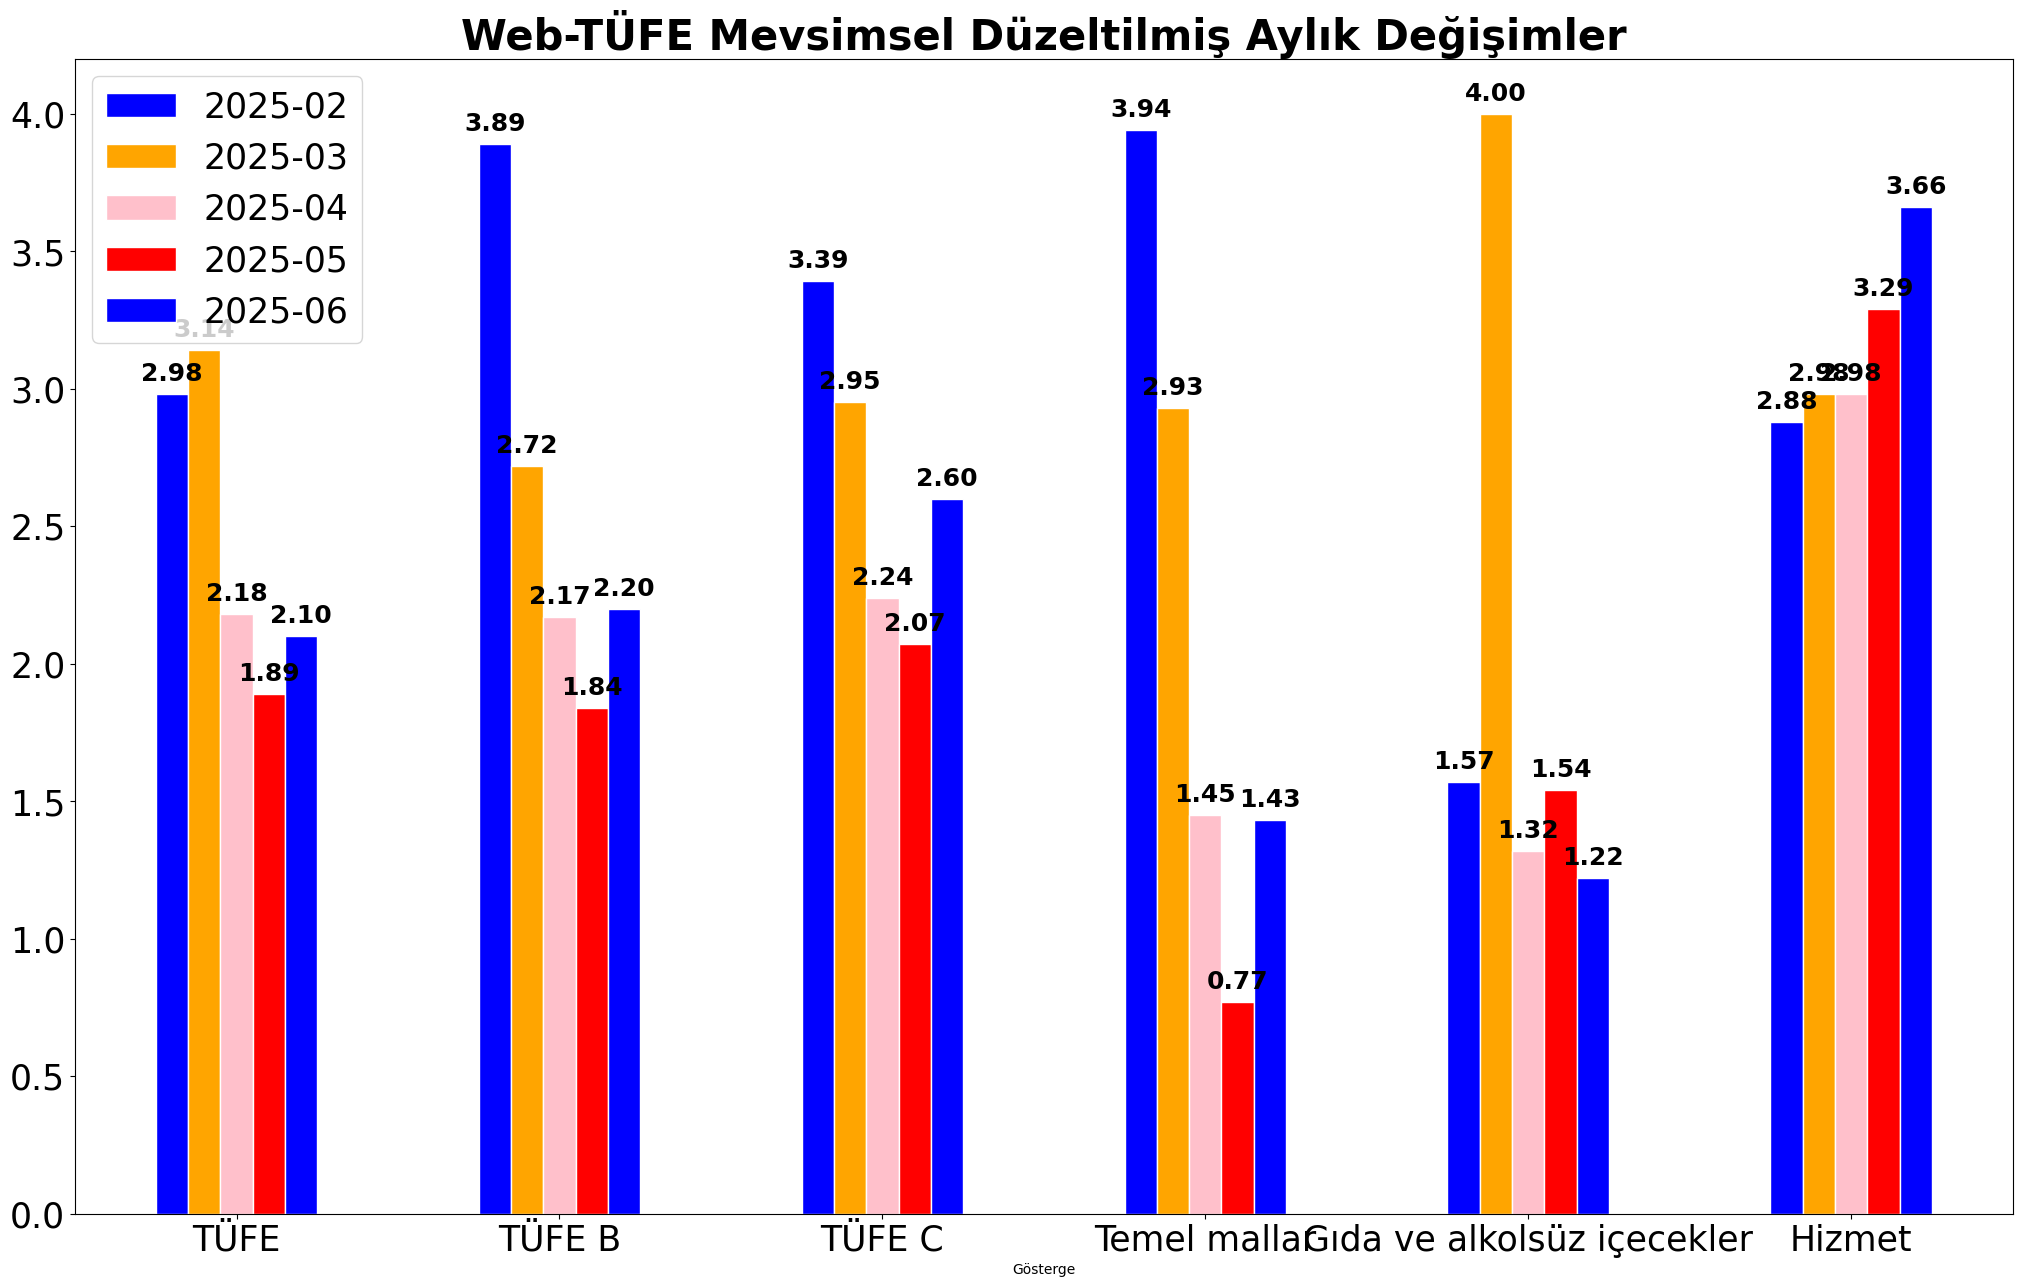

In [45]:
import matplotlib.pyplot as plt

ax = ma.loc[["TÜFE","TÜFE B","TÜFE C", "Temel mallar", "Gıda ve alkolsüz içecekler", "Hizmet"]].plot(
    kind="bar",
    figsize=(25, 15),
    color=["blue", "orange", "pink", "red"],
    edgecolor="white",
    linewidth=1,
    fontsize=25
)
ax.set_title(
    "Web-TÜFE Mevsimsel Düzeltilmiş Aylık Değişimler",
    fontsize=30,  # İstediğin büyüklük
    fontweight="bold"  # İstersen başlığı da kalın yaparız
)
plt.xticks(fontsize=25, rotation=0)
plt.legend(fontsize=25)
# Barların üstüne değerleri bold şekilde yaz
for container in ax.containers:
    ax.bar_label(
        container, 
        labels=[f"{v:.2f}" for v in container.datavalues],  # İstersen sadece `f"{v:.2f}"` yazmayabilirsin
        label_type='edge',
        padding=6,
        fontsize=18,
        fontweight='bold'
    )

plt.show()


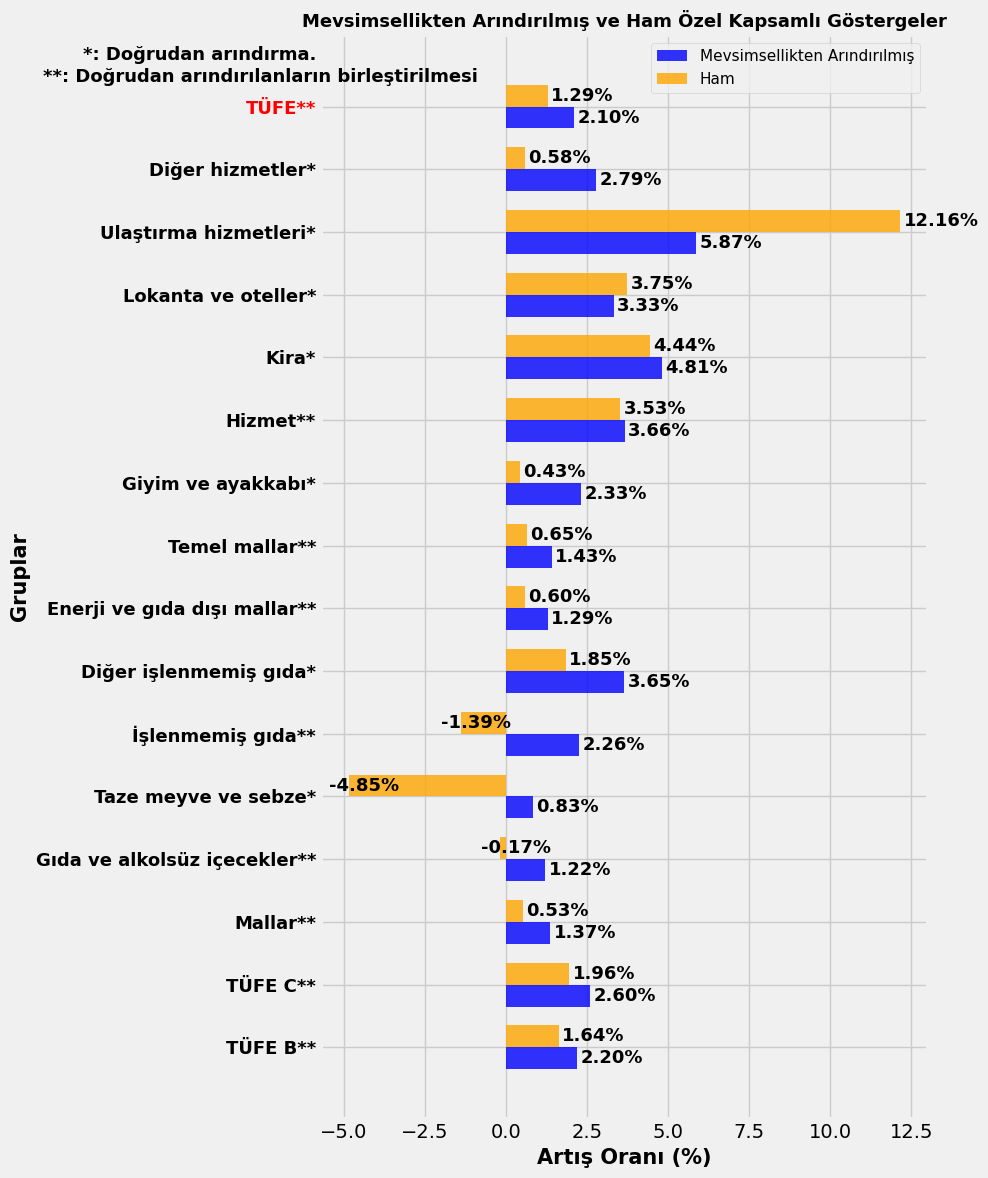

In [63]:
plt.style.use("fivethirtyeight")

index_labels = [
    f"{i}**" if i in ["Mallar", "Temel mallar","Enerji ve gıda dışı mallar","Gıda ve alkolsüz içecekler","İşlenmemiş gıda","Hizmet","TÜFE","TÜFE B","TÜFE C"]
    else f"{i}*" if i in ["Lokanta ve oteller", "Kira", "Diğer hizmetler", "Ulaştırma hizmetleri", "Diğer işlenmemiş gıda", "Taze meyve ve sebze", "Giyim ve ayakkabı"]
    else i
    for i in ham_ma.index
]
colors = ['red' if label == 'TÜFE**' else 'blue' for label in ham_ma.index]

text_colors_mevsim = ["red" if label == "TÜFE**" else "black" for label in index_labels]
text_colors_ham = ["red" if label == "TÜFE**" else "black" for label in index_labels]

# İlk 42 karakteri almak için index etiketlerini kısaltma
shortened_index = [label[:42] for label in ham_ma.index]
y_tick_colors = ["red" if "TÜFE**" in label else "black" for label in index_labels]

# Yatay çubuk grafiği
fig, ax = plt.subplots(figsize=(10, 12))
bar_width = 0.35  # Çubuk genişliği

# Çubukların yerleşimi
y = np.arange(len(index_labels))  # Y ekseni konumları

bars2 = ax.barh(
    y - bar_width / 2, 
    ham_ma["MA"].values,  # Mevsimsellikten Arındırılmış Veriler
    bar_width, 
    label="Mevsimsellikten Arındırılmış",
    alpha=0.8,
    color="blue"
)

bars1 = ax.barh(
    y + bar_width / 2, 
    ham_ma["Ham"].values,  # Ham Veriler
    bar_width, 
    label="Ham",
    alpha=0.8,
    color="orange"
)

# Çubukların üstüne etiket ekleme
for bar, value in zip(bars2, ham_ma["MA"]):
    if value<0:
        ax.text(
        bar.get_width() -0.6,  # Çubuğun sağ tarafına biraz boşluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )
    else:
        ax.text(
        bar.get_width() + 0.1,  # Çubuğun sağ tarafına biraz boşluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )

for bar, value in zip(bars1, ham_ma["Ham"]):
    
    if value<0:
        ax.text(
        bar.get_width() -0.6,  # Çubuğun sağ tarafına biraz boşluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )
    else:
        ax.text(
        bar.get_width() + 0.1,  # Çubuğun sağ tarafına biraz boşluk ekle
        bar.get_y() + bar.get_height() / 2, 
        f"{value:.2f}%", 
        va='center', 
        ha='left', 
        fontweight='bold',
        fontsize=13
    )

# Başlık ve etiketler

ax.set_title(
    f"Mevsimsellikten Arındırılmış ve Ham Özel Kapsamlı Göstergeler", 
    fontsize=13, 
    fontweight='bold'
)
ax.set_ylabel("Gruplar", fontsize=15, fontweight='bold')
ax.set_xlabel("Artış Oranı (%)", fontsize=15, fontweight='bold')

# Y ekseni etiketleri ayarı
ax.set_yticks(y)
ax.set_yticklabels(index_labels)  # Y ekseni etiketleri

# TÜFE için özel renk ve tüm etiketler için bold ve küçük boyutlu font
y_tick_colors = ["red" if label == "TÜFE**" else "black" for label in index_labels]
for tick_label, color in zip(ax.get_yticklabels(), y_tick_colors):
    tick_label.set_color(color)  # Renk değişikliği
    tick_label.set_fontweight('bold')  # Kalın yazı tipi
    tick_label.set_fontsize(13)  # Yazı boyutunu küçült

ax.text(
    -0.2, 0.99, 
    "*: Doğrudan arındırma.", 
    fontsize=13,
    fontweight="bold" ,
    ha='center', 
    va='top', 
    transform=ax.transAxes
)
ax.text(
    -0.1, 0.97, 
    "**: Doğrudan arındırılanların birleştirilmesi", 
    fontsize=13,
    fontweight="bold" ,
    ha='center', 
    va='top', 
    transform=ax.transAxes
)

# Efsane ve düzenleme
ax.legend(loc=0,fontsize=11)
plt.tight_layout()
plt.savefig("maözelgöstergelernisan.png")
plt.show()


In [ ]:

maddelerim=endeksler.T
maddelerim=maddelerim.reset_index()
maddelerim=maddelerim.rename(columns={"index":"Madde"})

In [ ]:

def hareketli_aylik_ortalama(df):
        değer = df.name  # Kolon ismi
        df = pd.DataFrame(df)
        df["Tarih"] = pd.to_datetime(df.index)  # Tarih sütununu datetime formatına çevir
        df["Gün Sırası"] = df.groupby(df["Tarih"].dt.to_period("M")).cumcount() + 1  # Her ay için gün sırasını oluştur
        
        # Her ay için ilk 24 günü sınırla ve hareketli ortalama hesapla
        df["Aylık Ortalama"] = (
            df[df["Gün Sırası"] <= 24]
            .groupby(df["Tarih"].dt.to_period("M"))[değer]
            .expanding()
            .mean()
            .reset_index(level=0, drop=True)
        )
        
        # Orijinal indeksi geri yükle
        df.index = pd.to_datetime(df.index)
        return df

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Çizgi grafikleri ve scatterlar
plt.plot(gıda.loc["İşlenmiş Gıda"], label="İşlenmiş gıda")
plt.scatter(x=gıda.columns, y=gıda.loc["İşlenmiş Gıda"], color="black", zorder=3, s=50)

plt.plot(gıda.loc["İşlenmemiş gıda"], label="İşlenmemiş gıda")
plt.scatter(x=gıda.columns, y=gıda.loc["İşlenmemiş gıda"], color="black", zorder=3, s=50)

# Bar grafiği
bar_values = gıda.loc["Gıda ve alkolsüz içecekler"]
bars = plt.bar(x=gıda.columns, height=bar_values, color="gray", label="Gıda ve alkolsüz içecekler")

# Barların üzerine bold text olarak değerleri yaz
for i, value in enumerate(bar_values):
    plt.text(gıda.columns[i], value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontweight='bold')

# Diğer ayarlar
plt.legend()
plt.xticks(gıda.columns, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Çizgi grafikleri ve scatterlar
plt.plot(gıda.loc["Taze meyve ve sebze"], label="Taze meyve ve sebze")
plt.scatter(x=gıda.columns, y=gıda.loc["Taze meyve ve sebze"], color="black", zorder=3, s=50)

plt.plot(gıda.loc["Diğer işlenmemiş gıda"], label="Diğer işlenmemiş gıda")
plt.scatter(x=gıda.columns, y=gıda.loc["Diğer işlenmemiş gıda"], color="black", zorder=3, s=50)

# Bar grafiği
bar_values = gıda.loc["İşlenmemiş gıda"]
bars = plt.bar(x=gıda.columns, height=bar_values, color="gray", label="İşlenmemiş gıda")

# Barların üzerine bold text olarak değerleri yaz
for i, value in enumerate(bar_values):
    plt.text(gıda.columns[i], value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontweight='bold')

# Diğer ayarlar
plt.legend()
plt.xticks(gıda.columns, rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
gıda=pd.DataFrame(columns=["Taze meyve ve sebze","Diğer işlenmemiş gıda","İşlenmemiş gıda","İşlenmiş Gıda","Gıda ve alkolsüz içecekler"])
for col in gıda.columns:
    gıda[col]=hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100
gıda.index=pd.to_datetime(gıda.index).strftime("%Y-%m")
gıda.loc["2024-11"]=[9.08,4.54,6.8,1.92,3.94]
gıda.loc["2024-12"]=[7.3,2.92,5.08,2.12,3.37]
gıda.loc["2025-01"]=[6.14,3.24,4.71,2.44,3.41]
gıda=gıda.sort_index()
gıda = gıda.T  # Transpose: kategoriler x eksenine gelecek
gıda=gıda.iloc[:,[-2,-1]]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("fivethirtyeight")

# Grafik çizimi
fig, ax = plt.subplots(figsize=(25, 15))

kategoriler = gıda.index
aylar = gıda.columns
x = np.arange(len(kategoriler))
width = 0.2

# Her ay için bar çizimi
for i, ay in enumerate(aylar):
    values = gıda[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar üstüne kalın text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.05 if height >= 0 else height - 0.1,
            f"{height:.2f}",
            ha='center',
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
            fontsize=30
        )

# Eksen ve etiket ayarları
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0,fontsize=25)
ax.tick_params(axis='y', labelsize=25)  # Y ekseni sayılarına font büyüklüğü

ax.set_ylabel("Yüzde Değişim",fontsize=25)
ax.set_title("Gıda Kategorilerinin Aylık Değişimi",fontsize=30)
ax.legend(title="Ay",fontsize=25, title_fontsize=25)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veriyi oluştur
ma = pd.DataFrame(columns=["2025-02","2025-03","2025-04","2025-05"])
ma.loc["TÜFE (m.a)"] = (tüfema.loc["2025-02":]).values

ma=ma.T

# Grafik çizimi
fig, ax = plt.subplots(figsize=(6, 6))

kategoriler = ma.index
aylar = ma.columns
x = np.arange(len(kategoriler))
width = 0.75

# Her ay için bar çizimi
for i, ay in enumerate(aylar):
    values = ma[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar üstüne kalın text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01 if height >= 0 else height - 0.01,
            f"{height:.2f}",
            ha='center',
            fontsize=16,
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
        )

# Eksen ve etiket ayarları
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0)
ax.set_ylabel("Yüzde Değişim")
ax.legend(loc=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veriyi oluştur
bc = pd.DataFrame(columns=["2025-02","2025-03","2025-04","2025-05"])
bc.loc["B (m.a)"] = tüfeb_ma.loc["2025-02":].values
bc.loc["C (m.a)"] = tüfec_ma.loc["2025-02":].values
bc=bc.T

# Grafik çizimi
fig, ax = plt.subplots(figsize=(6, 6))

kategoriler = bc.index
aylar = bc.columns
x = np.arange(len(kategoriler))
width = 0.3

# Her ay için bar çizimi
for i, ay in enumerate(aylar):
    values = bc[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar üstüne kalın text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01 if height >= 0 else height - 0.05,
            f"{height:.2f}",
            ha='center',
            fontsize=14,
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
        )

# Eksen ve etiket ayarları
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0)
ax.set_ylabel("Yüzde Değişim")
ax.legend(loc=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
gıda=pd.DataFrame(columns=["Taze meyve ve sebze","Diğer işlenmemiş gıda","İşlenmemiş gıda","İşlenmiş Gıda","Gıda ve alkolsüz içecekler"])
for col in gıda.columns:
    gıda[col]=hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100
gıda.index=pd.to_datetime(gıda.index).strftime("%Y-%m")
gıda.loc["2024-11"]=[9.08,4.54,6.8,1.92,3.94]
gıda.loc["2024-12"]=[7.3,2.92,5.08,2.12,3.37]
gıda.loc["2025-01"]=[6.14,3.24,4.71,2.44,3.41]
gıda=gıda.sort_index()
gıda = gıda.T  # Transpose: kategoriler x eksenine gelecek


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veriyi oluştur
hiz = pd.DataFrame(columns=["2025-04","2025-05"])
hiz.loc["Hizmet (m.a)"] = hizmetma.loc["2025-04":].values
hiz.loc["Temel mallar (m.a)"] = temelmalma.loc["2025-04":].values
hiz.loc["İşlenmiş gıda"] = gıda.loc["İşlenmiş Gıda"].values[-2:]

# Grafik çizimi
fig, ax = plt.subplots(figsize=(6, 6))

kategoriler = hiz.index
aylar = hiz.columns
x = np.arange(len(kategoriler))
width = 0.3

# Her ay için bar çizimi
for i, ay in enumerate(aylar):
    values = hiz[ay].values
    bar_positions = x + (i - len(aylar)/2) * width + width/2
    bars = ax.bar(bar_positions, values, width, label=ay)

    # Bar üstüne kalın text
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01 if height >= 0 else height - 0.01,
            f"{height:.2f}",
            ha='center',
            fontsize=16,
            va='bottom' if height >= 0 else 'top',
            fontweight='bold',
        )

# Eksen ve etiket ayarları
ax.set_xticks(x)
ax.set_xticklabels(kategoriler, rotation=0)
ax.set_ylabel("Yüzde Değişim")
ax.legend(loc=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
from datetime import datetime,timedelta
import pytz
from dateutil.relativedelta import relativedelta
tüfe=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/tüfe.csv",index_col=0)
tüfe.index=pd.to_datetime(tüfe.index)

gruplar=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/gruplar_int.csv",index_col=0)
gruplar.index=pd.to_datetime(gruplar.index)
gruplar["TÜFE"]=tüfe["TÜFE"]
gruplar.to_csv("C:/Users/Bora/Documents/GitHub/web-tufe-streamlit/gruplar_int.csv")

gfe1=tüfe.copy()
gfe1["Date"]=pd.to_datetime(gfe1.index)
gfe1["Ay"]=gfe1["Date"].dt.month
gfe1["Yıl"]=gfe1["Date"].dt.year    
month = gfe1["Ay"].iloc[-1]
year=gfe1["Yıl"].iloc[-1] 
oncekiyear=gfe1["Yıl"].iloc[-1] 
tarihim=pd.to_datetime(gfe1.index[-1]).day
if tarihim>24:
    tarihim=24
if tarihim<10:
    tarihim="0"+str(tarihim)

from datetime import datetime,timedelta
tarih=datetime.now().strftime("%Y-%m")
onceki=(datetime.now()-relativedelta(months=1)).strftime("%Y-%m")

harcama_artıs=pd.Series(index=gruplar.columns)
for col in gruplar.columns:
    harcama_artıs.loc[col]=(((hareketli_aylik_ortalama(gruplar[col])["Aylık Ortalama"].fillna(method="ffill").iloc[-1]/hareketli_aylik_ortalama(gruplar[col])["Aylık Ortalama"].fillna(method="ffill").loc[f"{onceki}-21"])-1)*100)
harcama_artıs=harcama_artıs.sort_values()

colors = ['red' if label == 'TÜFE' else 'blue' for label in harcama_artıs.index]

# İlk 42 karakteri almak için index etiketlerini kısaltma
shortened_index = [label[:42] for label in harcama_artıs.index]



colors = ['red' if label == 'TÜFE' else 'blue' for label in harcama_artıs.keys()]
shortened_index = [label[:42] for label in harcama_artıs.keys()]
values = list(harcama_artıs)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=20,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.3')
    )

# FiveThirtyEight tarzı ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planı
fig.patch.set_facecolor('white')  # Dış çerçeve arka planı
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Başlık ve eksen ayarları
ax.set_title(f'Web-TÜFE Ana Gruplar Haziran Ayı Artış Oranları', fontsize=20, fontweight='bold', loc='center', pad=20)
ax.set_xlabel('Artış Oranı (%)', fontsize=20, fontweight='bold')
ax.set_ylabel('Grup', fontsize=20, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Filigran ekleme
fig.text(0.55, 0.93, 'Geliştirici: Bora Kaya', ha='center', va='center', fontsize=20, color='black', alpha=0.7, rotation=0)

# Çubuklar arasındaki boşluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()
plt.savefig("anagruplar.png", dpi=300)

plt.show()



In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.plot(tüfe.loc[:"2025-06-24"],label="Web TÜFE",linewidth=6)
plt.plot(özelgöstergeler["TÜFE B"].loc[:"2025-06-24"],label="B",linewidth=5)
plt.plot(özelgöstergeler["TÜFE C"].loc[:"2025-06-24"],label="C",linewidth=5)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(rotation=45,fontsize=16)
plt.savefig("tüfe.png", dpi=300)

In [ ]:
özelgöstergeler.loc[pd.to_datetime("2024-12-31")]=100
özelgöstergeler=özelgöstergeler.sort_index()
plt.figure(figsize=(12,8))
plt.title("Web-TÜFE Özel Kapsamlı Göstergeler")

plt.plot(özelgöstergeler["Hizmet"].loc[:"2025-05-24"],label="Hizmet",linewidth=4)
plt.plot(özelgöstergeler["Enerji"].loc[:"2025-05-24"],label="Enerji",linewidth=4)
plt.plot(özelgöstergeler["Temel mallar"].loc[:"2025-05-24"],label="Temel mallar",linewidth=4)
plt.plot(özelgöstergeler["Gıda ve alkolsüz içecekler"].loc[:"2025-05-24"],label="Gıda ve alkolsüz içecekler",linewidth=4)

plt.legend()
plt.grid(True)
plt.xticks(özelgöstergeler.loc[:"2025-05-24"].index[::10],rotation=45)
plt.tight_layout()
plt.savefig("özelgöstergeler_nisan.png", dpi=300)

In [ ]:
tarih="2025-06"
onceki="2025-05"

In [ ]:
harcama_grupları=harcama_grupları.sort_index()
veri=pd.concat([(((harcama_grupları.loc[f"{tarih}"].mean()/harcama_grupları.loc[f"{onceki}":f"{onceki}-05"].mean())-1)*100).sort_values().head(5),(((harcama_grupları.loc[f"{tarih}"].mean()/harcama_grupları.loc[f"{onceki}":f"{onceki}-05"].mean())-1)*100).sort_values().tail(19)],axis=0)
veri.loc["Web-TÜFE"]=(((tüfe.loc[f"{tarih}"].mean()/tüfe.loc[f"{onceki}":f"{onceki}-05"].mean())-1)*100).values[0]
veri=veri.sort_values()

colors = ['red' if label == 'Web-TÜFE' else 'blue' for label in veri.index]

# İlk 42 karakteri almak için index etiketlerini kısaltma
shortened_index = [label[:100] for label in veri.index]



shortened_index = [label[:100] for label in veri.keys()]
values = list(veri)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +3,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.3')
    )

# FiveThirtyEight tarzı ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planı
fig.patch.set_facecolor('white')  # Dış çerçeve arka planı
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Başlık ve eksen ayarları
ax.set_title(f'Web-TÜFE En Çok Değişim Yaşanan Temel Başlıklar', fontsize=12, fontweight='bold', loc='center', pad=12)
ax.set_xlabel('Artış Oranı (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Grup', fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Filigran ekleme
fig.text(0.7, 0.93, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', va='center', fontsize=12, color='black', alpha=0.7, rotation=0)

# Çubuklar arasındaki boşluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()

plt.savefig("temelbaşlıklar_nisan.png", dpi=300)



In [ ]:
endeksler.index=pd.to_datetime(endeksler.index)

In [ ]:
endeksler=endeksler.sort_index()
veri=pd.concat([(((endeksler.loc[f"{tarih}":f"{tarih}-24"].mean()/endeksler.loc[f"{onceki}":f"{onceki}-15"].mean())-1)*100).sort_values().head(15),(((endeksler.loc[f"{tarih}":f"{tarih}-24"].mean()/endeksler.loc[f"{onceki}":f"{onceki}-15"].mean())-1)*100).sort_values().tail(15)],axis=0)
veri.loc["Web-TÜFE"]=(((tüfe.loc[f"{tarih}":f"{tarih}-24"].mean()/tüfe.loc[f"{onceki}":f"{onceki}-15"].mean())-1)*100).values[0]
veri=veri.sort_values()

colors = ['red' if label == 'Web-TÜFE' else 'blue' for label in veri.index]

# İlk 42 karakteri almak için index etiketlerini kısaltma
shortened_index = [label[:100] for label in veri.index]



shortened_index = [label[:100] for label in veri.keys()]
values = list(veri)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +1,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.1')
    )

# FiveThirtyEight tarzı ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planı
fig.patch.set_facecolor('white')  # Dış çerçeve arka planı
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Başlık ve eksen ayarları
ax.set_title(f'Web-TÜFE En Çok Değişim Yaşanan Maddeler', fontsize=12, fontweight='bold', loc='center', pad=12)
ax.set_xlabel('Artış Oranı (%)', fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Filigran ekleme
fig.text(0.62, 0.93, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', va='center', fontsize=12, color='black', alpha=0.7, rotation=0)

# Çubuklar arasındaki boşluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()

plt.savefig("maddeler_nisan.png", dpi=300)



In [ ]:
özelgöstergeler=özelgöstergeler.sort_index()
veri=pd.concat([(((özelgöstergeler.loc["2025-03":"2025-03-24"].mean()/özelgöstergeler.loc["2025-02-01":"2025-02-24"].mean())-1)*100).sort_values().head(15),(((özelgöstergeler.loc["2025-03":"2025-03-24"].mean()/özelgöstergeler.loc["2025-02-01":"2025-02-24"].mean())-1)*100).sort_values().tail(15)],axis=0)
veri.loc["Web-TÜFE"]=(((tüfe.loc["2025-03":"2025-03-24"].mean()/tüfe.loc["2025-02-01":"2025-02-24"].mean())-1)*100).values[0]
veri=veri.sort_values()

colors = ['red' if label == 'Web-TÜFE' else 'blue' for label in veri.index]

# İlk 42 karakteri almak için index etiketlerini kısaltma
shortened_index = [label[:100] for label in veri.index]



shortened_index = [label[:100] for label in veri.keys()]
values = list(veri)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
bars = ax.barh(shortened_index, values, color=colors)

# Etiket ekleme
for bar, value in zip(bars, values):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01 if value >= 0 else xpos +1,
        bar.get_y() + bar.get_height() / 2,
        f'{value:.2f}%',
        va='center',
        ha='left' if value >= 0 else 'right',
        fontsize=12,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.1')
    )

# FiveThirtyEight tarzı ayarlar
ax.set_facecolor('whitesmoke')  # Grafik arka planı
fig.patch.set_facecolor('white')  # Dış çerçeve arka planı
ax.grid(axis='x', color='lightgray', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Başlık ve eksen ayarları
ax.set_title(f'Web-TÜFE Özel Kapsamlı Göstergeler Artış Oranları', fontsize=12, fontweight='bold', loc='center', pad=12)
ax.set_xlabel('Artış Oranı (%)', fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Filigran ekleme
fig.text(0.62, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', va='center', fontsize=12, color='black', alpha=0.7, rotation=0)

# Çubuklar arasındaki boşluk azaltma
plt.subplots_adjust(left=0.35, right=0.95)
plt.tight_layout()

plt.savefig("özelgöstergelerartış.png", dpi=300)



In [ ]:

özelgöstergeler=özelgöstergeler[['Mevsimlik Ürünler Hariç TÜFE', 'TÜFE B', 'TÜFE C', 'TÜFE D','TÜFE E', 'TÜFE F',
       'Mallar', 'Enerji', 'Gıda ve alkolsüz içecekler','İşlenmemiş gıda', 'Taze meyve ve sebze', 'Diğer işlenmemiş gıda',
        'İşlenmiş Gıda',
       'Ekmek ve tahıllar', 'Diğer işlenmiş gıda',
       'Enerji ve gıda dışı mallar', 'Temel mallar', 'Giyim ve ayakkabı',
       'Dayanıklı Mallar (altın hariç)', 'Diğer Temel Mallar',
       'Alkollü içecekler, tütün ve altın', 'Hizmet', 'Kira',
       'Lokanta ve oteller', 'Ulaştırma hizmetleri', 'Haberleşme hizmetleri',
       'Diğer hizmetler', 'TÜFE']]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Genel artış hesaplama fonksiyonu
def artıshesapla(seri, hedef_ay):
    hedef_baslangic = f"{hedef_ay}-01"
    hedef_bitis = f"{hedef_ay}-24"

    # Önceki ayı hesapla
    tarih = pd.to_datetime(hedef_ay + "-01")
    onceki_ay = (tarih - pd.DateOffset(months=1)).strftime("%Y-%m")
    onceki_baslangic = f"{onceki_ay}-01"
    onceki_bitis = f"{onceki_ay}-24"

    if hedef_ay=="2025-06":

        onceki_bitis = "2025-05-21"

    artıs = (((özelgöstergeler.loc[hedef_baslangic:hedef_bitis].mean() /
               özelgöstergeler.loc[onceki_baslangic:onceki_bitis].mean()) - 1) * 100)
    return round(artıs, 2)


# Veriyi tanımlayalım
data = {
    "Şubat 25": artıshesapla(özelgöstergeler, "2025-02"),
    "Mart 25": artıshesapla(özelgöstergeler, "2025-03"),
    "Nisan 25": artıshesapla(özelgöstergeler, "2025-04"),
    "Mayıs 25": artıshesapla(özelgöstergeler, "2025-05"),
    "Haziran 25": artıshesapla(özelgöstergeler, "2025-06"),
  
}

# DataFrame oluştur
df = pd.DataFrame(data)




In [ ]:
son=df.iloc[-1:]
df=df.iloc[:-1]
df=pd.concat([son,df],axis=0)

In [ ]:
hizmet=df.iloc[-6:]
hizmet.columns=["2025-02","2025-03","2025-04","2025-05","2025-06"]
hizmet=hizmet.iloc[:,-3:]
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")
# Gruplu bar grafiği için gerekli ayarlar
fig, ax = plt.subplots(figsize=(12, 8))

# X ekseni için aylar ve kategoriler
months = hizmet.index
categories = hizmet.columns
x = np.arange(len(months))
width = 0.25  # bar genişliği

# Her kategori için bar çizimi
for i, category in enumerate(categories):
    values = hizmet[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama için konum kaydırması
    bars = ax.bar(bar_positions, values, width, label=category)

    # Barların üstüne kalın değer yazımı
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.05 if height >= 0 else height - 0.1,  # negatif değerler için ayar
            f"{height:.2f}",
            fontsize=12,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=30)
ax.set_ylabel("Yüzde Değişim")
ax.set_title("Hizmet Fiyatlarının Aylık Değişimi")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
harcama_grupları=harcama_grupları.drop("2024-12-31",axis=0)

In [ ]:
(((endeksler.loc["2025-05"].mean()/endeksler.loc["2025-04":"2025-04-24"].mean()).sort_values()-1)*100).tail(40)

In [ ]:
# Kategorilere özel seviye belirleme (manuel)
seviye_map = {
    'Mallar': 0,
    'Enerji': 1,
    'Gıda ve alkolsüz içecekler': 1,
    'Taze meyve ve sebze': 3,
    'İşlenmemiş gıda': 2,
    'Diğer işlenmemiş gıda': 3,
    'İşlenmiş Gıda': 2,
    'Ekmek ve tahıllar': 3,
    'Diğer işlenmiş gıda': 3,
    'Enerji ve gıda dışı mallar': 1,
    'Temel mallar': 2,
    'Giyim ve ayakkabı': 3,
    'Dayanıklı Mallar (altın hariç)': 3,
    'Diğer Temel Mallar': 3,
    'Alkollü içecekler, tütün ve altın': 2,
    'Hizmet':0,
    'Kira':2,
    'Lokanta ve oteller':2,
    'Haberleşme hizmetleri':2,
    'Diğer hizmetler':2,
    'Ulaştırma hizmetleri':2
}

# Seviye bilgisi fonksiyonu (manuel harita üzerinden)
def get_level_manual(kategori):
    return seviye_map.get(kategori.strip(), 0)

# Unicode geniş boşlukla girinti (em space)
def get_indent(level):
    return "\u2003" * level  # 'EM SPACE' Unicode karakteri
df["Kategori"]=df.index
df=df.reset_index(drop=True)
# Seviye ve temiz isimleri ekle
df['Kategori_Temiz'] = df['Kategori'].apply(lambda x: x.strip())
df['Seviye'] = df['Kategori_Temiz'].apply(get_level_manual)


In [ ]:
import seaborn as sns
def get_level(text):
    leading_spaces = len(text) - len(text.lstrip())
    if leading_spaces == 0:
        return 0
    elif leading_spaces <= 8:
        return 1
    elif leading_spaces <= 32:
        return 2
    elif leading_spaces <= 35:
        return 3
    else:
        return 4



# Değişim oranlarını hesapla (bps = yüzde puanı × 100)
df['Değişim'] = (df['Haziran 25'] - df['Mayıs 25'])



# Stil ayarları
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_r")

# Figür oluştur
fig, ax = plt.subplots(figsize=(21, 15))

# Tablo başlıkları
column_labels = ['Kategori', 'Mayıs 25 (%)', 'Haziran 25 (%)', 'Değişim(puan)']

table = ax.table(
    cellText=[[''] * len(column_labels)] * len(df),
    colLabels=column_labels,
    loc='center',
    cellLoc='left',
    colWidths=[0.75, 0.1, 0.1, 0.1, 0.12, 0.12]
)

# Tablo ayarları
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 2.5)

# Başlık hücreleri
for i, label in enumerate(column_labels):
    cell = table[0, i]
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('#336699')

# Veri satırları
for i, (_, row) in enumerate(df.iterrows(), 1):
    # Girintili kategori
    indent = '  ' * row['Seviye']
    cell = table[i, 0]
    cell.set_text_props(ha='left', fontweight='normal' if row['Seviye'] > 0 else 'bold')
    cell.set_facecolor('#F0F0F0' if i % 2 == 0 else 'white')
    cell._text.set_text(f"{indent}{row['Kategori_Temiz']}")



    # Yüzde değer hücreleri
    for j, col in enumerate(['Mayıs 25', 'Haziran 25']):
        cell = table[i, j + 1]
        is_nisan = (col == 'Mayıs 25')
        cell.set_text_props(ha='right', fontweight='bold' if is_nisan else 'normal')
        cell.set_facecolor('#F0F0F0' if i % 2 == 0 else 'white')
        cell._text.set_text(f"{row[col]:.2f}")


    # Değişim hücreleri (renkli)
    for j, col in enumerate(['Değişim']):
        val = row[col]
        cell = table[i, j + 3]
        cell.set_text_props(ha='right', color='white' if abs(val) > 30 else 'black')
        
        # Renk belirleme (yeşil = düşüş, kırmızı = artış)
        if val < 0:
            cell_color = "#0fa00d"
        else:
            cell_color = "#b50101"
        
        cell.set_facecolor(cell_color)
        cell._text.set_text(f"{val:+.2f}")

# Tablonun etrafındaki eksenleri gizle
ax.axis('off')

# Kaynak yazısı
plt.figtext(0.02, 0.01, 'Kaynak: Web-TÜFE Verileri, 2025', fontsize=9, fontstyle='italic')

# Yerleşimi ayarla
plt.tight_layout(rect=[0.01, 0.05, 0.99, 0.99])
plt.savefig("özelgöstergelernisan.png")
# Göster
plt.show()


In [ ]:
(özelgöstergeler.iloc[-1]-100).round(2)

In [ ]:
sharpe=endeksler.pct_change().rolling(30).mean().iloc[-1]/endeksler.pct_change().rolling(30).std().iloc[-1]

In [ ]:
zirai3=ürünler[ürünler["Ürün"].isin(["Üzüm","Kuru Üzüm","Elma","Ayçekirdeği","Çay","Kivi","Zeytin","Ayva","Şeftali","Armut","Karpuz","Patates","Portakal","Mandalina","Şeftali","Patates","Karpuz","Portakal","Mandalina","Kabak","Patlıcan","Sivri Biber","Çarliston Biber","Salatalık"])]
zirai3=zirai3.drop_duplicates(subset=["Ürün"])
zirai3=zirai3.groupby("Ürün")["Ağırlık"].sum()/zirai3.groupby("Ürün")["Ağırlık"].sum().sum()
zirai3=(endeksler[zirai3.index]*zirai3).sum(axis=1)
zirai3

In [ ]:
from datetime import datetime
plt.figure(figsize=(20,12))
plt.title("Zirai Dondan Etkilenen Ürünlerin Sepeti",fontsize=30)

plt.plot(zirai3,linewidth=6)
plt.axvspan(datetime(2025,2,21), datetime(2025,2,26), color='yellow', alpha=0.3, label="1.Zirai Don (21-25 Şubat)")
plt.axvspan(datetime(2025,3,21), datetime(2025,3,22), color='yellow', alpha=0.3, label="2.Zirai Don (21-22 Mart)")
plt.axvspan(datetime(2025,4,9), datetime(2025,4,13), color='yellow', alpha=0.3, label="3.Zirai Don (9-13 Nisan)")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(prop={'weight': 'bold',"size":24})

In [ ]:
def aylik_degisim_serisi(ts: pd.Series) -> pd.Series:
        ts = ts.sort_index()
        aylik_degisim = []

        for tarih in ts.index:
            gun = tarih.day
            ay = tarih.month
            yil = tarih.year

            # Bu ay ve geçen ay için veri
            bu_ay = ts[(ts.index.year == yil) & (ts.index.month == ay)]
            if ay == 1:
                onceki_ay = ts[(ts.index.year == yil - 1) & (ts.index.month == 12)]
            else:
                onceki_ay = ts[(ts.index.year == yil) & (ts.index.month == ay - 1)]

            if gun <= 24:
                ort_bu = bu_ay.iloc[:gun].mean()
                ort_onceki = onceki_ay.iloc[:gun].mean()

                if pd.notna(ort_bu) and pd.notna(ort_onceki) and ort_onceki != 0:
                    oran = (ort_bu / ort_onceki) - 1
                    aylik_degisim.append(oran*100)
                else:
                    aylik_degisim.append(None)
            else:
                try:
                    tarih_24 = bu_ay.index[23]
                    oran_24 = aylik_degisim[ts.index.get_loc(tarih_24)]
                    aylik_degisim.append(oran_24)
                except:
                    aylik_degisim.append(None)

        return pd.Series(aylik_degisim[-gun:], index=ts.index[-gun:])

In [ ]:
et=[
       "Dana eti","Kuzu eti"
       ]
w=ürünler[ürünler["Grup"].isin(et)].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(et)].groupby("Grup")["Ağırlık"].sum().sum()
et=pd.DataFrame((harcama_grupları[et]*w).sum(axis=1))

hareketli_aylik_ortalama(et.iloc[:,0])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(et[0])

In [ ]:
beyazesya=[
       'Buzdolabı, derin dondurucu',
        'Çamaşır ve bulaşık makineleri','Klima ve ısıtıcılar','Fırın, ocak ve fırınlı ocak'
       ]
w=ürünler[ürünler["Grup"].isin(beyazesya)].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(beyazesya)].groupby("Grup")["Ağırlık"].sum().sum()
beyazesya=pd.DataFrame((harcama_grupları[beyazesya]*w).sum(axis=1))
hareketli_aylik_ortalama(beyazesya.iloc[:,0])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(beyazesya[0])

In [ ]:
mobilya=['Mutfak mobilyaları', 'Yatak odası mobilyaları','Yemek odası ve oturma odası mobilyaları']
w=ürünler[ürünler["Grup"].isin(mobilya)].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(mobilya)].groupby("Grup")["Ağırlık"].sum().sum()
mobilya=pd.DataFrame((harcama_grupları[mobilya]*w).sum(axis=1))
hareketli_aylik_ortalama(mobilya.iloc[:,0])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(mobilya[0])

In [ ]:
otomobil=[
       'Dizel otomobiller (sıfır km)','Benzinli ve elektrikli otomobiller (sıfır km)'
       ]

w=ürünler[ürünler["Grup"].isin(otomobil)].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(otomobil)].groupby("Grup")["Ağırlık"].sum().sum()
otomobil=pd.DataFrame((harcama_grupları[otomobil]*w).sum(axis=1))
hareketli_aylik_ortalama(otomobil.iloc[:,0])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
aylik_degisim_serisi(otomobil[0])

In [ ]:
ayakkabı=["Benzin","Kadın ayakkabısı","Erkek ayakkabısı"
       ]

w=ürünler[ürünler["Grup"].isin(ayakkabı)].groupby("Grup")["Ağırlık"].sum()/ürünler[ürünler["Grup"].isin(ayakkabı)].groupby("Grup")["Ağırlık"].sum().sum()
ayakkabı=pd.DataFrame((harcama_grupları[ayakkabı]*w).sum(axis=1))
hareketli_aylik_ortalama(ayakkabı.iloc[:,0])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
df=pd.DataFrame(columns=harcama_grupları.columns)
for col in df.columns:
    df[col]=(hareketli_aylik_ortalama(harcama_grupları[col]))["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100

In [ ]:
df=df.loc["2025-02":]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Örnek veri

# Boxplot çizimi
plt.boxplot(df.T, whis=[0, 100])  # whisker uçları min ve max değerlerde
plt.xticks(ticks=np.arange(1, len(df.index) + 1),labels=df.index.strftime("%Y-%m"))
plt.title("Box-Whisker Grafiği")
plt.ylabel("Değer")
plt.grid(True)
plt.show()


In [ ]:
enerji=["Elektrik","Doğalgaz ve ilgili abonelik ücretleri","Tüpgaz (ev tüpü)","Katı yakıtlar (odun, kömür)",
                 "Kişisel ulaştırma araçlarının yakıt ve yağları (benzin, motorin, motor yağı)","Su (şebeke suyu)"
       ]
enerji=ürünler[ürünler["Grup"].isin(enerji)].drop_duplicates()
enerji["Ağırlık"]=enerji["Ağırlık"]/enerji["Ağırlık"].sum()
enerji=enerji.drop_duplicates()
enerji.groupby("Grup")["Ağırlık"].sum()

In [ ]:
ağırlıklar=pd.read_csv("ağırlıklartüfe.csv",index_col=0)
ağırlıklar=ağırlıklar.sort_values(by="Ağırlık",ascending=False)
ağırlıklar

In [ ]:
seçilmiş=list(ağırlıklar.index[:30].drop(["Kiracı Tarafından Ödenen Gerçek Kira","Ekmek","Dana Eti","Cep Telefonu Görüşme Ücreti",'Doğalgaz Ücreti', 'Elektrik Ücreti','Tavuk Eti','Kuzu Eti',
       'Ayçiçek Yağı','Çamaşır İçin Temizlik ve Bakım Ürünleri','Beyaz Peynir', "Yumurta","Domates"]).values)
seçilmiş.extend(["Televizyon","Özel İlköğretim Ücreti","Otel Ücreti","No-Frost Buzdolabı","Çamaşır Makinesi","Tüp Gaz Ücreti","Gündelikçi Ücreti","Motorsiklet","Yatak Odası Takımı","Erkek Berberi",
                 "Çorbalar","Spor Ayakkabısı (Erkek için)","Pizzalar","Kadın Berberi","Derin Dondurucu","Elektrikli Süpürge","Bulaşık Makinesi","Spor Ayakkabısı (Kadın için)","Tek Masa","Test Kitapları","Bilgisayar","Yemek Odası Takımı","Yatak (Çift Kişilik)","Sürücü Eğitim Kurs Ücreti","Ankastre Mikrodalga Fırın","Soğuk İçecekler (Servis edilen)","Telefon Onarım Ücreti","Bisiklet","Kaşık, Çatal, Bıçak Takımı (Çelik)","Kuru Temizleme Ücreti","Veteriner Ücreti","Tablet (Bilgisayar)","Ayakkabı Tamiri (Erkek)"])

In [ ]:
from scipy.stats import gmean
sepet=pd.read_csv("C:/Users/Bora/Documents/GitHub/web-tufe/deneme.csv",index_col=0)
fiyatlar=pd.DataFrame()
fiyatlar["Madde"]=seçilmiş
def geometric_mean_log(series):
    # Veriyi logaritma alarak normalize et
    log_series = np.log(series)
    
    # Logaritmaların ortalamasını al ve sonrasında exponansiyelini al
    geo_mean = np.exp(log_series.mean())
    
    return geo_mean
for madde in seçilmiş:
    if isinstance(sepet.loc[madde,"2025-04-01":],pd.Series):
        fiyatlar.loc[fiyatlar["Madde"]==madde,"Fiyat"]=sepet.loc[madde,"2025-04-01":].mean()
    else:
        fiyatlar.loc[fiyatlar["Madde"]==madde,"Fiyat"]=sepet.loc[madde,"2025-04-01":].apply(geometric_mean_log,axis=0).mean()

In [ ]:

fiyatlar["Fiyat"]=fiyatlar["Fiyat"].round(2)
fiyatlar

In [ ]:
fiyatlar=fiyatlar.sort_values(by="Fiyat",ascending=True)


In [ ]:
import matplotlib.pyplot as plt

# Veri örneği (fiyatlar yerine gerçek verinizi kullanmalısınız)
# fiyatlar = ...

# Tabloyu 2 parçaya bölelim
half = len(fiyatlar) // 2

# Grafik ve eksenleri oluştur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))  # Yan yana 2 alt grafik

# İlk yarı
ax1.axis('off')  # Eksenleri kapat
table1 = ax1.table(cellText=fiyatlar.iloc[:half].values, colLabels=fiyatlar.columns, loc='center', cellLoc='center', colColours=["#f5f5f5"]*2)

for (i, j), cell in table1.get_celld().items():
    if i == 0:
        cell.set_fontsize(18)
        cell.set_text_props(weight='bold')
    else:
        cell.set_fontsize(18)
    if j == 0:
        cell.set_edgecolor('black')
    else:
        cell.set_edgecolor('gray')
    cell.set_height(0.05)

# İkinci yarı
ax2.axis('off')  # Eksenleri kapat
table2 = ax2.table(cellText=fiyatlar.iloc[half:].values, colLabels=fiyatlar.columns, loc='center', cellLoc='center', colColours=["#f5f5f5"]*2)

for (i, j), cell in table2.get_celld().items():
    if i == 0:
        cell.set_fontsize(18)
        cell.set_text_props(weight='bold')
    else:
        cell.set_fontsize(18)
    if j == 0:
        cell.set_edgecolor('black')
    else:
        cell.set_edgecolor('gray')
    cell.set_height(0.05)

# Grafik göster
plt.savefig("fiyatlar.png", dpi=300)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Ev eşyası"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.15, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Lokanta ve oteller"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Ürün"].unique()

artıslar = (((endeksler[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              endeksler[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(20, 15))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.2, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)


plt.tight_layout()
plt.savefig(f"{ana}nisan.png", dpi=300)

# 🔹 Kayıt
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Eğitim"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(20, 15))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.2, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Eğlence ve kültür"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.2, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Giyim ve ayakkabı"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.2, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Gıda ve alkolsüz içecekler"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-12"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-12"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.15, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Haberleşme"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Ürün"].unique()

artıslar = (((endeksler[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              endeksler[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(20, 15))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Maddeleri Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.15, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
harcama_grupları=harcama_grupları.round(2)
endeksler=endeksler.round(2)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Konut"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.1, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Ulaştırma"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.1, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Stil ayarları (senin gibi bir tema oluşturabiliriz!)
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# 🔹 Verileri hazırla
harcamaürünleri = pd.read_csv("harcamaürünleri1.csv", index_col=0)
ana = "Çeşitli mal ve hizmetler"
grup = harcamaürünleri[harcamaürünleri["Ana Grup"] == ana]["Grup"].unique()

artıslar = (((harcama_grupları[grup].loc[f"{tarih}":f"{tarih}-24"].mean() /
              harcama_grupları[grup].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100).sort_values()

# Ana grup artışı da eklensin
artıslar.loc[ana] = (((gruplar[ana].loc[f"{tarih}":f"{tarih}-24"].mean() /
                       gruplar[ana].loc[f"{onceki}":f"{onceki}-24"].mean()) - 1) * 100)

artıslar = artıslar.sort_values(ascending=False)

# 🔹 Renkler
colors = ['crimson' if label == ana else 'navy' for label in artıslar.index]

# 🔹 Etiketleri kısalt
shortened_index = [
    label.split('(')[0] if '(' in label else label[:60]
    for label in artıslar.index
]

values = list(artıslar)
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_style({"axes.edgecolor": "#0A1931", "axes.linewidth": 1.5})
sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="muted",
    rc={"axes.edgecolor": "#1a1a1a", "axes.linewidth": 1.5}
)
# 🔹 Seaborn ile çizim
fig, ax = plt.subplots(figsize=(25, 20))

bars = sns.barplot(
    x=values,
    y=shortened_index,
    palette=colors,
    ax=ax
)

# 🔹 Etiket ekleme
for i, (bar, value) in enumerate(zip(ax.patches, values)):
    xpos = bar.get_width()
    ax.text(
        xpos + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=24,
        fontweight="bold",
        color="black",
        bbox=dict(facecolor="lightgray", edgecolor="black", boxstyle="round,pad=0.1")
    )

# 🔹 Stil ve başlık
ax.set_title(f"{ana} Grubu Alt Kalemlerin Artış Oranları", fontsize=24, fontweight="bold", pad=20)
ax.set_xlabel("Artış Oranı (%)", fontsize=24, weight="bold")
ax.set_ylabel("")  # y ekseni etiketi gereksiz
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

# 🔹 Arka plan ve grid
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
ax.grid(True, axis="x", linestyle="--", linewidth=0.6, color="gray")
ax.set_axisbelow(True)

# 🔹 Filigran
fig.text(0.15, 0.95, 'Geliştirici: Bora Kaya (@mborathe)', ha='center', fontsize=24, alpha=0.6)

# 🔹 Kenar boşlukları
plt.tight_layout()
plt.subplots_adjust(left=0.35)

# 🔹 Kayıt
plt.savefig(f"{ana}nisan.png", dpi=300)
plt.show()


In [64]:
data=pd.read_excel("D:/Enflasyon-SATRIM/harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[1:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop(1,axis=0)
data=data.drop(2,axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))

ağırlık=pd.read_excel("D:/Enflasyon-SATRIM/tuketici fiyat endeksi ana grup ve temel baslik agirliklari2025.xls")


ağırlık=ağırlık.iloc[:,[0,1,3]]
ağırlık=ağırlık.dropna()
ağırlık=ağırlık.iloc[1:]
ağırlık.columns=["Kod","Madde","Ağırlık"]
data=data[ağırlık["Kod"].values]
data.columns=ağırlık["Madde"].values
data=data[harcama_grupları.columns].loc["2016-12-31":]
data.loc[pd.to_datetime("2025-02-28")]=(harcama_grupları.loc["2025-02":"2025-02-24"].mean()/harcama_grupları.loc["2025-01-01":"2025-01-24"].mean())*data.loc[pd.to_datetime("2025-01-31")]
data.loc[pd.to_datetime("2025-03-31")]=(harcama_grupları.loc["2025-03":"2025-03-24"].mean()/harcama_grupları.loc["2025-02-01":"2025-02-24"].mean())*data.loc[pd.to_datetime("2025-02-28")]
data.loc[pd.to_datetime("2025-04-30")]=(harcama_grupları.loc["2025-04":"2025-04-24"].mean()/harcama_grupları.loc["2025-03-01":"2025-03-24"].mean())*data.loc[pd.to_datetime("2025-03-31")]
data.loc[pd.to_datetime("2025-05-31")]=(harcama_grupları.loc["2025-05":"2025-05-24"].mean()/harcama_grupları.loc["2025-04-01":"2025-04-24"].mean())*data.loc[pd.to_datetime("2025-04-30")]
data.loc[pd.to_datetime("2025-06-30")]=(harcama_grupları.loc["2025-06":"2025-06-24"].mean()/harcama_grupları.loc["2025-05-01":"2025-05-22"].mean())*data.loc[pd.to_datetime("2025-05-31")]

data=data.sort_index()
from scipy import interpolate

for col in data.isna().sum().sort_values().index[-2:].values:

    valid_data = data[col].dropna()

    # x (geçerli tarihlerin indeksleri) ve y (geçerli değerler) verilerini alıyoruz
    x = np.array((valid_data.index - valid_data.index.min()).days)  # Gün cinsinden
    y = valid_data.values

    # Lineer interpolasyon fonksiyonu oluşturuyoruz
    interp_func = interpolate.interp1d(x, y, fill_value='extrapolate')

    # Tüm tarihleri kullanarak NaN değerlerini dolduruyoruz
    all_x = np.array((data[col].index - valid_data.index.min()).days)  # Tüm tarihlerin gün cinsinden indeksleri
    data[col] = interp_func(all_x)

In [65]:
import os
import random
import numpy as np
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)



# Set the path to the X13-ARIMA executable
x13_path = r'C:\Users\Bora\Desktop\x13as'
spec = """
outlier {
    method = addone;
    types = ao tc ls;
}
"""


datasam = pd.DataFrame()
for col in data.columns:
    try:
            ayris = x13_arima_analysis(data[col], x12path=x13_path,outlier=False)
            datasam[col] = ayris.seasadj
    except Exception as e:
            datasam[col] = data[col]



In [66]:
medyan=datasam.pct_change().median(axis=1)*100

In [68]:
harcamaürünleri=pd.read_csv("harcamaürünleri1.csv",index_col=0)
harcamaürünleri

,Ürün,Grup,Ağırlık,Group_Number,Ana Grup
0,Ampul,"Çeşitli küçük aksesuarlar (pil, ampul vb.)",0.000748,75,Ev eşyası
1,Ankastre Fırın,"Fırın, ocak ve fırınlı ocak",0.000305,67,Ev eşyası
2,Ankastre Mikrodalga Fırın,"Fırın, ocak ve fırınlı ocak",0.000819,67,Ev eşyası
3,Ankastre Ocak (Set Üstü),"Fırın, ocak ve fırınlı ocak",0.000582,67,Ev eşyası
4,Antep Fıstığı,Kuru meyve ve sert kabuklu yemişler,0.000523,22,Gıda ve alkolsüz içecekler
...,...,...,...,...,...
332,Şarap,Şarap,0.000284,39,Alkollü içecekler ve tütün
333,Şeftali,Taze meyveler,0.000956,21,Gıda ve alkolsüz içecekler
334,Şehirlerarası Otobüs Ücreti,Karayolu ile şehirler arası yolcu taşımacılığı,0.004659,101,Ulaştırma
335,Şehriye,Makarna çeşitleri,0.000395,5,Gıda ve alkolsüz içecekler


In [69]:
datasa_aylık=datasam.pct_change().loc["2025-02":]*100
satrim=[]
for row in datasa_aylık.index:
    ay=datasa_aylık.loc[row]
    ay=ay.sort_values(ascending=False).iloc[int(len(datasa_aylık.columns)*0.15):int(-len(datasa_aylık.columns)*0.15)]
    ay=ay.sort_index()
    harcamağırlık=harcamaürünleri[harcamaürünleri["Grup"].isin(datasam.columns)].groupby("Grup")["Ağırlık"].sum()/harcamaürünleri[harcamaürünleri["Grup"].isin(datasam.columns)].groupby("Grup")["Ağırlık"].sum().sum()
    harcamağırlık=harcamağırlık.loc[(ay.index.values)]
    harcamağırlık=(harcamağırlık/harcamağırlık.sum())
    satrim.append((np.sum(ay.values*harcamağırlık)))


In [71]:
harcamağırlık=harcamaürünleri[harcamaürünleri["Grup"].isin(datasam.columns)].groupby("Grup")["Ağırlık"].sum()/harcamaürünleri[harcamaürünleri["Grup"].isin(datasam.columns)].groupby("Grup")["Ağırlık"].sum().sum()


In [72]:
eğilim=pd.DataFrame(columns=["TÜFE","B","C","Medyan","SATRIM"])
eğilim["TÜFE"]=tüfe_ma.loc["2025-02":].values
eğilim["B"]=tüfeb_ma.loc["2025-02":].values
eğilim["C"]=tüfec_ma.loc["2025-02":].values
eğilim["Medyan"]=medyan.loc["2025-02":].values
eğilim["SATRIM"]=satrim
eğilim["Ortalama"]=eğilim.mean(axis=1)
eğilim.index=data.loc["2025-02":].index.strftime("%Y-%m")
eğilim

,TÜFE,B,C,Medyan,SATRIM,Ortalama
2025-02,2.979324,3.891435,3.389868,3.023207,3.500605,3.356888
2025-03,3.144222,2.720829,2.953799,3.152216,2.846696,2.963553
2025-04,2.178150,2.174993,2.236443,2.047365,2.305304,2.188451
2025-05,1.889569,1.840632,2.073266,1.957487,2.105607,1.973312
2025-06,2.104600,2.198889,2.597247,1.545193,1.666383,2.022462


In [77]:
temelmallar=pd.DataFrame()
for col in ["Temel mallar","Dayanıklı Mallar (altın hariç)","Giyim ve ayakkabı","Diğer Temel Mallar"]:
    temelmallar=pd.concat([temelmallar,hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100],axis=1)
temelmallar.columns=["Temel mallar","Dayanıklı Mallar","Giyim ve ayakkabı","Diğer Temel Mallar"]
temelmallar=temelmallar.round(2)
temelmallar.index=pd.to_datetime(temelmallar.index).strftime("%Y-%m")
temelmallar=temelmallar.T
temelmallar=temelmallar.iloc[:,[-3,-2,-1]]

In [74]:
gıda=pd.DataFrame()
for col in ['Gıda ve alkolsüz içecekler', 'İşlenmemiş gıda',
       'Taze meyve ve sebze', 'Diğer işlenmemiş gıda', 'İşlenmiş Gıda']:
    gıda=pd.concat([gıda,hareketli_aylik_ortalama(özelgöstergeler[col])["Aylık Ortalama"].fillna(method="ffill").resample("M").last().pct_change().dropna()*100],axis=1)
gıda.columns=['Gıda ve alkolsüz içecekler', 'İşlenmemiş gıda',
       'Taze meyve ve sebze', 'Diğer işlenmemiş gıda', 'İşlenmiş Gıda']
gıda=gıda.round(2)
gıda.index=pd.to_datetime(gıda.index).strftime("%Y-%m")
gıda=gıda.T
gıda=gıda.iloc[:,-3:]

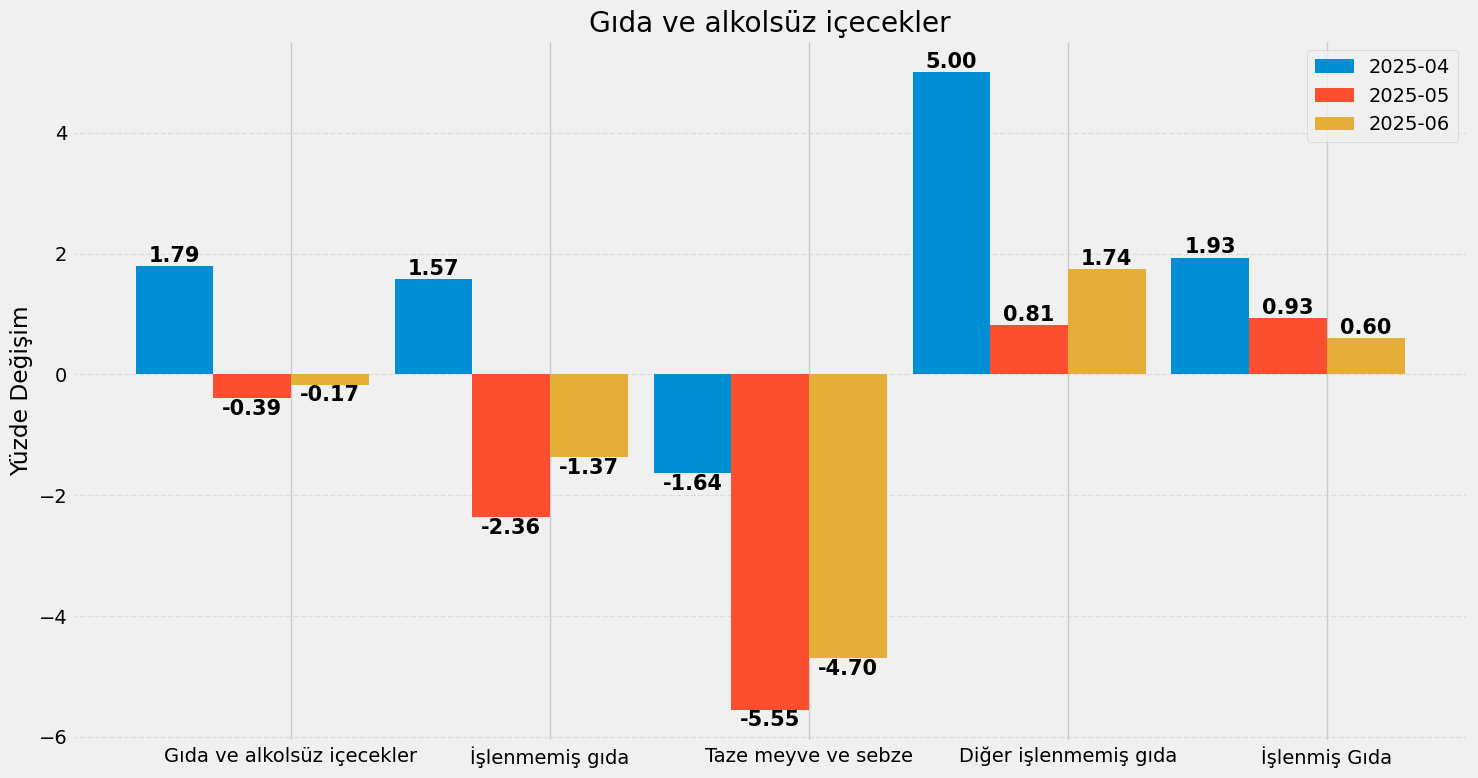

In [75]:

import matplotlib.pyplot as plt
import numpy as np

# Gruplu bar grafiği için gerekli ayarlar
fig, ax = plt.subplots(figsize=(15, 8))

# X ekseni için aylar ve kategoriler
months = gıda.index
categories = gıda.columns
x = np.arange(len(months))
width = 0.3  # bar genişliği

# Her kategori için bar çizimi
for i, category in enumerate(categories):
    values = gıda[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama için konum kaydırması
    bars = ax.bar(bar_positions, values, width, label=category)

    # Barların üstüne kalın değer yazımı
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.01 if height >= 0 else height - 0.01,  # negatif değerler için ayar
            f"{height:.2f}",
            fontsize=15,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=0)
ax.set_ylabel("Yüzde Değişim")
ax.set_title("Gıda ve alkolsüz içecekler")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


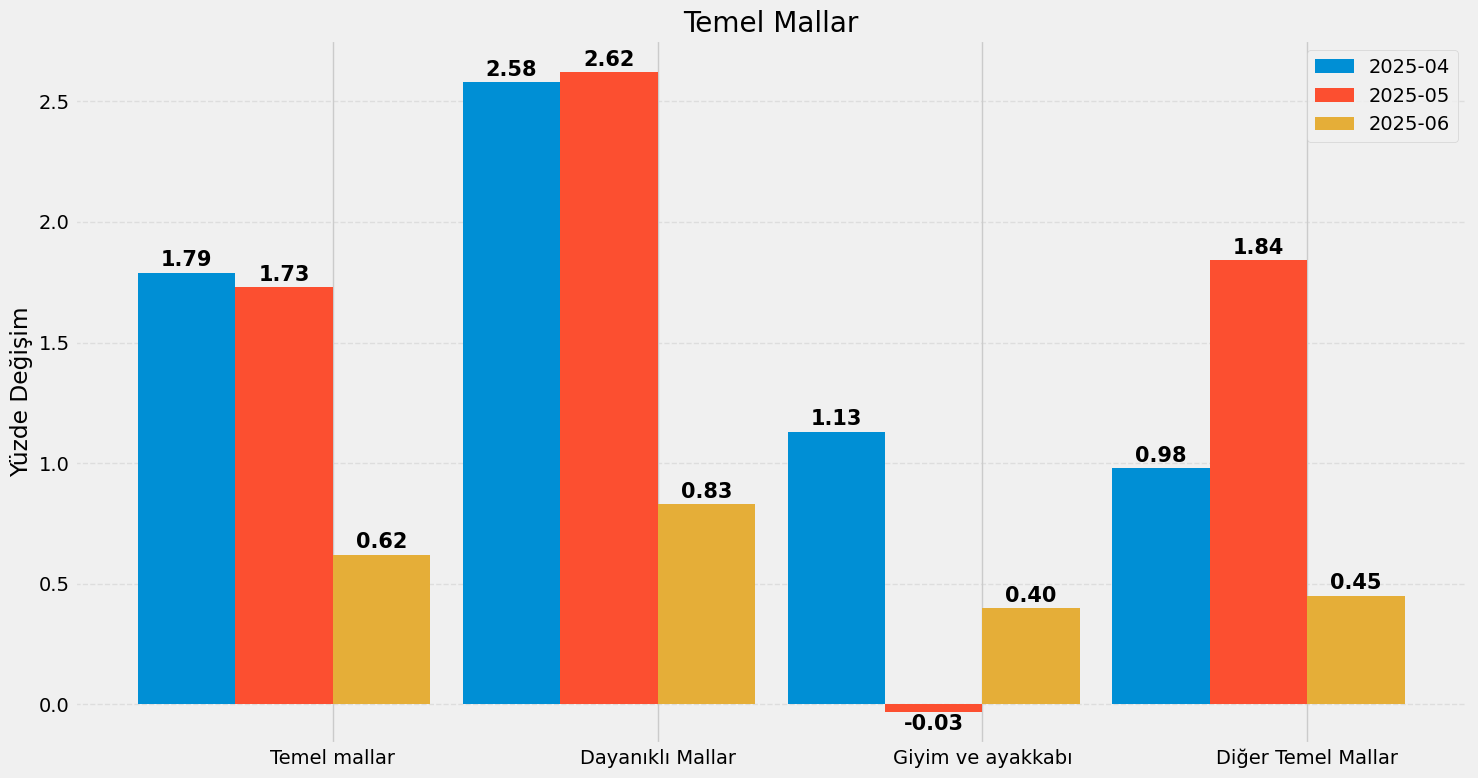

In [78]:

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")
# Gruplu bar grafiği için gerekli ayarlar
fig, ax = plt.subplots(figsize=(15, 8))

# X ekseni için aylar ve kategoriler
months = temelmallar.index
categories = temelmallar.columns
x = np.arange(len(months))
width = 0.3  # bar genişliği

# Her kategori için bar çizimi
for i, category in enumerate(categories):
    values = temelmallar[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama için konum kaydırması
    bars = ax.bar(bar_positions, values, width, label=category)

    # Barların üstüne kalın değer yazımı
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.01 if height >= 0 else height - 0.01,  # negatif değerler için ayar
            f"{height:.2f}",
            fontsize=15,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=0)
ax.set_ylabel("Yüzde Değişim")
ax.set_title("Temel Mallar")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


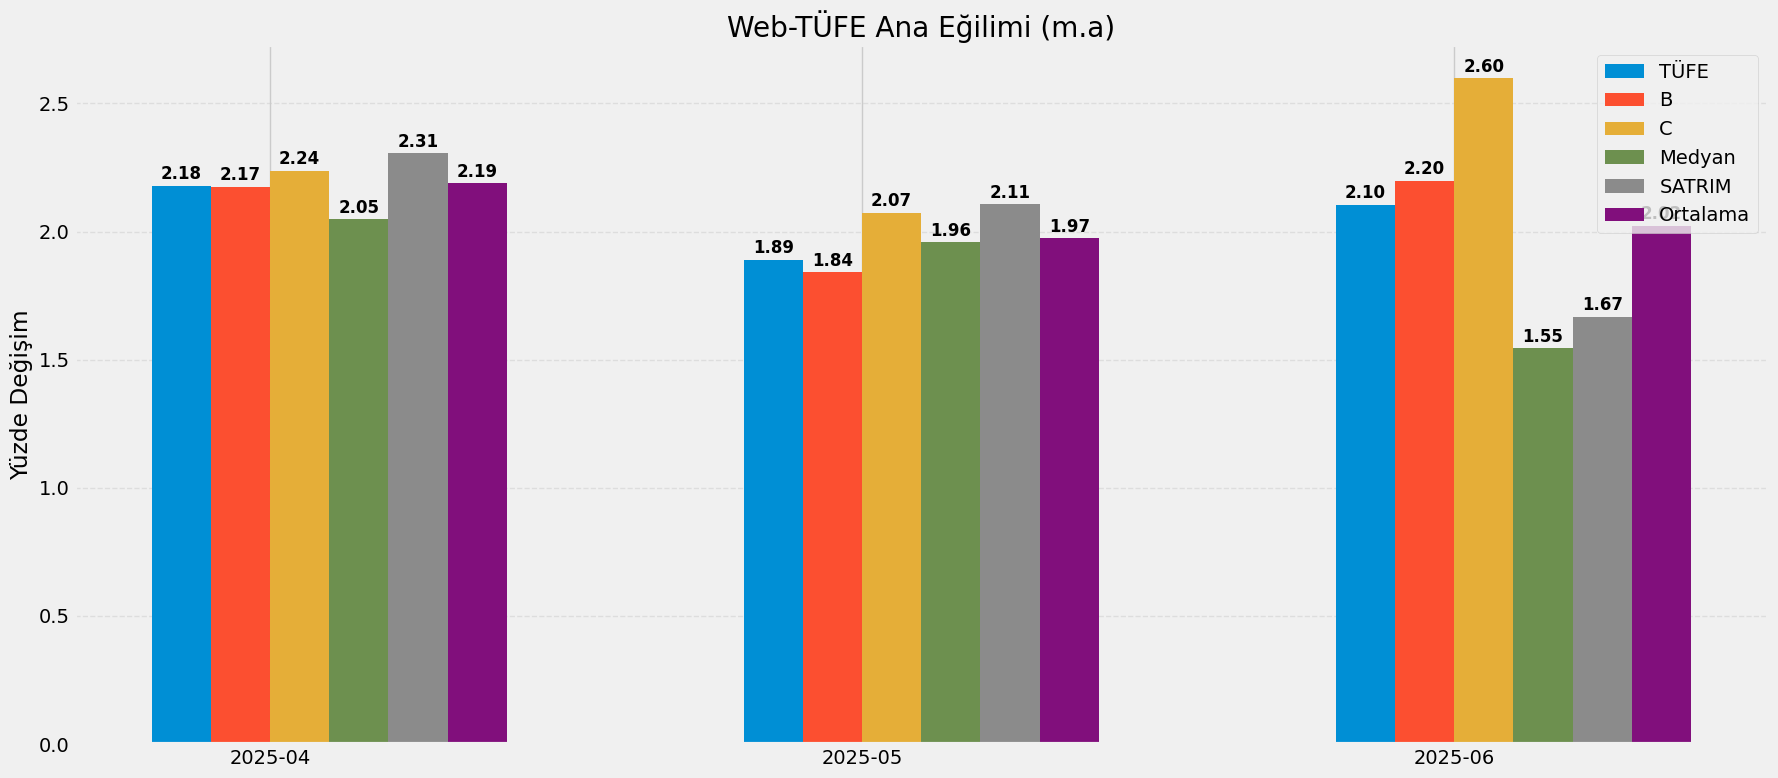

In [82]:

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")
# Gruplu bar grafiği için gerekli ayarlar
fig, ax = plt.subplots(figsize=(18, 8))
eğilim=eğilim.iloc[-3:]
# X ekseni için aylar ve kategoriler
months = eğilim.index
categories = eğilim.columns
x = np.arange(len(months))
width = 0.1  # bar genişliği

# Her kategori için bar çizimi
for i, category in enumerate(categories):
    values = eğilim[category].values
    bar_positions = x + (i - 1.5) * width  # gruplama için konum kaydırması
    bars = ax.bar(bar_positions, values, width, label=category)

    # Barların üstüne kalın değer yazımı
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 0.01 if height >= 0 else height - 0.01,  # negatif değerler için ayar
            f"{height:.2f}",
            fontsize=12,
            ha='center', 
            va='bottom' if height >= 0 else 'top',
            fontweight='bold'
        )

# Ekseni ayarlama
ax.set_xticks(x)
ax.set_xticklabels(months,rotation=0)
ax.set_ylabel("Yüzde Değişim")
ax.set_title("Web-TÜFE Ana Eğilimi (m.a)")
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
